In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        f_name = filename.split('.')[0]
        print(f"processed file at path : {os.path.join(dirname, filename)}")
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

processed file at path : /kaggle/input/store-sales-time-series-forecasting/oil.csv
processed file at path : /kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
processed file at path : /kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
processed file at path : /kaggle/input/store-sales-time-series-forecasting/stores.csv
processed file at path : /kaggle/input/store-sales-time-series-forecasting/train.csv
processed file at path : /kaggle/input/store-sales-time-series-forecasting/test.csv
processed file at path : /kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [2]:
transactions = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/transactions.csv')
test = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv')
train = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
stores = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
holiday_events = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')
oil = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')

In [3]:
oil.shape

(1218, 2)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [5]:
train.describe()

id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02

In [6]:
train.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [7]:
df = train.copy()

In [8]:
df.set_index(df['date'], inplace=True)

<Axes: xlabel='date'>

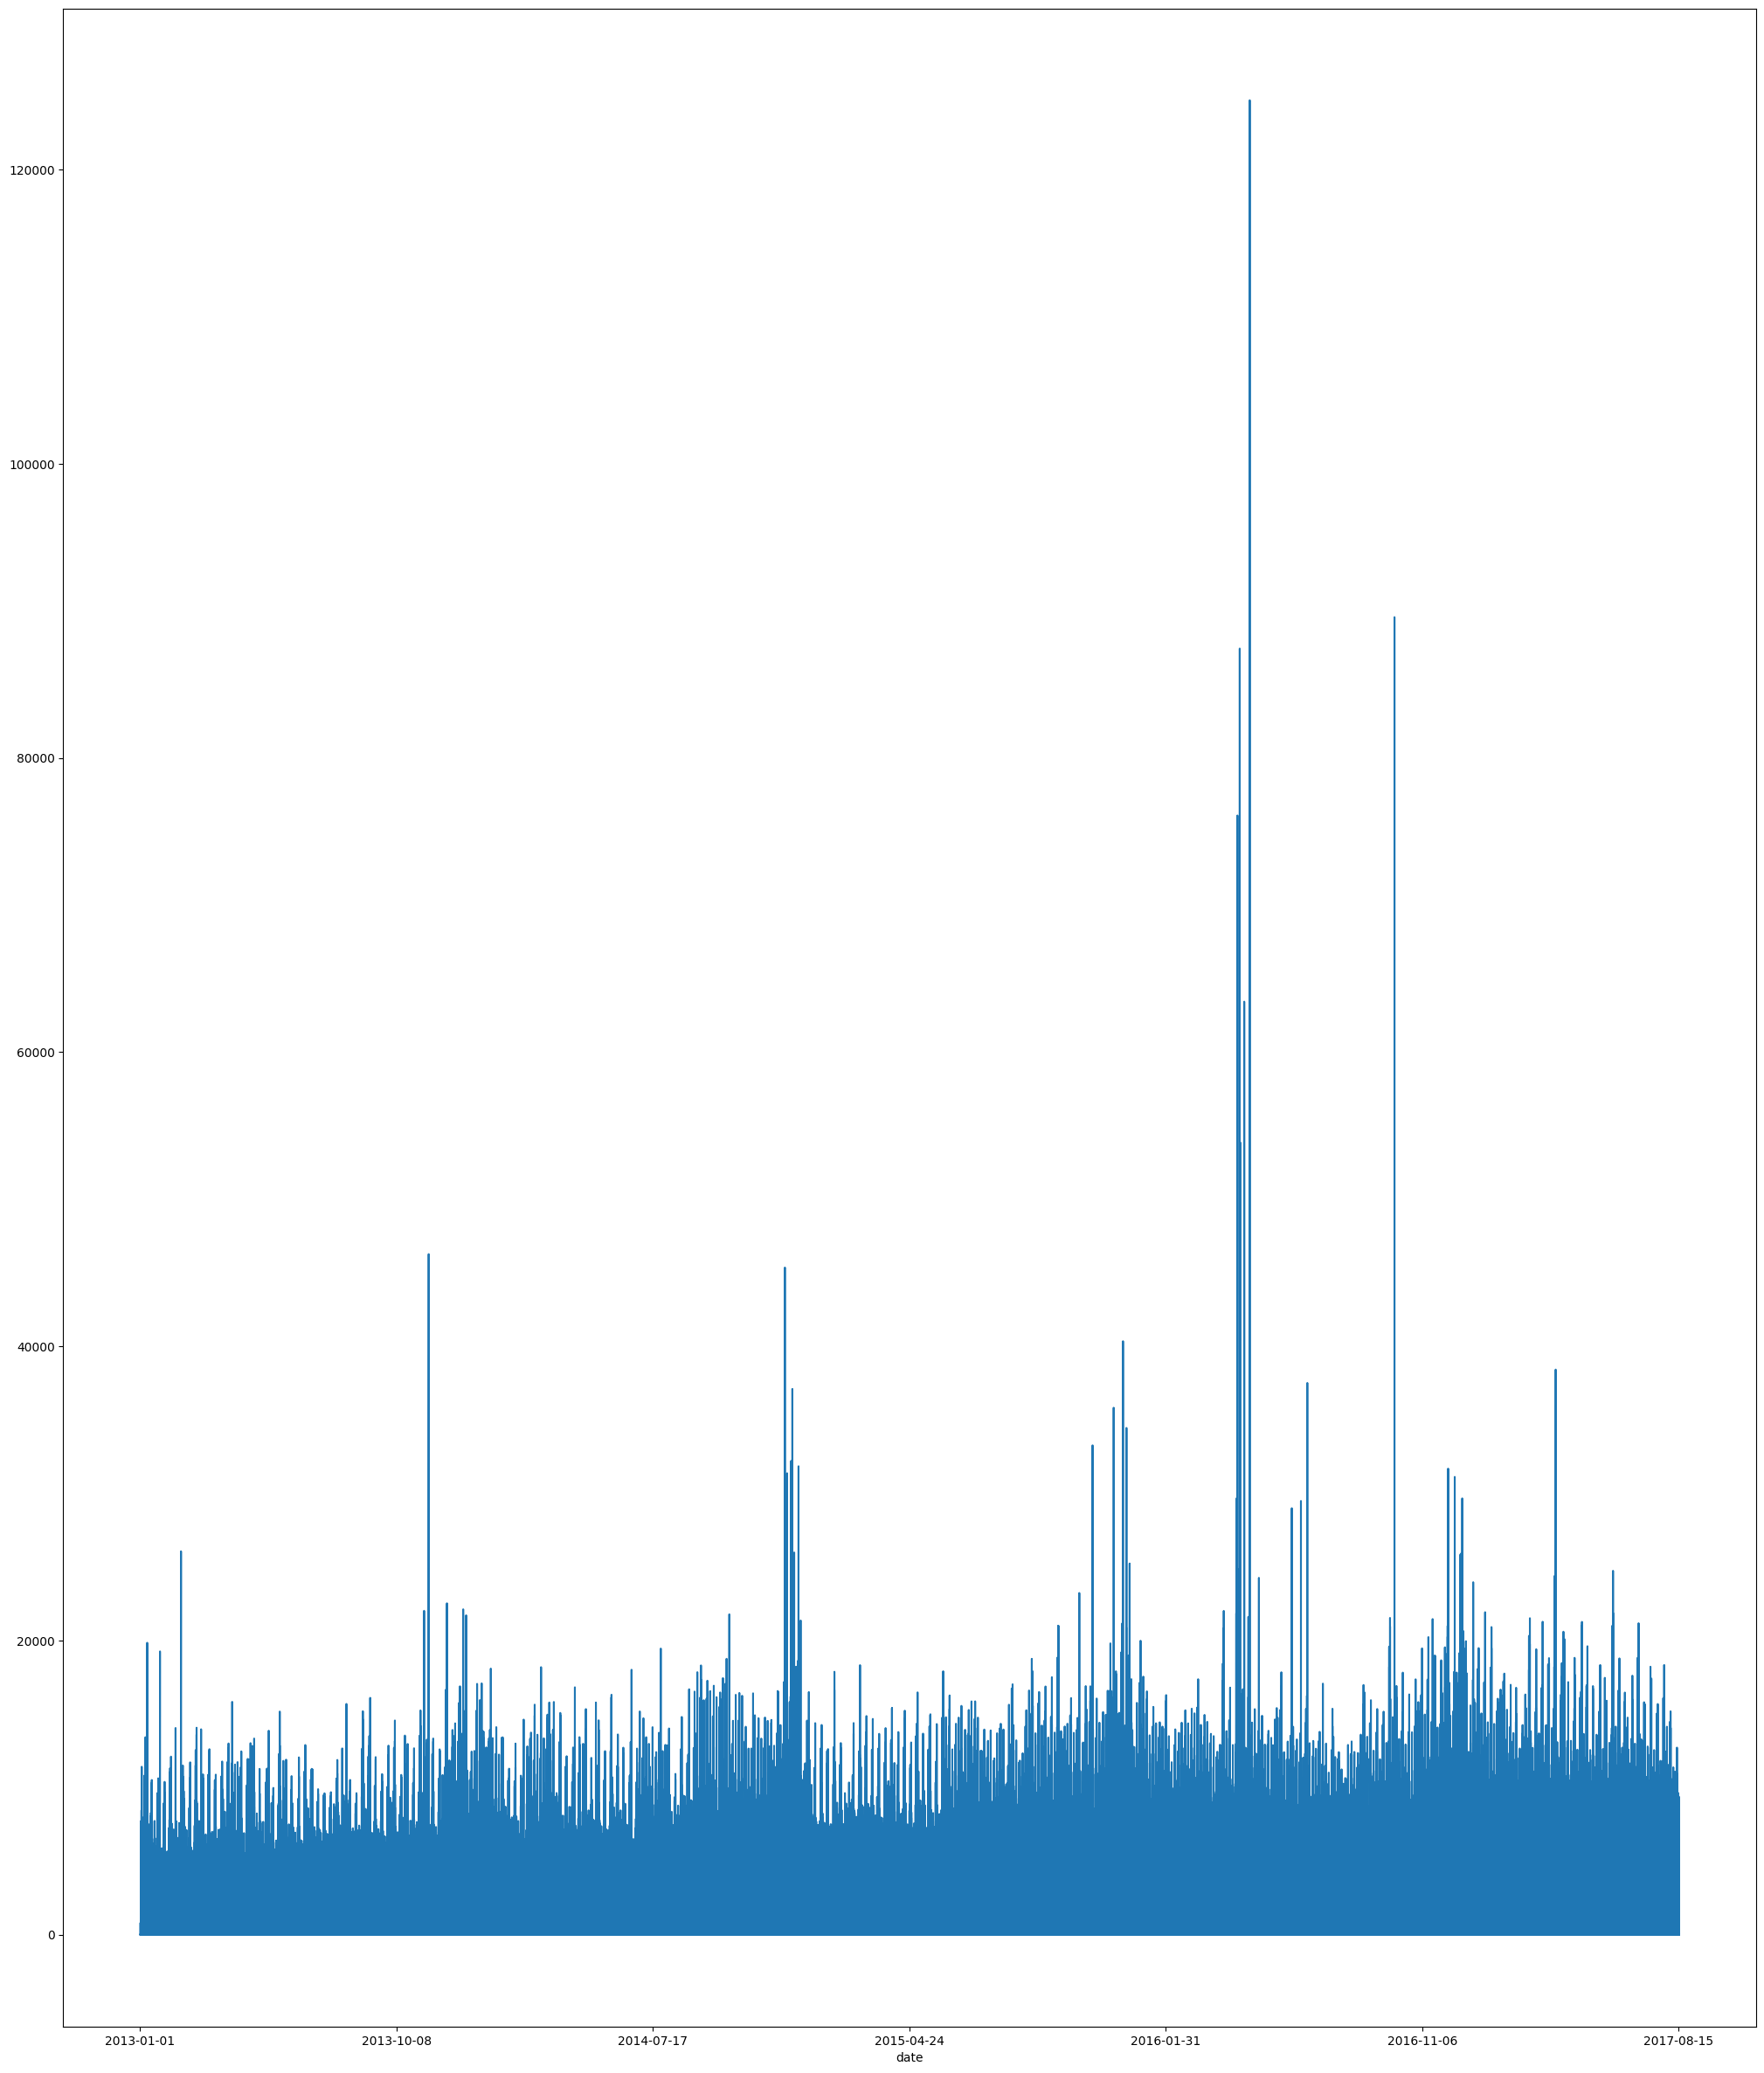

In [9]:
df['sales'].plot(figsize=(25, 30))

In [10]:
df['sales'].describe()

count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64

<Axes: >

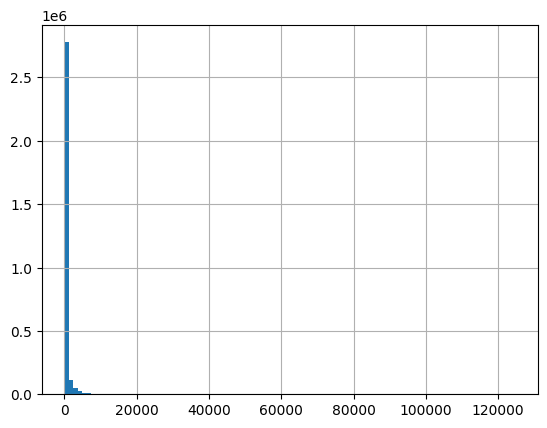

In [11]:
df['sales'].hist(bins=100)

In [12]:
df.index.min(), df.index.max()

('2013-01-01', '2017-08-15')

In [13]:
df['date'].describe()

count        3000888
unique          1684
top       2013-01-01
freq            1782
Name: date, dtype: object

In [14]:
df['date'].shape, df['date'].nunique()

((3000888,), 1684)

In [15]:
df['date'].value_counts()

df[df['date'] == '2013-01-01']['sales'].sum()

2511.6189990000003

In [16]:
# plotting the cumulative sales for each day
cum_sales = df.groupby(df.index).agg({
    'sales': 'sum'
})

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)

<Axes: xlabel='date'>

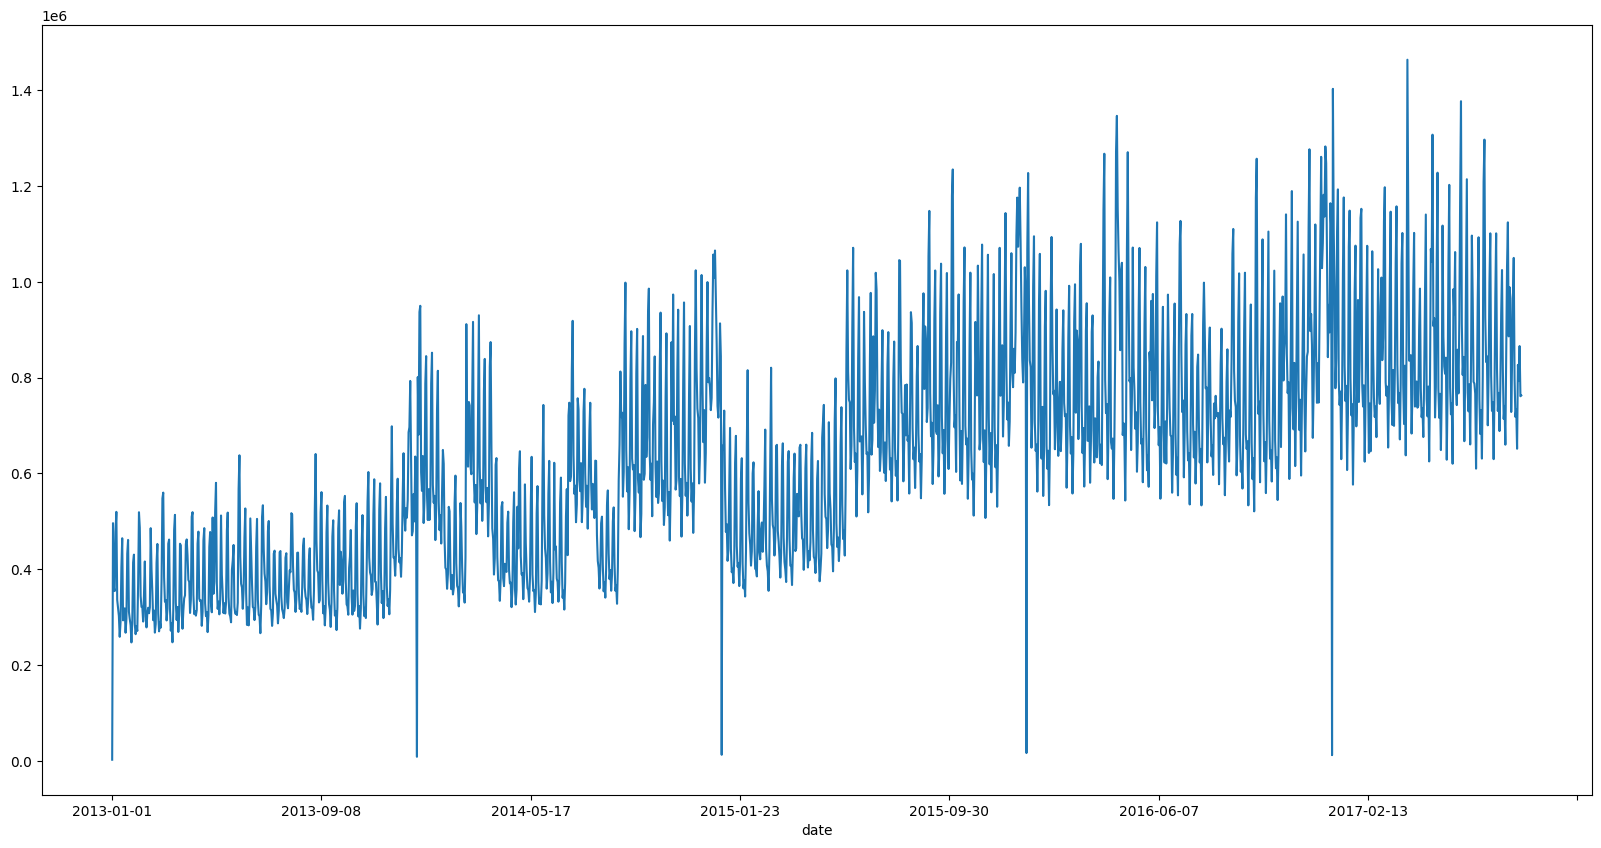

In [18]:
cum_sales['sales'].plot()

In [19]:
import plotly.express as px

In [20]:
px.line(cum_sales, x=cum_sales.index, y='sales', labels={'x':'Date', 'y':'Sales'})

In [21]:
oil.set_index(oil['date'],inplace=True)

In [22]:
oil['date'].describe()

count           1218
unique          1218
top       2013-01-01
freq               1
Name: date, dtype: object

<Axes: xlabel='date'>

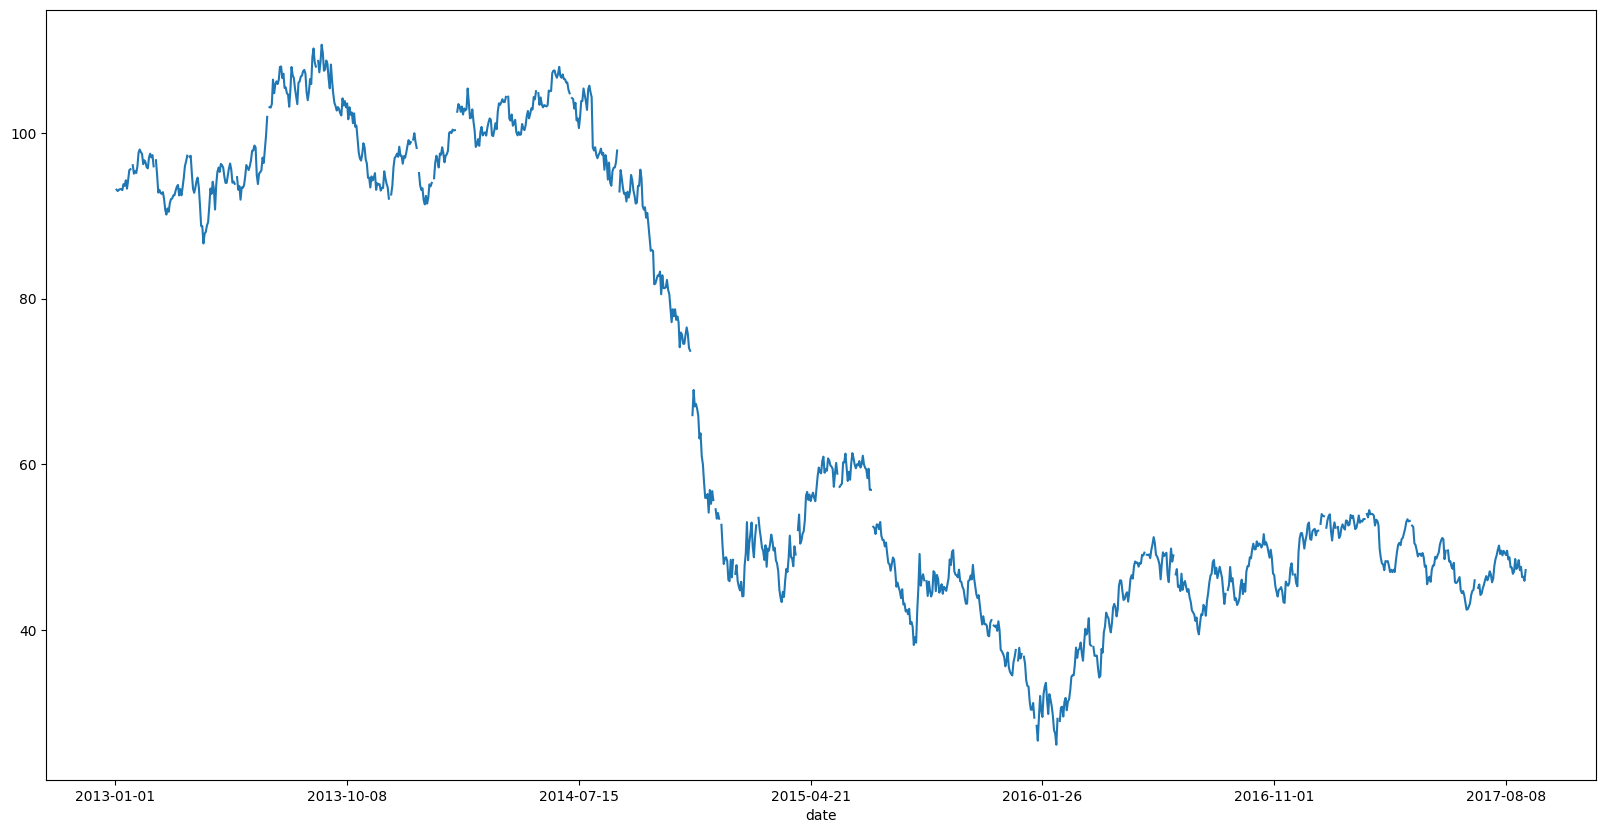

In [23]:
oil.dcoilwtico.plot()

In [24]:
px.line(oil, x=oil.index, y='dcoilwtico', labels={'x':'Date', 'y':'Oil_Price'})

In [25]:
df.describe()

id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02

In [26]:
df.family.describe()

count        3000888
unique            33
top       AUTOMOTIVE
freq           90936
Name: family, dtype: object

In [27]:
transactions.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

In [28]:
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [29]:
holiday_events.head()

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [30]:
oil.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



date  dcoilwtico
date                              
2013-01-01  2013-01-01         NaN
2013-01-02  2013-01-02       93.14
2013-01-03  2013-01-03       92.97
2013-01-04  2013-01-04       93.12
2013-01-07  2013-01-07       93.20

In [31]:
train.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [32]:
if train.shape == train.drop_duplicates().shape : print("No duplicates in train data")
else : print("Duplicates exist in train data")

No duplicates in train data


In [33]:
stores.value_counts()

store_nbr  city           state                           type  cluster
1          Quito          Pichincha                       D     13         1
41         Machala        El Oro                          D     4          1
30         Guayaquil      Guayas                          C     3          1
31         Babahoyo       Los Rios                        B     10         1
32         Guayaquil      Guayas                          C     3          1
33         Quevedo        Los Rios                        C     3          1
34         Guayaquil      Guayas                          B     6          1
35         Playas         Guayas                          C     3          1
36         Libertad       Guayas                          E     10         1
37         Cuenca         Azuay                           D     2          1
38         Loja           Loja                            D     4          1
39         Cuenca         Azuay                           B     6          1
40  

In [34]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [35]:
holiday_events.head()

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [36]:
holiday_events[holiday_events['type'] == 'Holiday'].shape

(221, 6)

In [37]:
holiday_events[holiday_events['type'] != 'Holiday'].shape

(129, 6)

In [38]:
holiday_dates = holiday_events[holiday_events['type'] == 'Holiday']['date'].unique()

In [39]:
holiday_dates.shape
holiday_dates[0]

'2012-03-02'

In [40]:
# holiday_dates.apply(lambda x: x.lower())

In [41]:
import statsmodels.api as sm

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning:

Model has no free parameters to estimate. Set optimized=False to suppress this warning



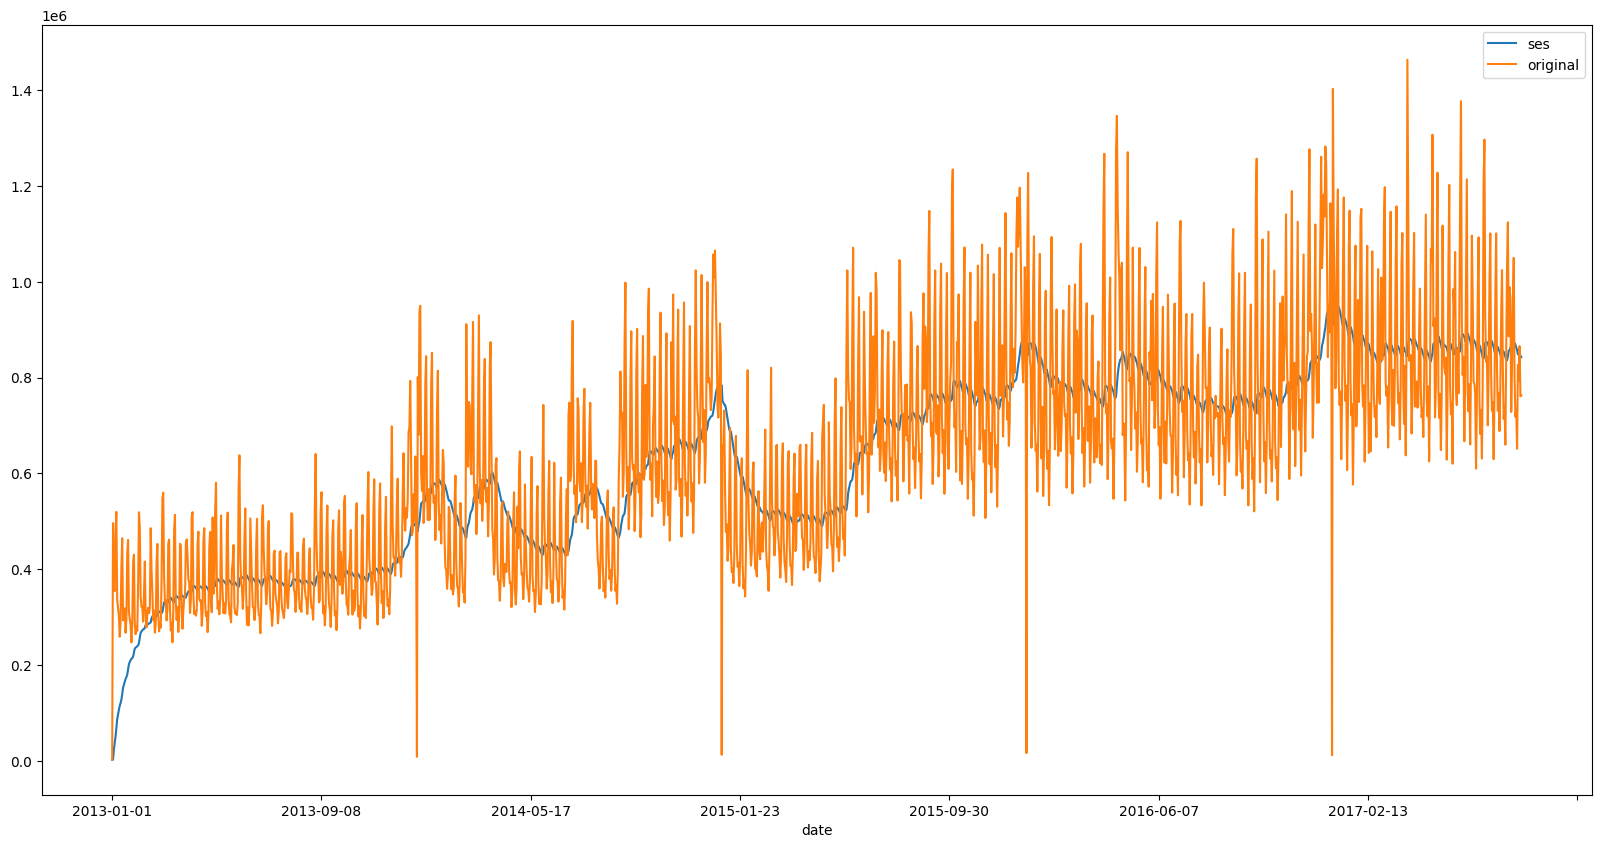

In [42]:
model = sm.tsa.SimpleExpSmoothing(cum_sales.sales).fit(smoothing_level=1/(2*12))
model.fittedvalues.plot(label='ses')
cum_sales.sales.plot(label='original')
plt.legend()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



<Axes: xlabel='date'>

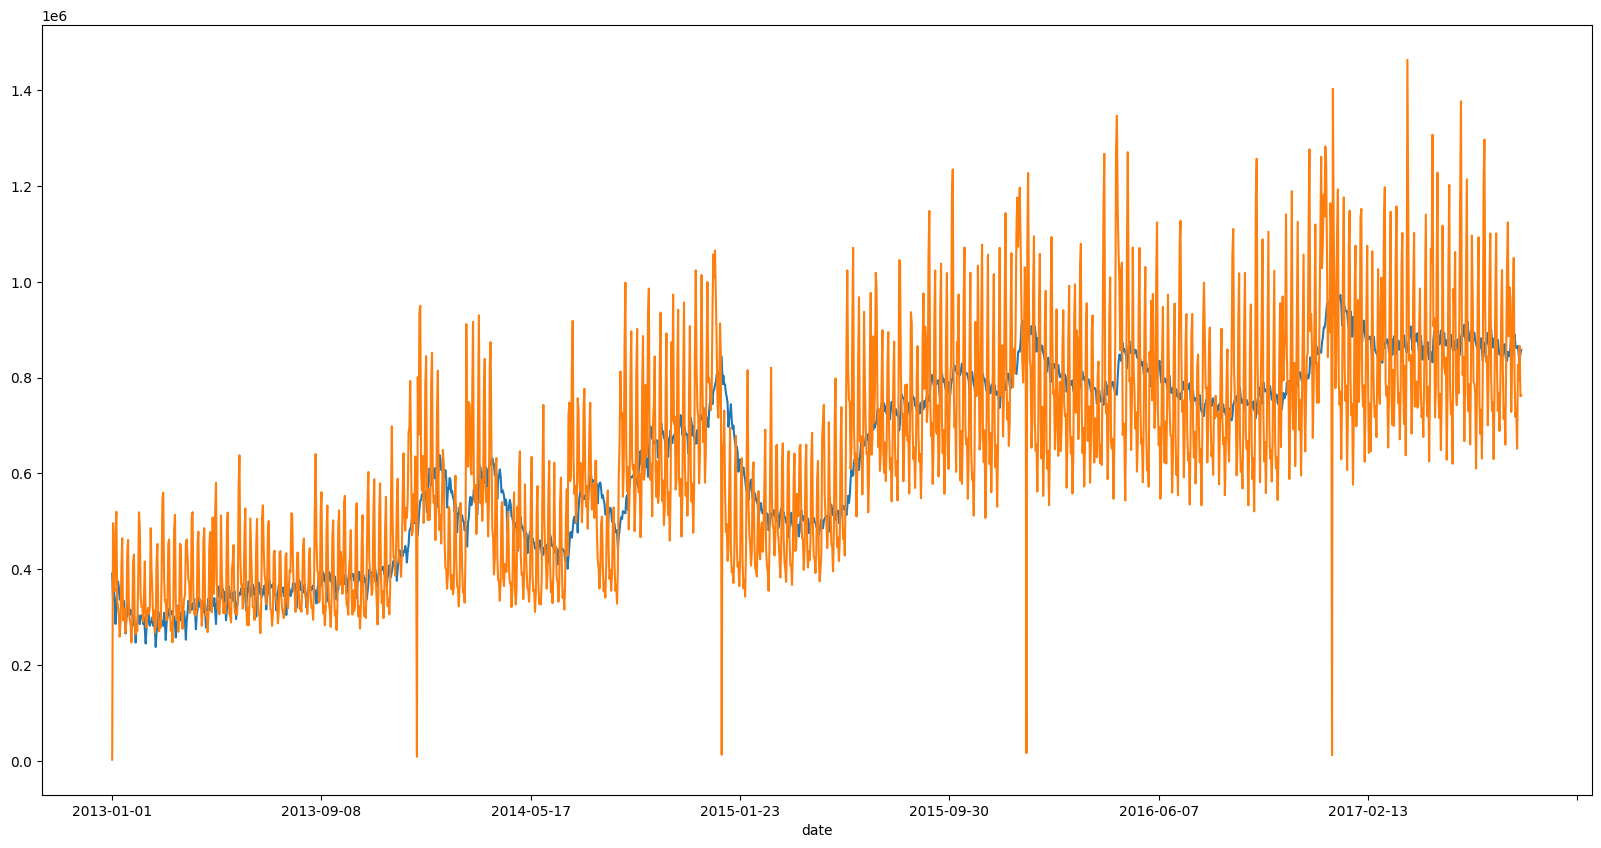

In [43]:
sm.tsa.ExponentialSmoothing(cum_sales.sales, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=1/(2*12)).fittedvalues.plot()
cum_sales.sales.plot()

<Axes: xlabel='date'>

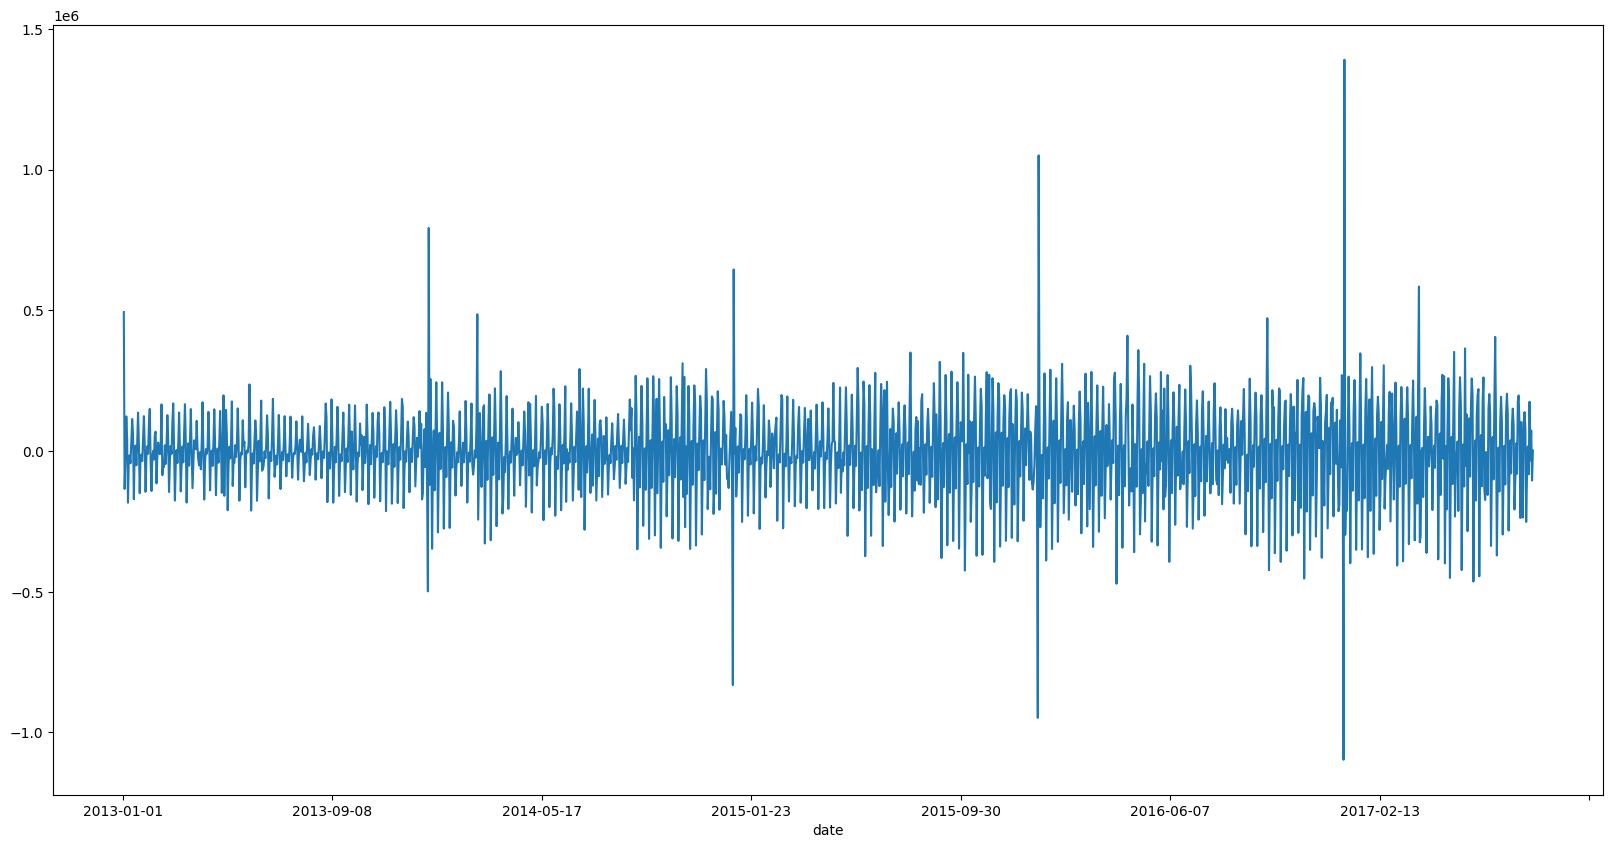

In [44]:
cum_sales.sales.diff().plot()

In [45]:
valid_holidays = [date for date in holiday_dates if date in cum_sales.index]

In [46]:
cum_sales.shape
holiday_dates.shape

(202,)

In [47]:
# plt.scatter(holiday_dates)

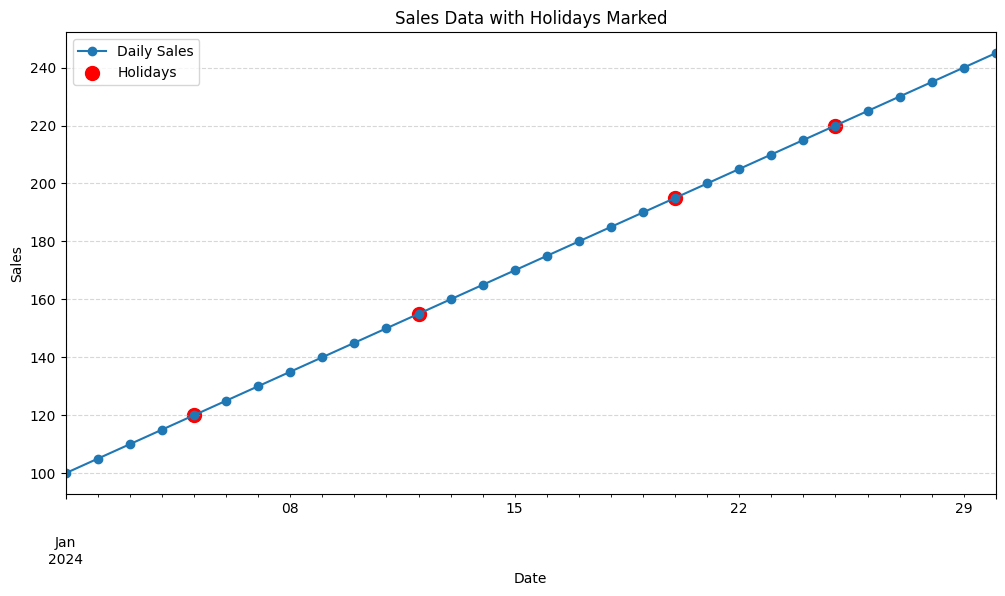

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample sales DataFrame with date index
dates = pd.date_range(start="2024-01-01", periods=30, freq="D")
sales = pd.DataFrame({"sales": [100 + i * 5 for i in range(30)]}, index=dates)

# Holiday dates (already in datetime format)
holiday_dates = pd.to_datetime(["2024-01-05", "2024-01-12", "2024-01-20", "2024-01-25"])

# Filter only the holiday dates that exist in sales index
valid_holidays = [date for date in holiday_dates if date in sales.index]

# Plot the sales data
sales.sales.plot(marker='o', linestyle='-', figsize=(12, 6), label="Daily Sales")

# Scatter plot for holidays
plt.scatter(
    valid_holidays, 
    sales.loc[valid_holidays, 'sales'],  # Use only valid dates
    color='red', 
    s=100, 
    label="Holidays"
)

# Labels and Grid
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Data with Holidays Marked")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


<Axes: xlabel='date'>

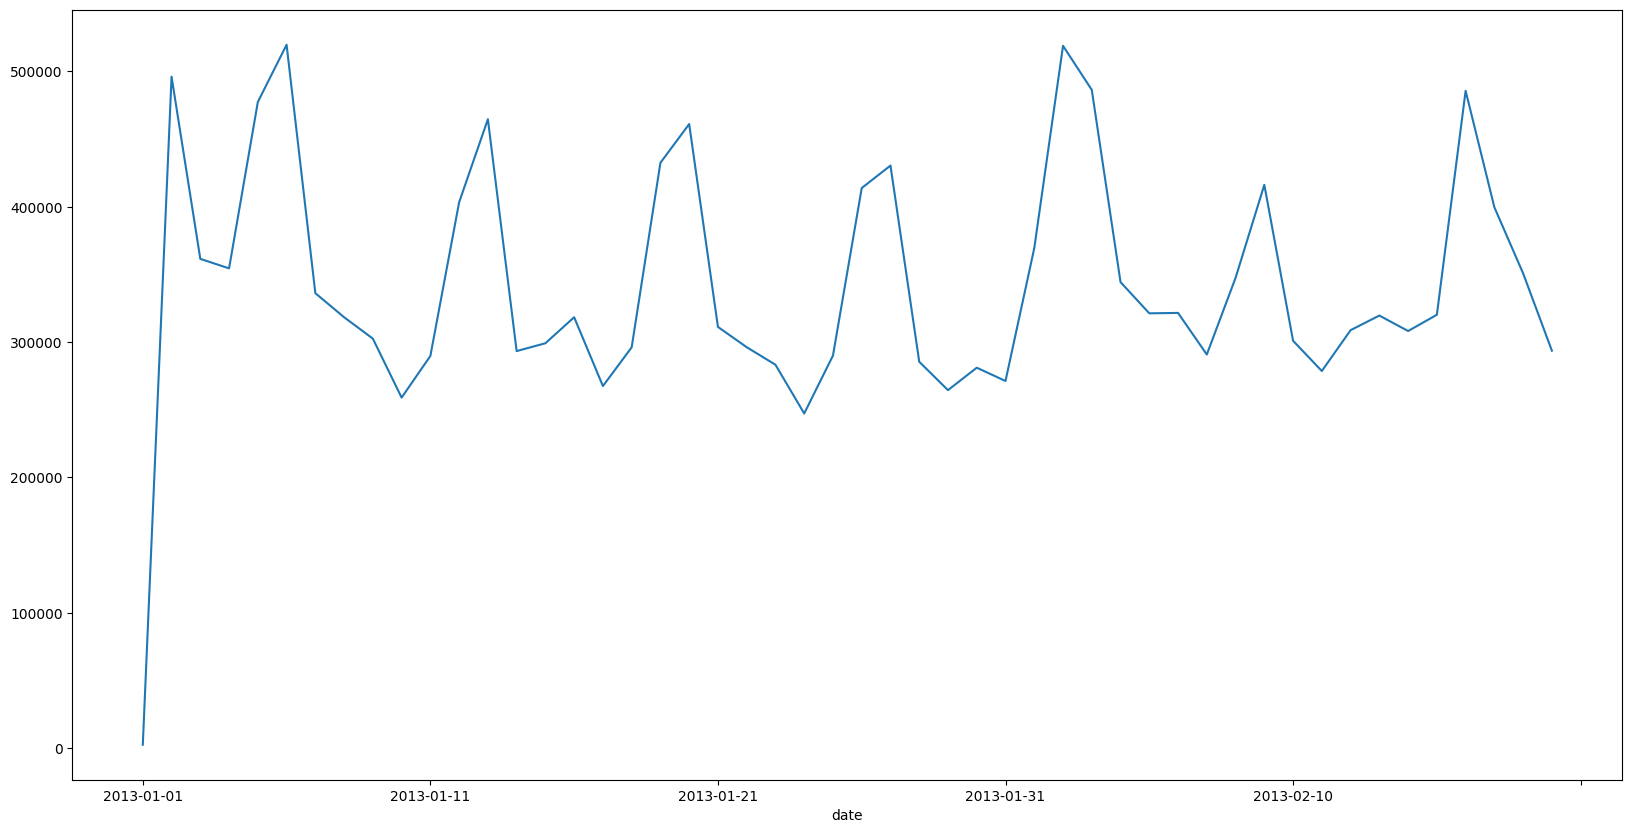

In [49]:
cum_sales.sales[:50].plot()

In [50]:
# finding seasonality and cyclicity in cumulative sales
fig = px.line(cum_sales[50:100], x=cum_sales[50:100].index, y='sales', labels={'x':'Date', 'y':'Sales'})
fig.update_xaxes(
    tickformat='%Y-%b-%d (%A)',  # Format: "2024-Feb-10 (Saturday)"
    title_text="Date (Year-Month-Day)"
)

fig.show()

#### It kind of seems like that peak shopping is being done one weekends

In [51]:
px.line(cum_sales, x=cum_sales.index, y='sales', labels={'x':'Date', 'y':'Sales'})


In [52]:
cum_sales.index = pd.to_datetime(cum_sales.index)
cum_sales.index.month

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
      dtype='int32', name='date', length=1684)

In [53]:
cum_sales_2013 = cum_sales[cum_sales.index.year == 2013]

In [54]:
fig = px.line(cum_sales_2013[-50:], x=cum_sales_2013[-50:].index, y='sales', labels={'x':'Date', 'y':'Sales'})
fig.update_xaxes(
    tickformat='%Y-%b-%d (%A)',  # Format: "2024-Feb-10 (Saturday)"
    title_text="Date (Year-Month-Day)"
)

fig.show()

In [55]:
years = cum_sales.index.year.unique()
years

Index([2013, 2014, 2015, 2016, 2017], dtype='int32', name='date')

In [56]:
cum_sales_2013.index.weekday

Index([1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       ...
       5, 6, 0, 1, 3, 4, 5, 6, 0, 1],
      dtype='int32', name='date', length=364)

<Axes: xlabel='date'>

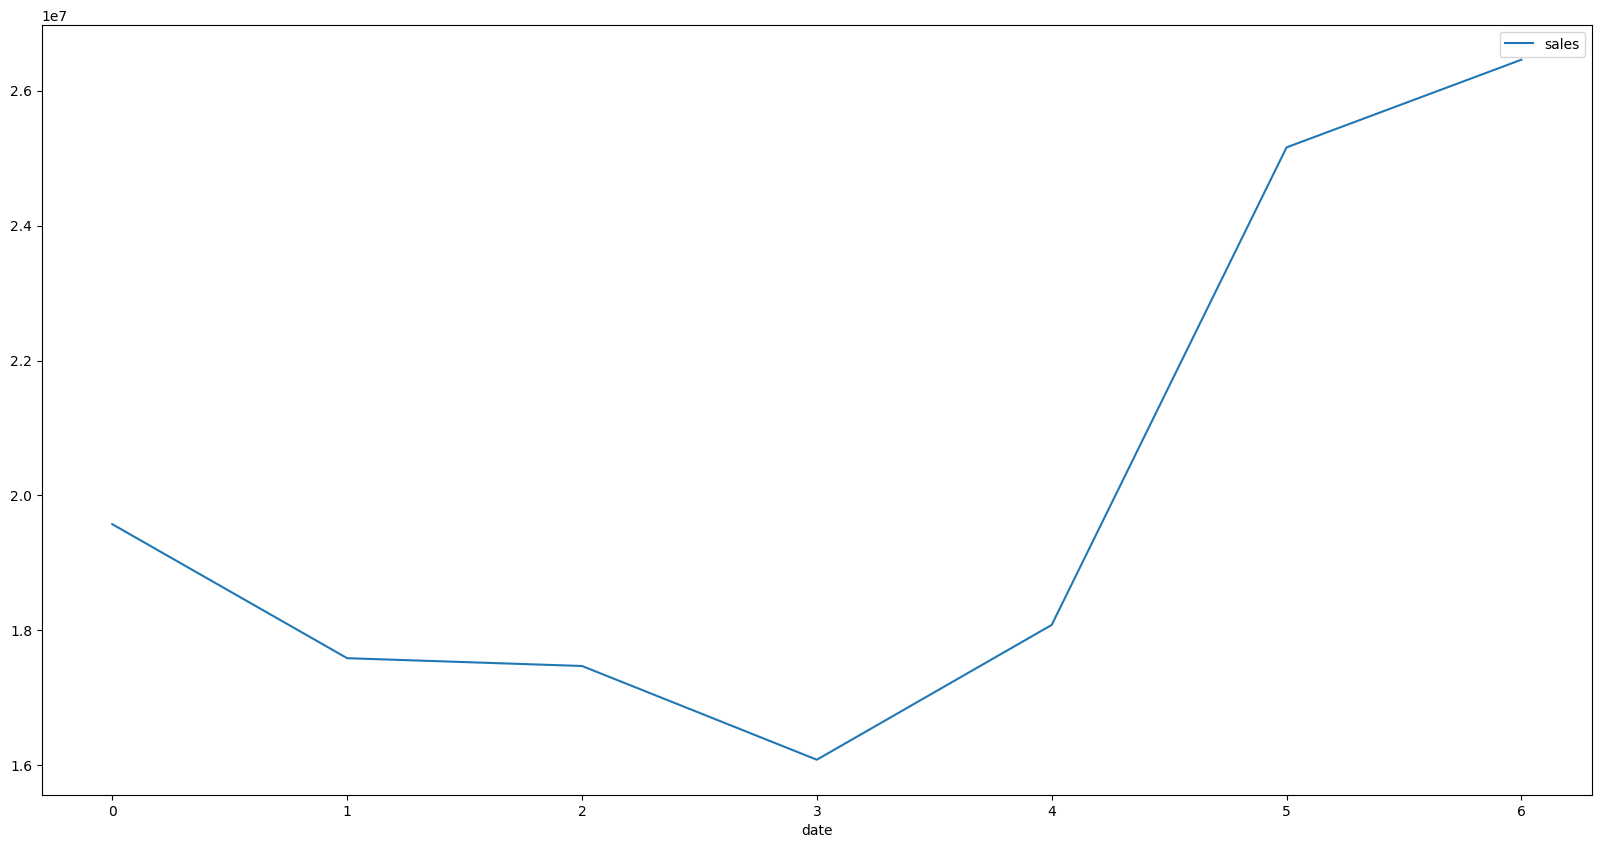

In [57]:
# plotting the cumulative sales for each day
cum_sales_2013.groupby(cum_sales_2013.index.weekday).agg({
    'sales': 'sum'
}).plot()

In [58]:
cum_sales_2014 = cum_sales[cum_sales.index.year == 2014]
cum_sales_2015 = cum_sales[cum_sales.index.year == 2015]
cum_sales_2016 = cum_sales[cum_sales.index.year == 2016]
cum_sales_2017 = cum_sales[cum_sales.index.year == 2017]

<Axes: xlabel='date'>

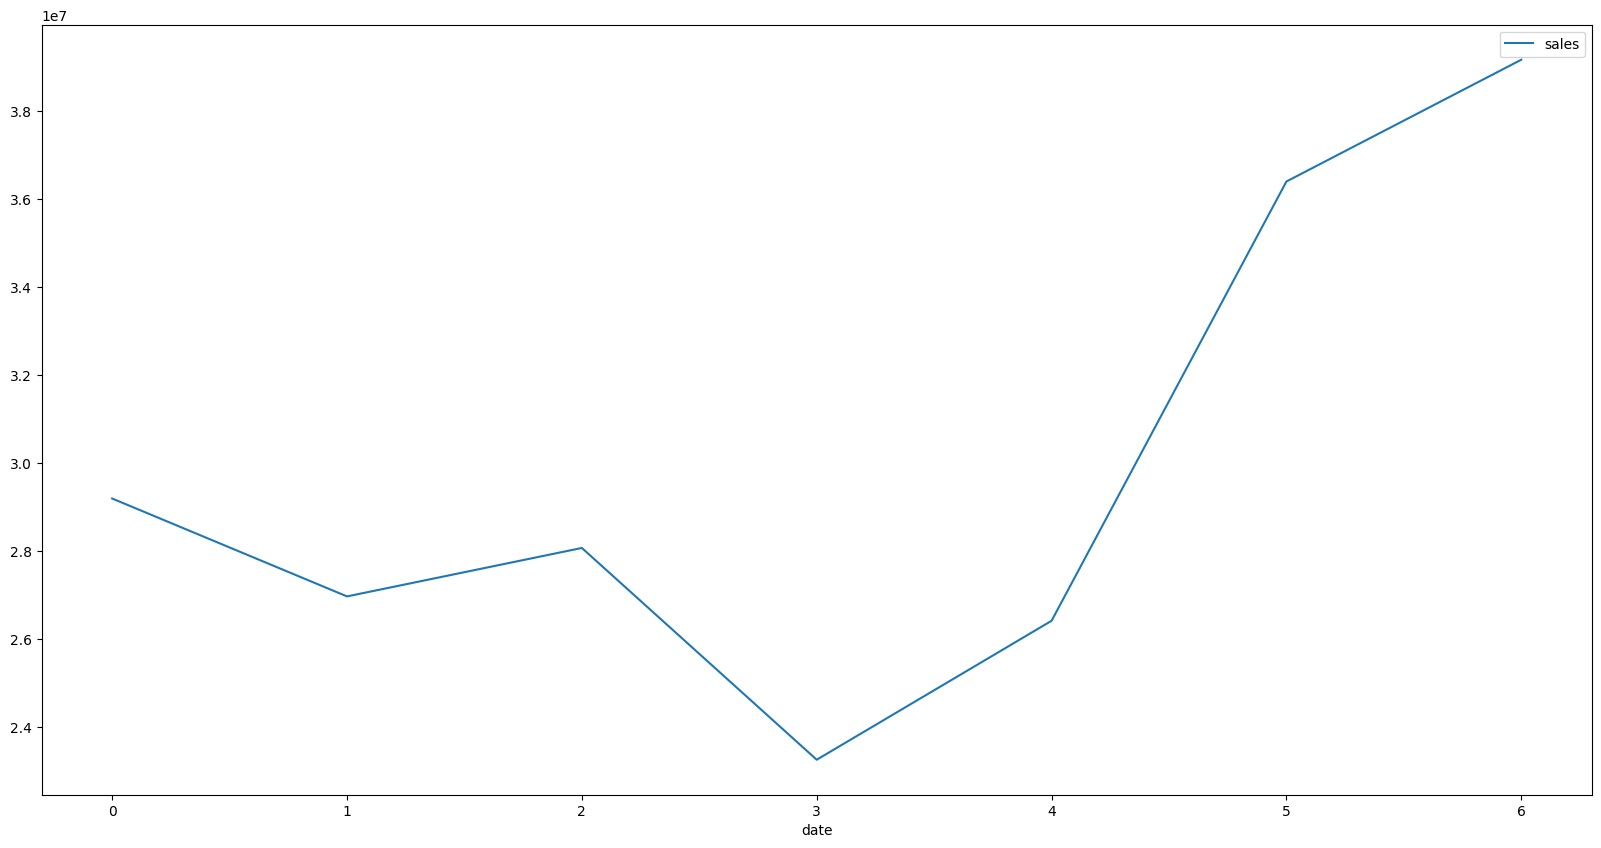

In [59]:
cum_sales_2014.groupby(cum_sales_2014.index.weekday).agg({
    'sales': 'sum'
}).plot()

<Axes: xlabel='date'>

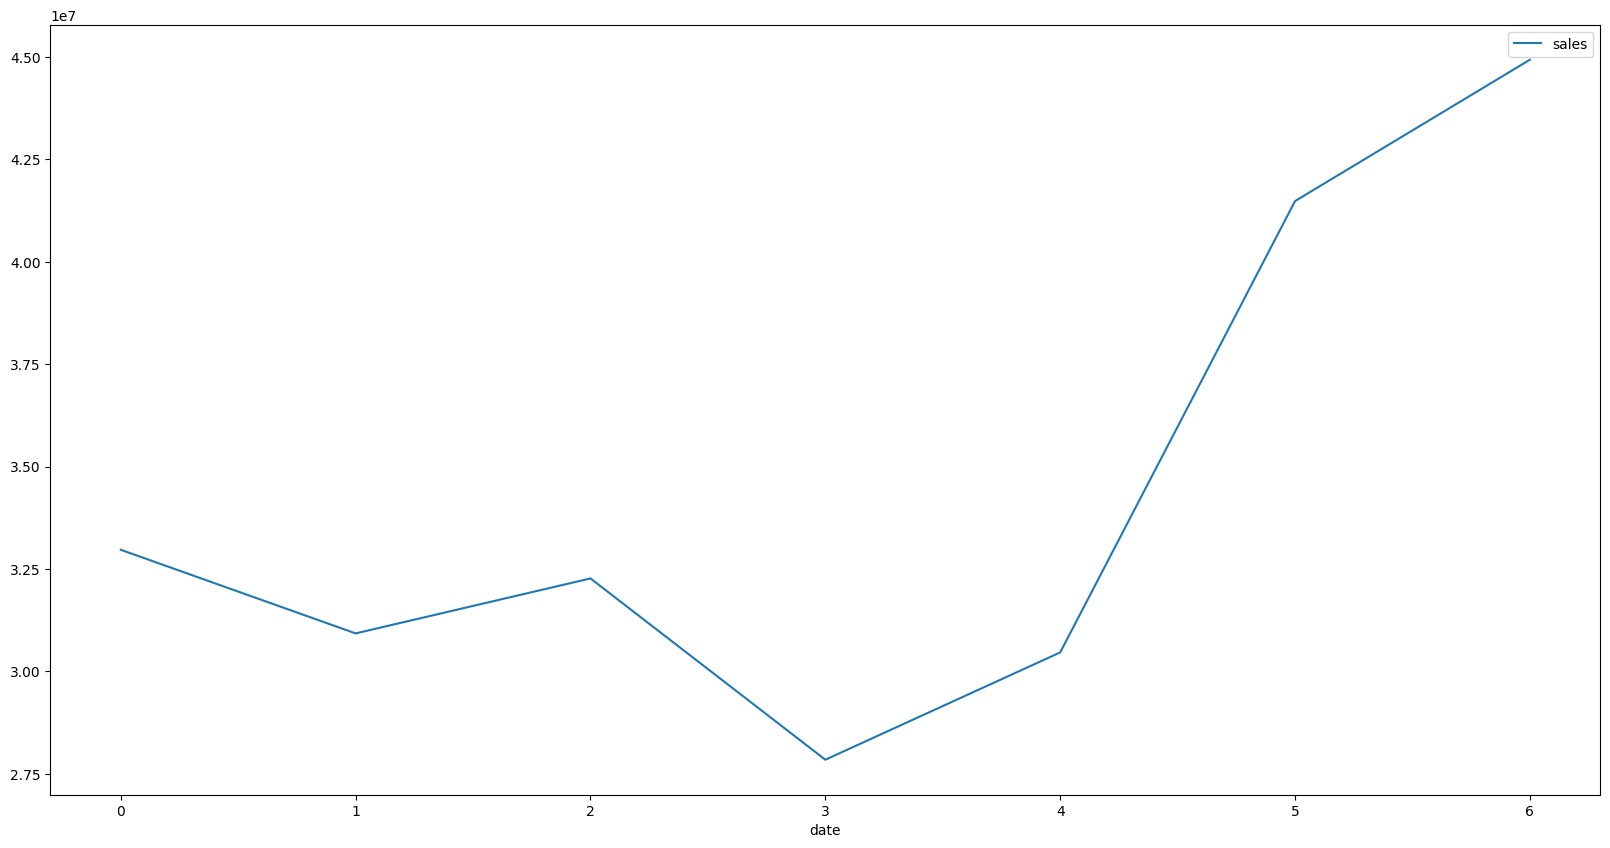

In [60]:
cum_sales_2015.groupby(cum_sales_2015.index.weekday).agg({
    'sales': 'sum'
}).plot()

<Axes: xlabel='date'>

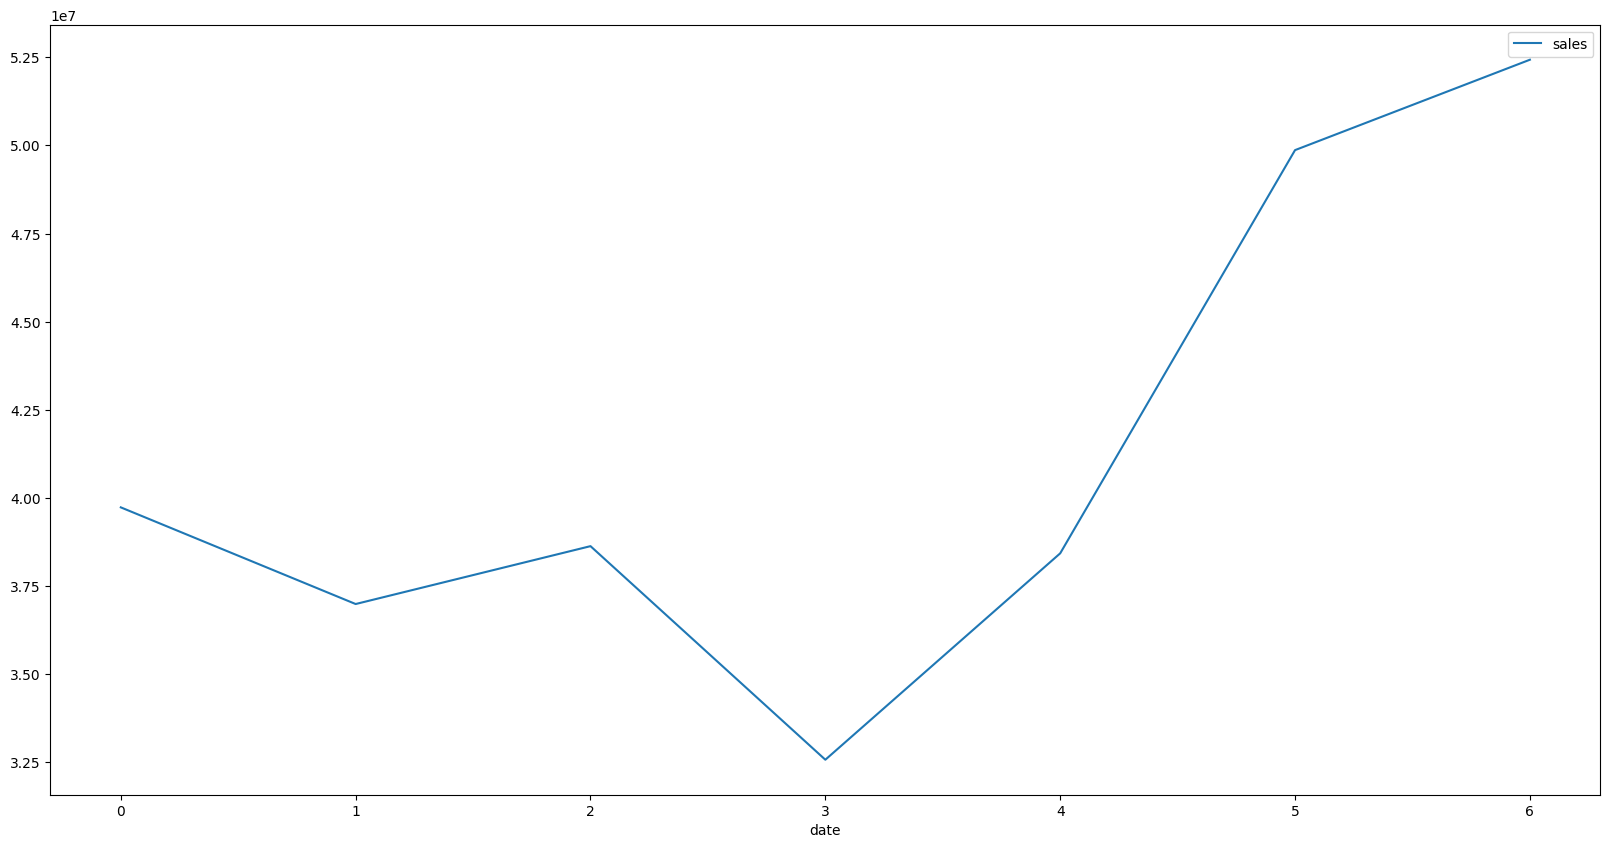

In [61]:
cum_sales_2016.groupby(cum_sales_2016.index.weekday).agg({
    'sales': 'sum'
}).plot()

<Axes: xlabel='date'>

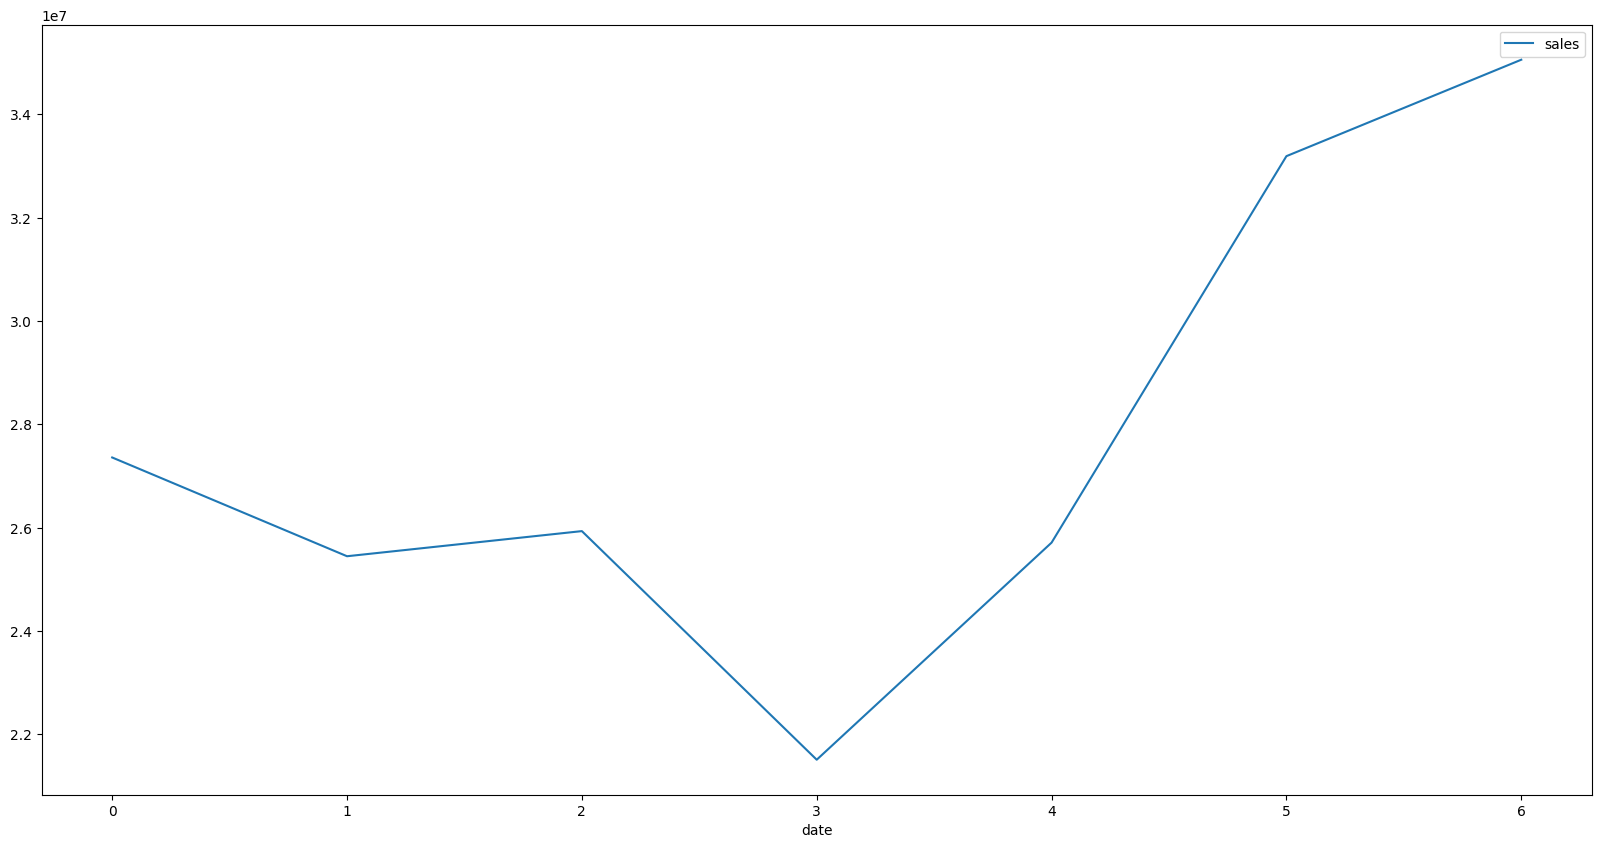

In [62]:
cum_sales_2017.groupby(cum_sales_2017.index.weekday).agg({
    'sales': 'sum'
}).plot()

In [63]:
fig = px.line(cum_sales_2016[100:500], x=cum_sales_2016[100:400].index, y='sales', labels={'x':'Date', 'y':'Sales'})
fig.update_xaxes(
    tickformat='%Y-%b-%d (%A)',  # Format: "2024-Feb-10 (Saturday)"
    title_text="Date (Year-Month-Day)"
)

fig.show()

In [64]:
fig = px.line(cum_sales_2015, x=cum_sales_2015.index, y='sales', labels={'x':'Date', 'y':'Sales'})
fig.update_xaxes(
    tickformat='%Y-%b-%d (%A)',  # Format: "2024-Feb-10 (Saturday)"
    title_text="Date (Year-Month-Day)"
)

fig.show()

In [65]:
train.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [66]:
train['store_nbr'].nunique()

54

In [67]:
holiday_events

date        type    locale locale_name  \
0    2012-03-02     Holiday     Local       Manta   
1    2012-04-01     Holiday  Regional    Cotopaxi   
2    2012-04-12     Holiday     Local      Cuenca   
3    2012-04-14     Holiday     Local    Libertad   
4    2012-04-21     Holiday     Local    Riobamba   
..          ...         ...       ...         ...   
345  2017-12-22  Additional  National     Ecuador   
346  2017-12-23  Additional  National     Ecuador   
347  2017-12-24  Additional  National     Ecuador   
348  2017-12-25     Holiday  National     Ecuador   
349  2017-12-26  Additional  National     Ecuador   

                       description  transferred  
0               Fundacion de Manta        False  
1    Provincializacion de Cotopaxi        False  
2              Fundacion de Cuenca        False  
3        Cantonizacion de Libertad        False  
4        Cantonizacion de Riobamba        False  
..                             ...          ...  
345                      Navidad-3        False  
346                      Navidad-2        False  
347                      Navidad-1        False  
348                        Navidad        False  
349                      Navidad+1        False  

[350 rows x 6 columns]

Plotting cumulative country sales on 15, 30, 31 

count    1.380000e+02
mean     6.503358e+05
std      2.319734e+05
min      2.712542e+05
25%      4.529068e+05
50%      6.555647e+05
75%      7.891683e+05
max      1.175725e+06
Name: sales, dtype: float64


<Axes: xlabel='date'>

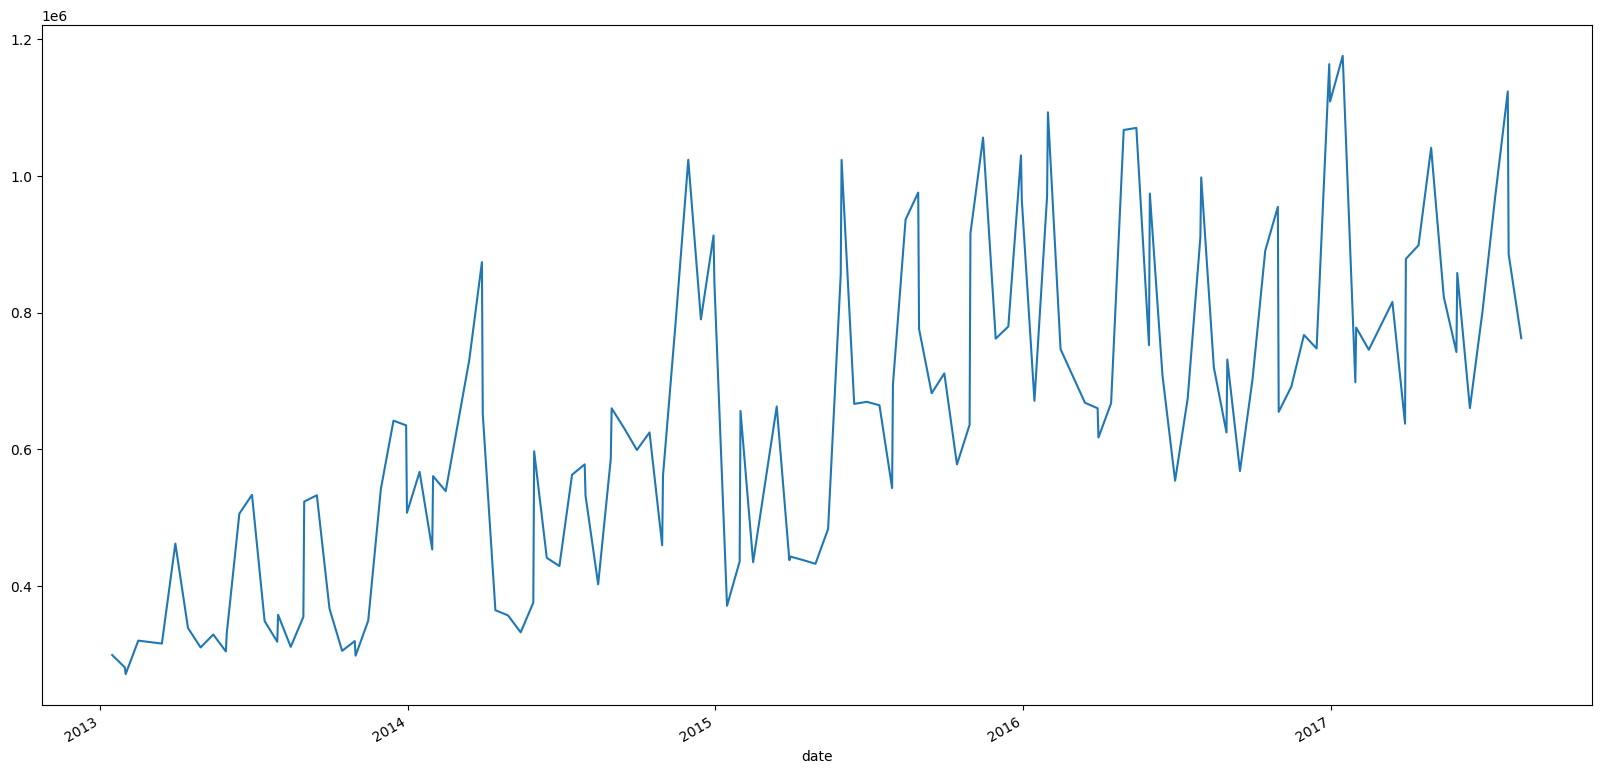

In [68]:
print(cum_sales[(cum_sales.index.day == 15 ) | (cum_sales.index.day == 30 ) | (cum_sales.index.day == 31)].sales.describe())
cum_sales[(cum_sales.index.day == 15 ) | (cum_sales.index.day == 30 ) | (cum_sales.index.day == 31)].sales.plot()

In [69]:
stores.describe()

store_nbr    cluster
count  54.000000  54.000000
mean   27.500000   8.481481
std    15.732133   4.693395
min     1.000000   1.000000
25%    14.250000   4.000000
50%    27.500000   8.500000
75%    40.750000  13.000000
max    54.000000  17.000000

In [70]:
print(stores['city'].describe())
stores['type'].describe()

count        54
unique       22
top       Quito
freq         18
Name: city, dtype: object


count     54
unique     5
top        D
freq      18
Name: type, dtype: object

In [71]:
stores['state'].describe()

count            54
unique           16
top       Pichincha
freq             19
Name: state, dtype: object

In [72]:
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [73]:
stores['type'].max()

'E'

<Axes: >

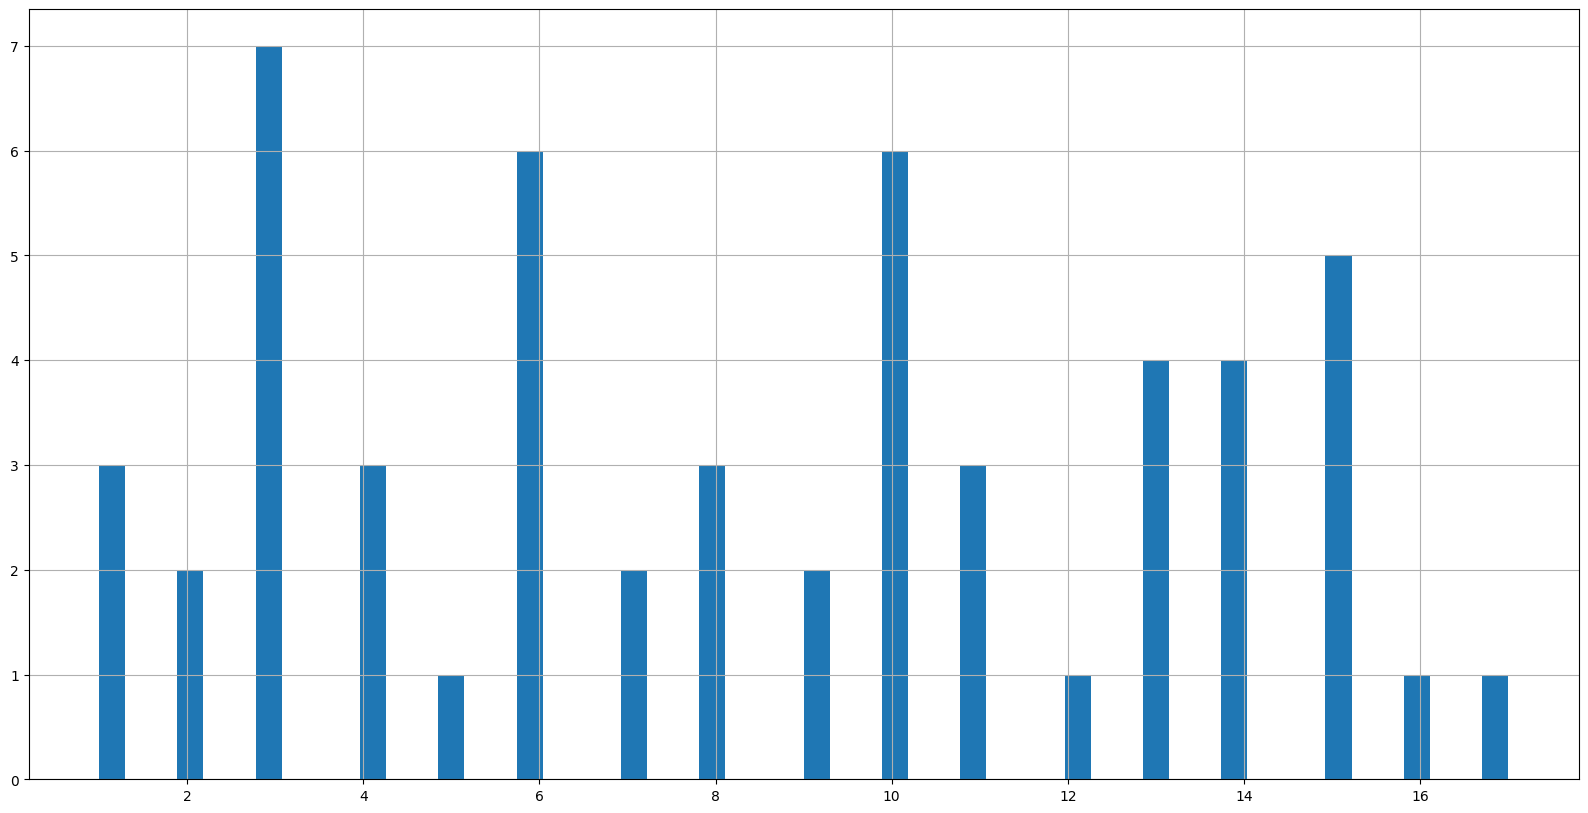

In [74]:
stores['cluster'].hist(bins=54)

In [75]:
stores['cluster'].unique()

array([13,  8,  9,  4,  6, 15,  7,  3, 12, 16,  1, 10,  2,  5, 11, 14, 17])

In [76]:
stores['cluster'].value_counts().sort_values()

cluster
17    1
5     1
12    1
16    1
2     2
7     2
9     2
1     3
8     3
11    3
4     3
14    4
13    4
15    5
10    6
6     6
3     7
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Pichincha'),
  Text(1, 0, 'Santo Domingo de los Tsachilas'),
  Text(2, 0, 'Cotopaxi'),
  Text(3, 0, 'Chimborazo'),
  Text(4, 0, 'Imbabura'),
  Text(5, 0, 'Bolivar'),
  Text(6, 0, 'Pastaza'),
  Text(7, 0, 'Tungurahua'),
  Text(8, 0, 'Guayas'),
  Text(9, 0, 'Santa Elena'),
  Text(10, 0, 'Los Rios'),
  Text(11, 0, 'Azuay'),
  Text(12, 0, 'Loja'),
  Text(13, 0, 'El Oro'),
  Text(14, 0, 'Esmeraldas'),
  Text(15, 0, 'Manabi')])

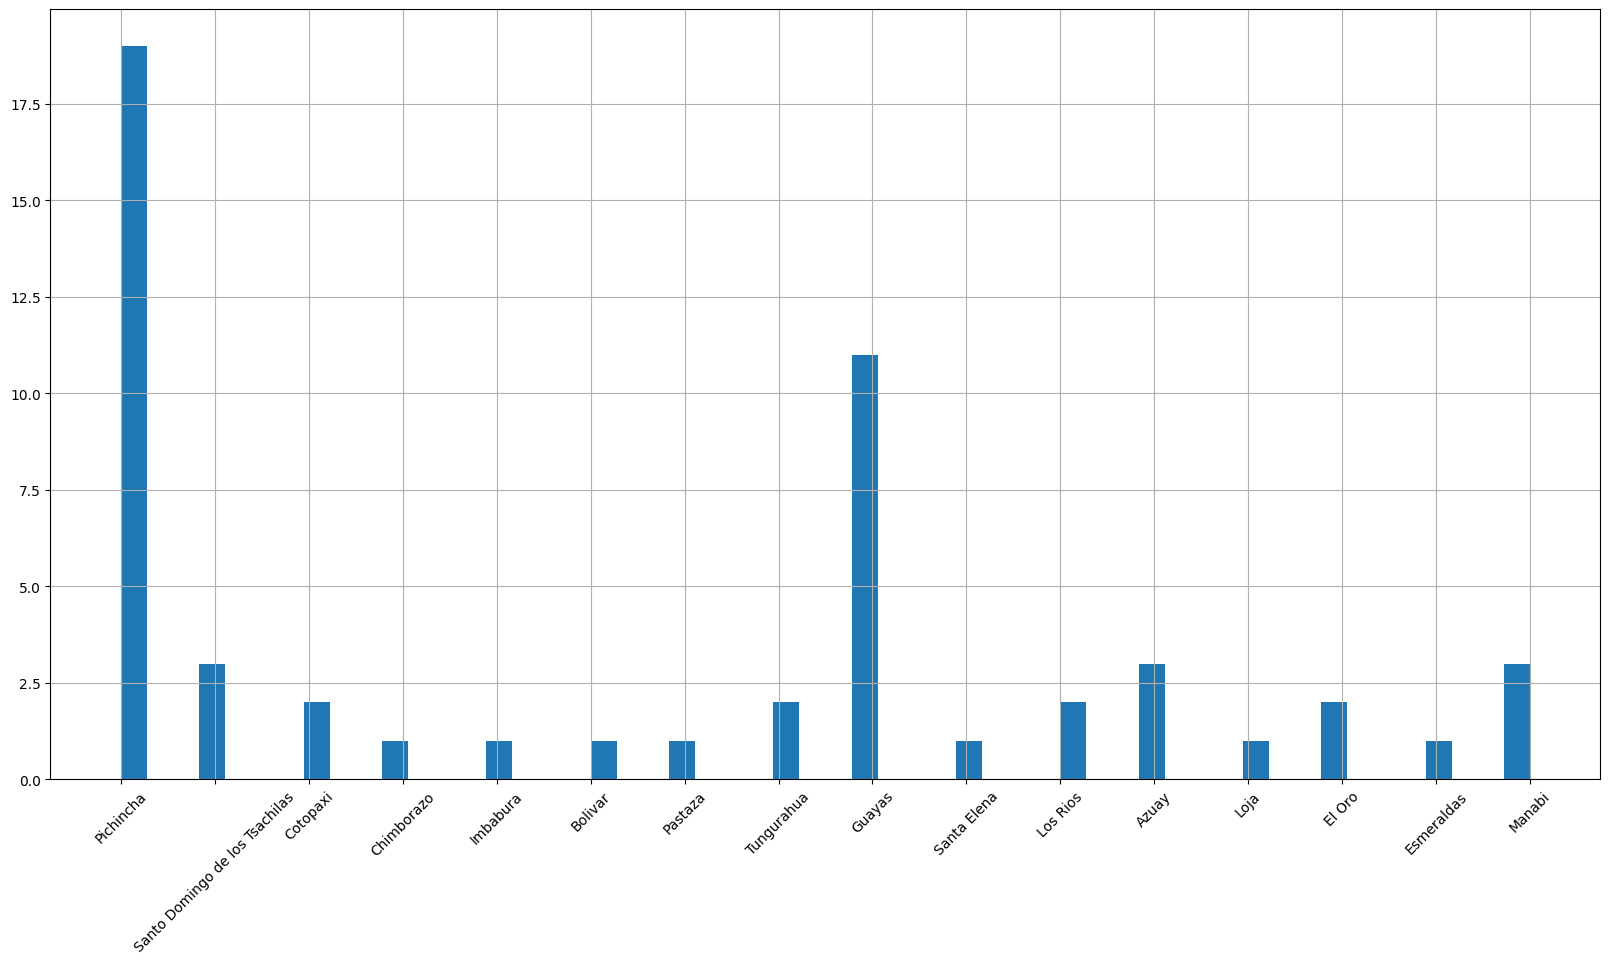

In [77]:
stores['state'].hist(bins=54)
plt.xticks(rotation=45)

In [78]:
train.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [79]:
stores[stores['cluster'] == 3]

store_nbr           city                           state type  cluster
15         16  Santo Domingo  Santo Domingo de los Tsachilas    C        3
29         30      Guayaquil                          Guayas    C        3
31         32      Guayaquil                          Guayas    C        3
32         33        Quevedo                        Los Rios    C        3
34         35         Playas                          Guayas    C        3
39         40        Machala                          El Oro    C        3
53         54      El Carmen                          Manabi    C        3

In [80]:
# join the stores with the train data based on the store_nbr
df = pd.merge(train, stores, on='store_nbr')

In [81]:
df.head()

id        date  store_nbr      family  sales  onpromotion   city  \
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0  Quito   
1   1  2013-01-01          1   BABY CARE    0.0            0  Quito   
2   2  2013-01-01          1      BEAUTY    0.0            0  Quito   
3   3  2013-01-01          1   BEVERAGES    0.0            0  Quito   
4   4  2013-01-01          1       BOOKS    0.0            0  Quito   

       state type  cluster  
0  Pichincha    D       13  
1  Pichincha    D       13  
2  Pichincha    D       13  
3  Pichincha    D       13  
4  Pichincha    D       13

In [82]:
# try and plot the average cumulative sales per city
df[df['city'] == 'Quito'].groupby(by = ['date']).agg({
    'sales' : 'sum',
}).describe()

sales
count    1684.000000
mean   330606.791466
std    127880.262368
min         0.000000
25%    225855.914688
50%    324746.019985
75%    402079.714659
max    810512.240328

In [83]:
cities = df['city'].unique()

In [84]:
def get_city_wise_stats(cities):
    for city in cities:
        print(f"aggregated sales for city : {city}")
        print(df[df['city'] == city].groupby(by = ['date']).agg({
        'sales' : 'sum',
        }).describe())
        df[df['city'] == city].groupby(by = ['date']).agg({
        'sales' : 'sum',
        }).sales.hist()
        plt.show()
        print('===================================================')

aggregated sales for city : Quito
               sales
count    1684.000000
mean   330606.791466
std    127880.262368
min         0.000000
25%    225855.914688
50%    324746.019985
75%    402079.714659
max    810512.240328


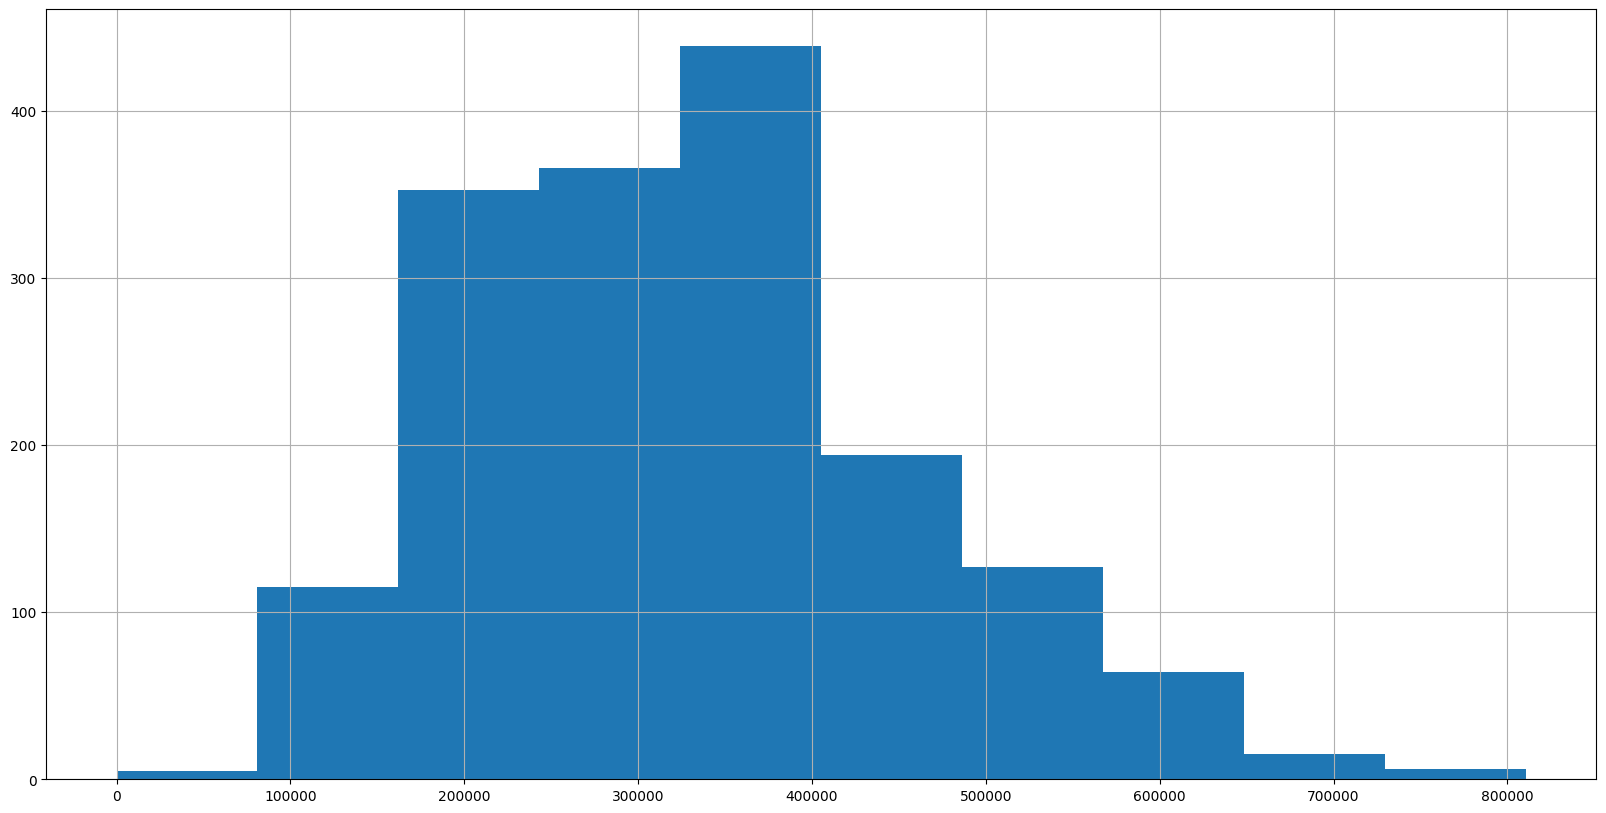

aggregated sales for city : Cayambe
              sales
count   1684.000000
mean   16820.402899
std     5044.996402
min        0.000000
25%    13250.917925
50%    16191.817979
75%    19649.618744
max    39085.735000


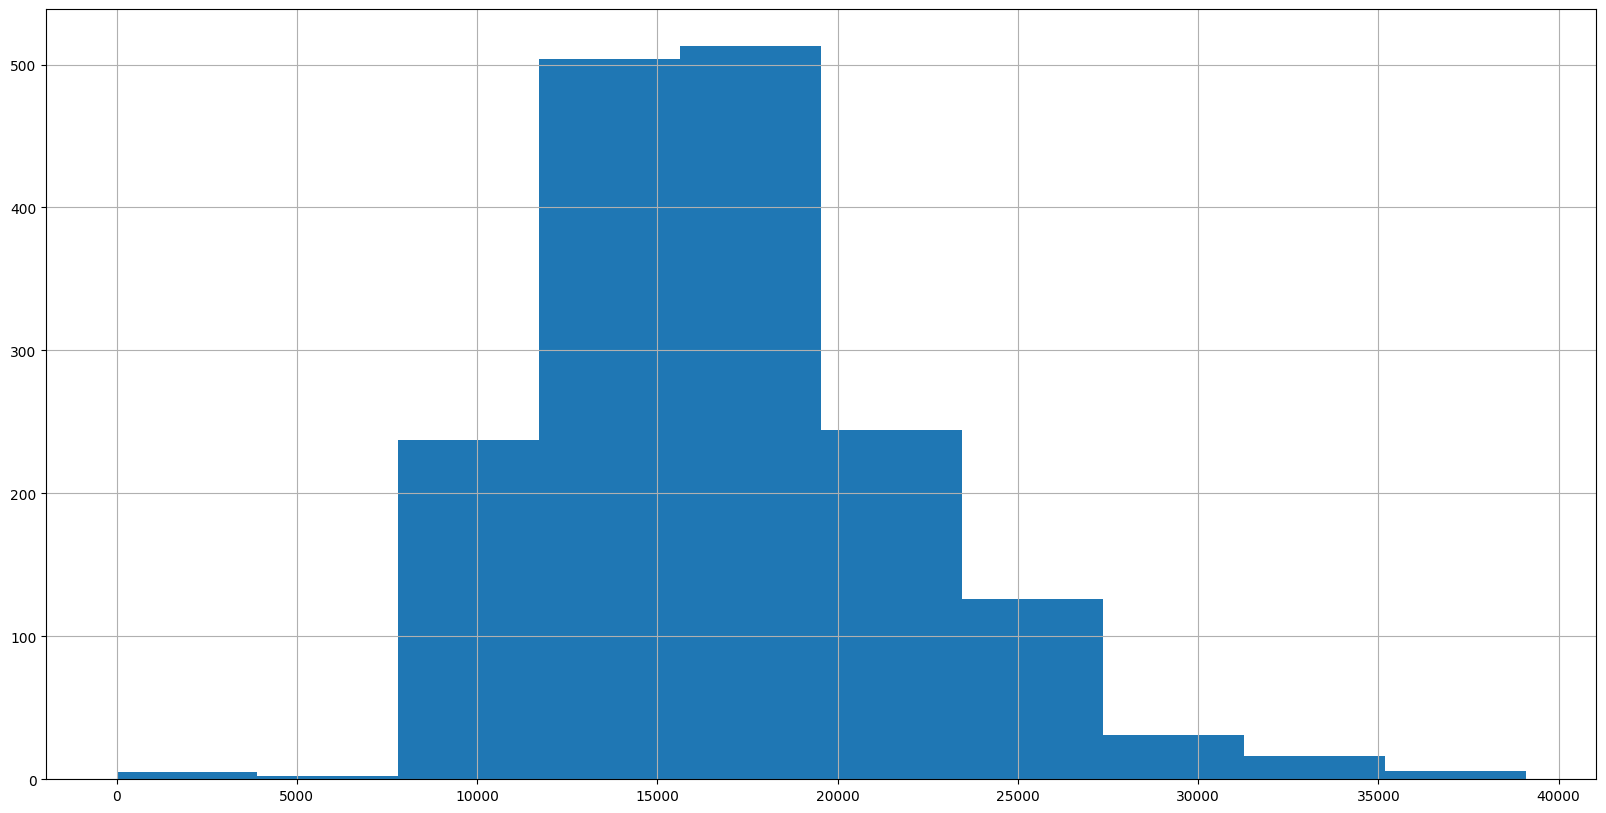

aggregated sales for city : Latacunga
              sales
count   1684.000000
mean   12578.541434
std     3633.614627
min        0.000000
25%     9852.651000
50%    12315.947990
75%    14852.165510
max    36310.961990


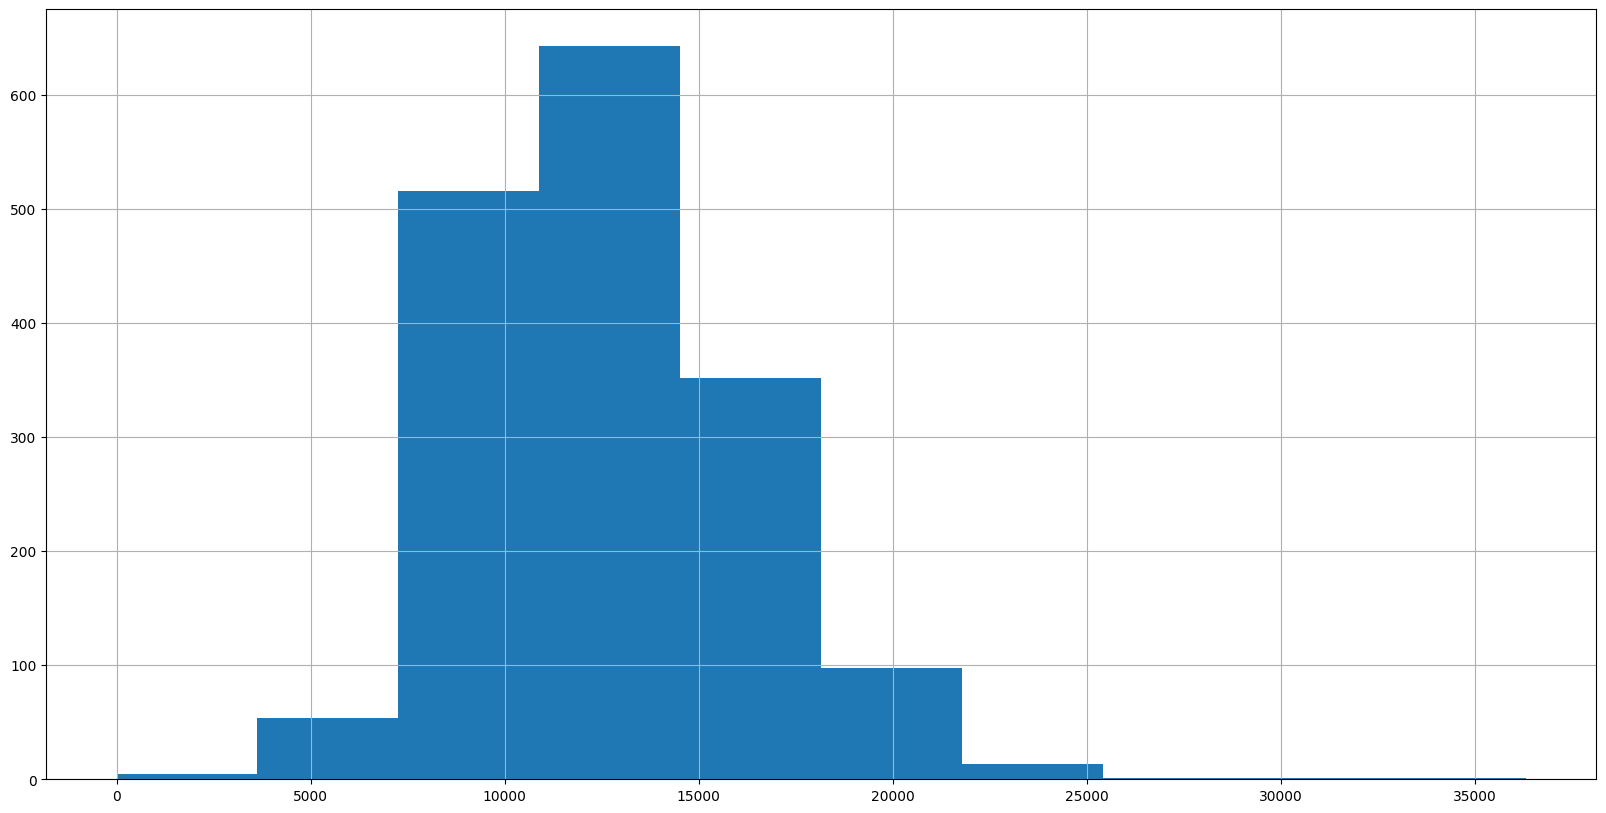

aggregated sales for city : Riobamba
              sales
count   1684.000000
mean    6762.422060
std     2287.849433
min        0.000000
25%     5319.634991
50%     6536.873990
75%     7912.235500
max    16445.920004


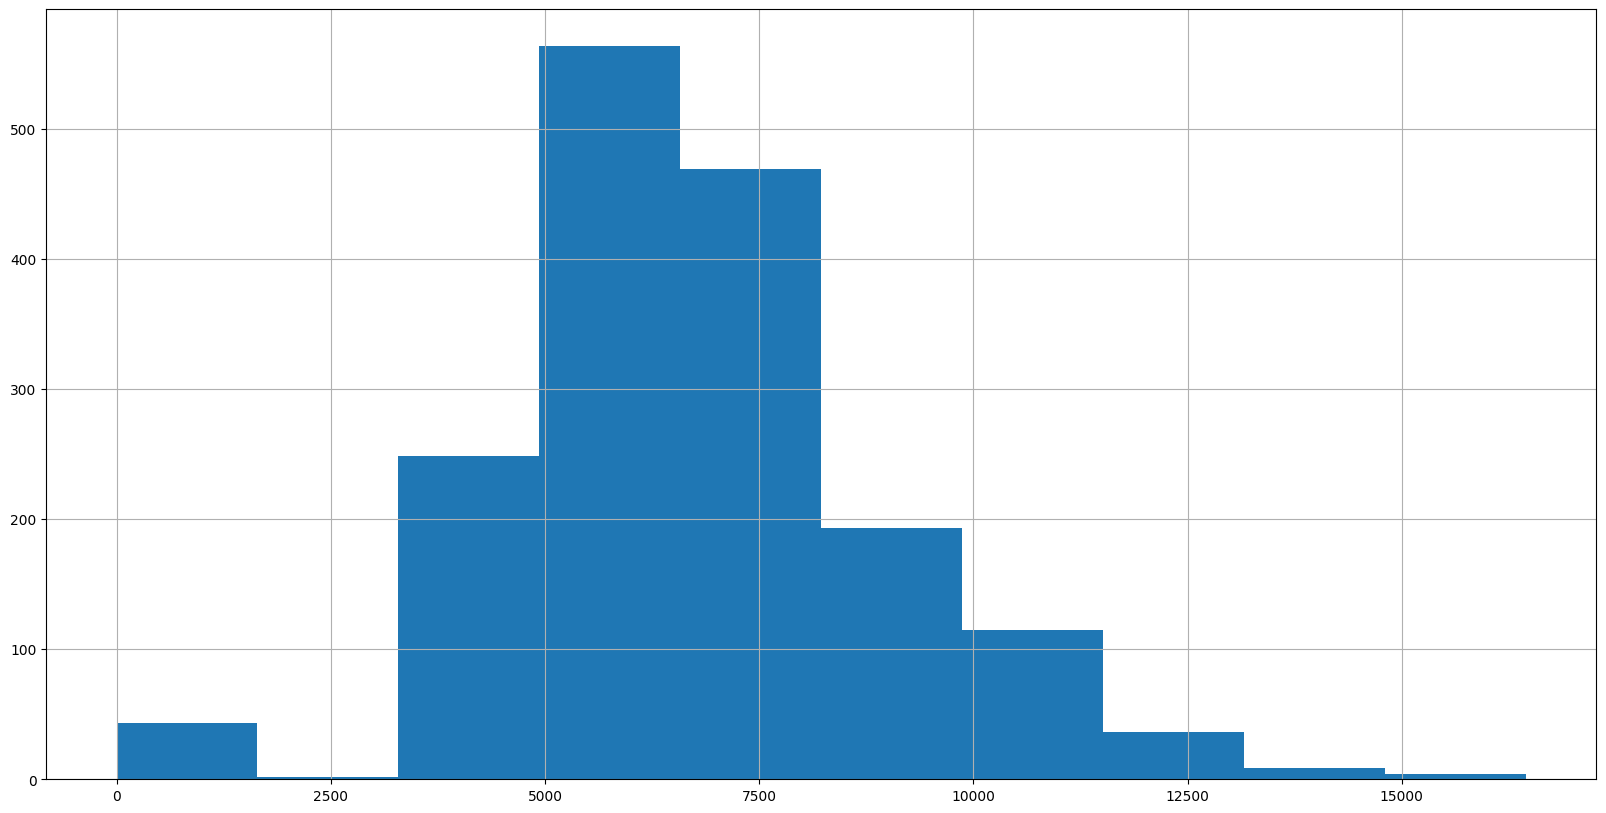

aggregated sales for city : Ibarra
              sales
count   1684.000000
mean    6800.041581
std     1826.393146
min        0.000000
25%     5345.173500
50%     6830.939500
75%     8024.514000
max    17315.300000


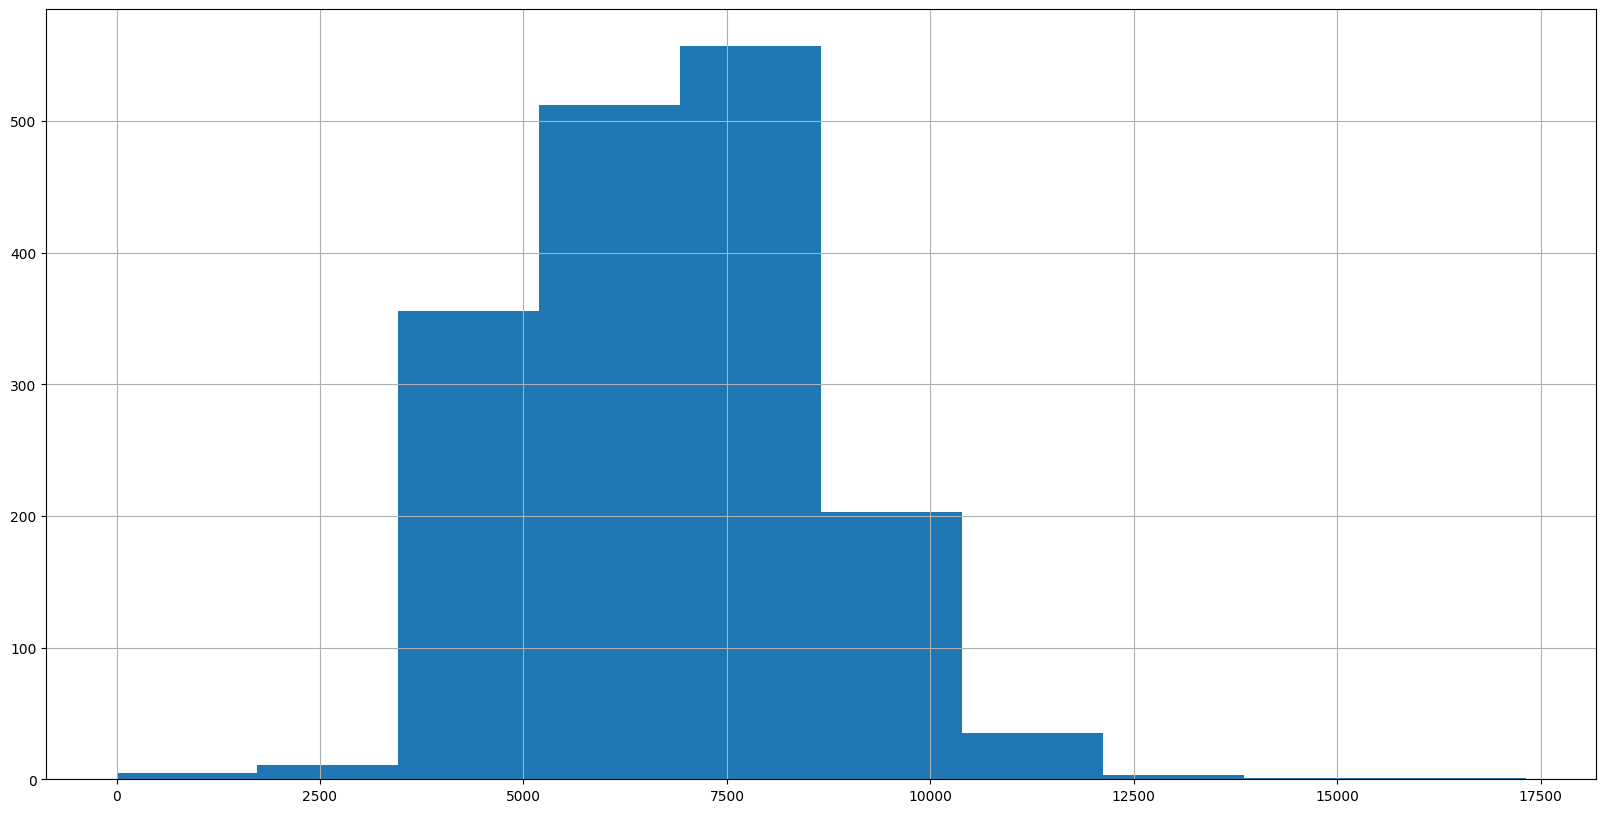

aggregated sales for city : Santo Domingo
              sales
count   1684.000000
mean   21279.289215
std     9082.694758
min        0.000000
25%    13514.568500
50%    20303.992985
75%    26921.378982
max    59205.063980


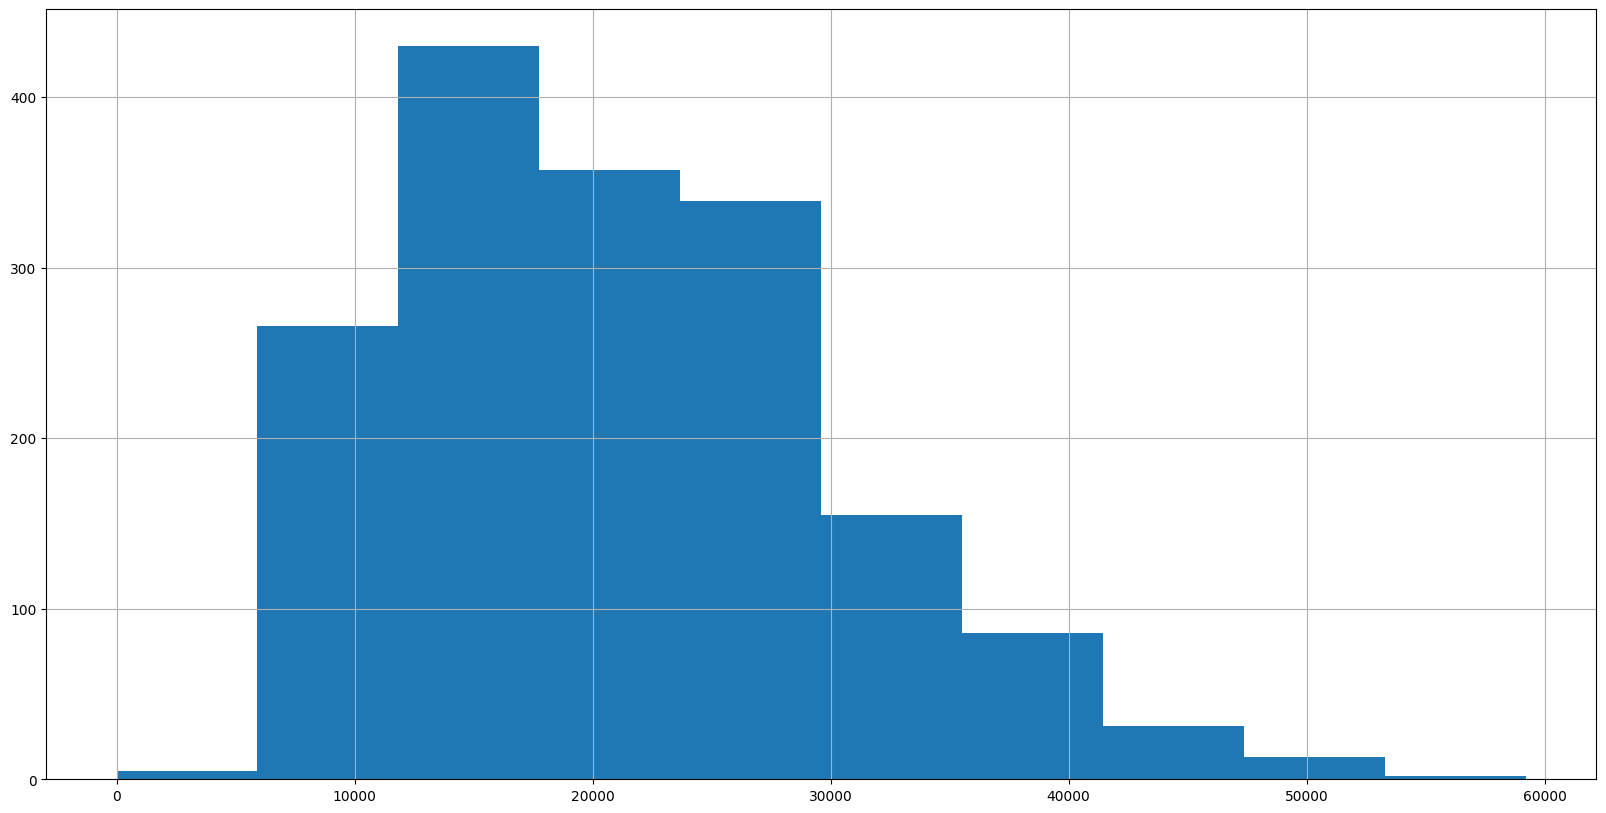

aggregated sales for city : Guaranda
              sales
count   1684.000000
mean    7749.115105
std     2829.384642
min        0.000000
25%     5759.738000
50%     7402.065495
75%     9083.781250
max    20718.453000


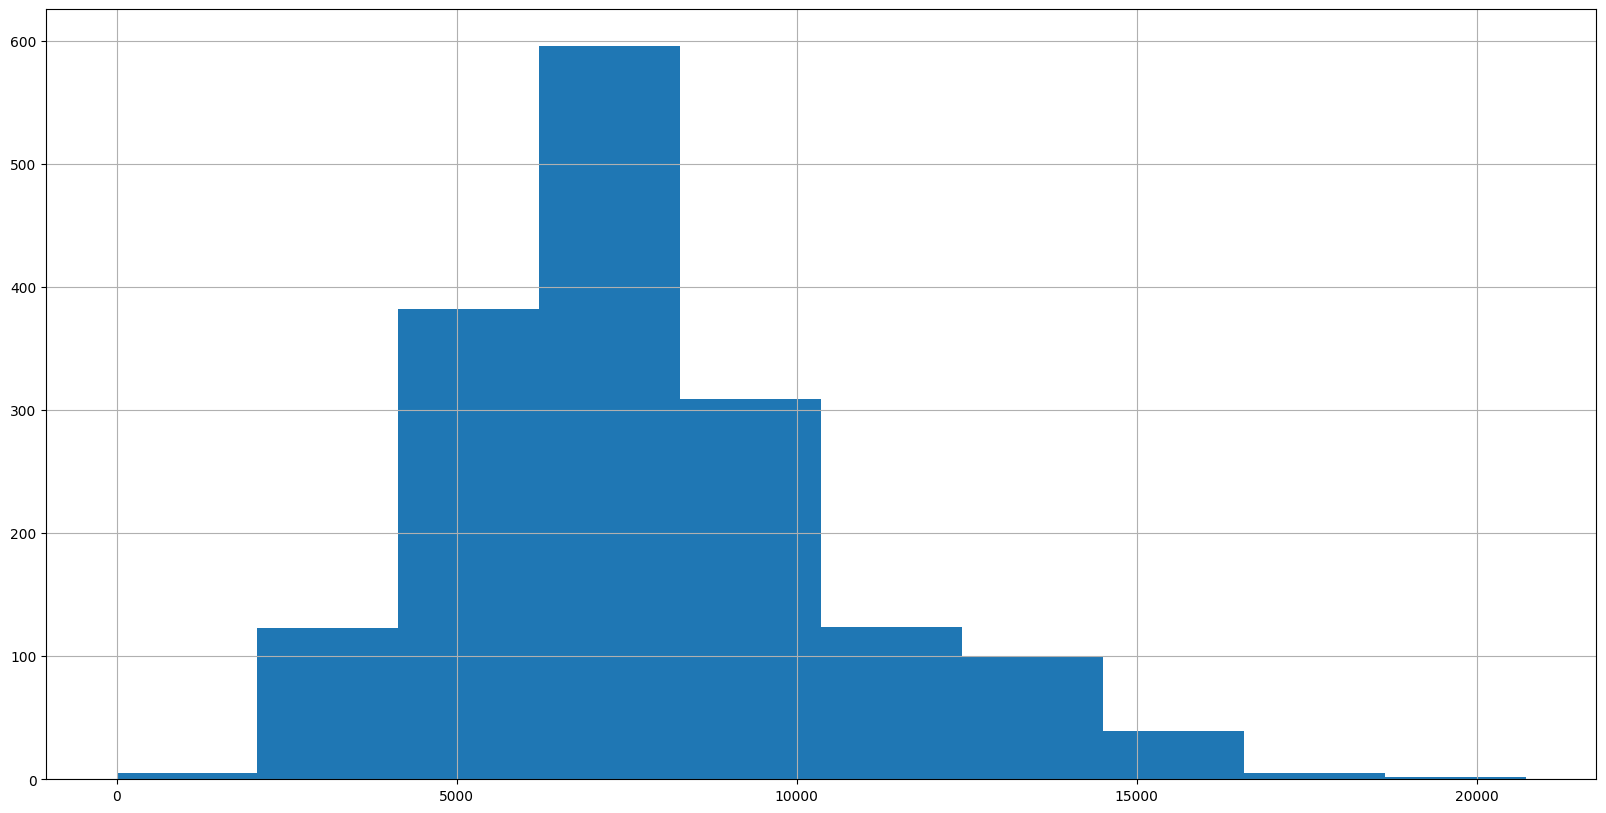

aggregated sales for city : Puyo
              sales
count   1684.000000
mean    2428.860891
std     3168.574394
min        0.000000
25%        0.000000
50%        0.000000
75%     5364.060250
max    21571.010010


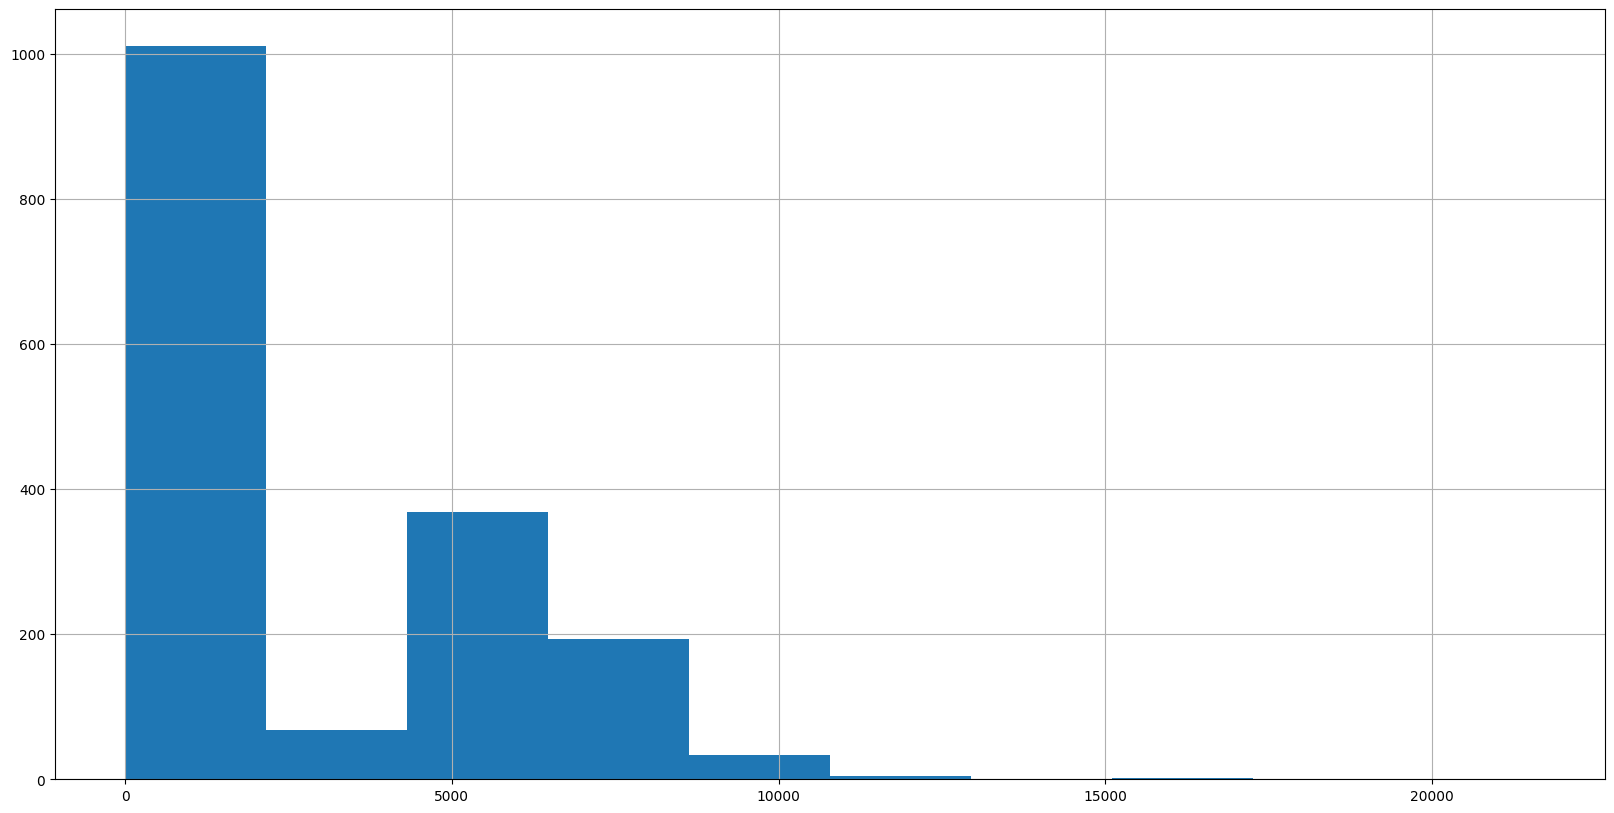

aggregated sales for city : Ambato
              sales
count   1684.000000
mean   23933.729988
std     7753.824575
min        0.000000
25%    17996.590008
50%    22965.830503
75%    28046.760250
max    55330.710000


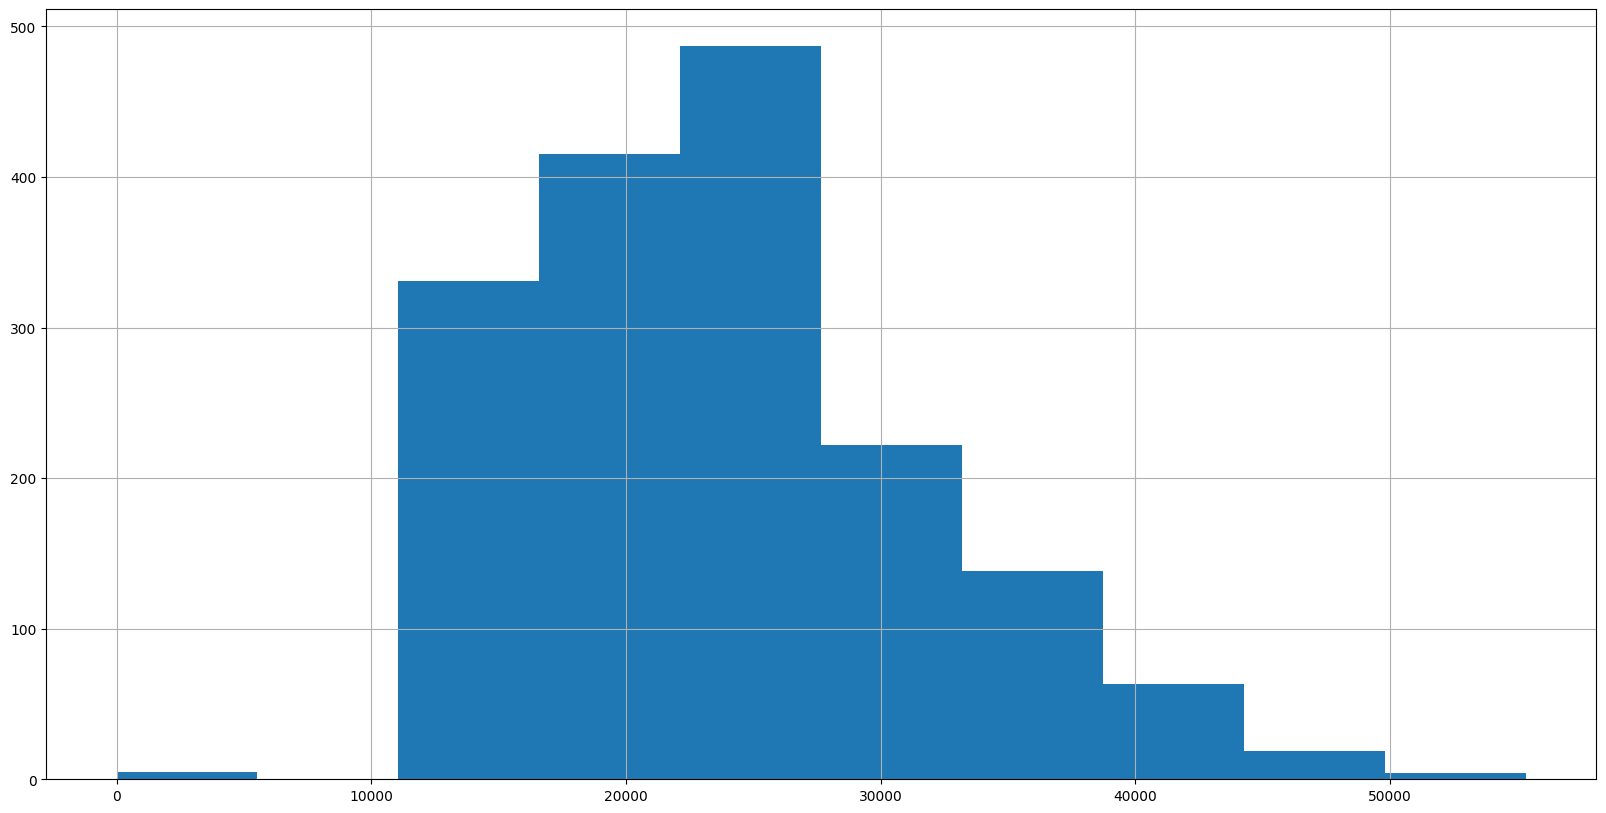

aggregated sales for city : Guayaquil
               sales
count    1684.000000
mean    73020.938528
std     26001.735298
min         0.000000
25%     50991.845516
50%     73314.080987
75%     89891.807751
max    200287.911959


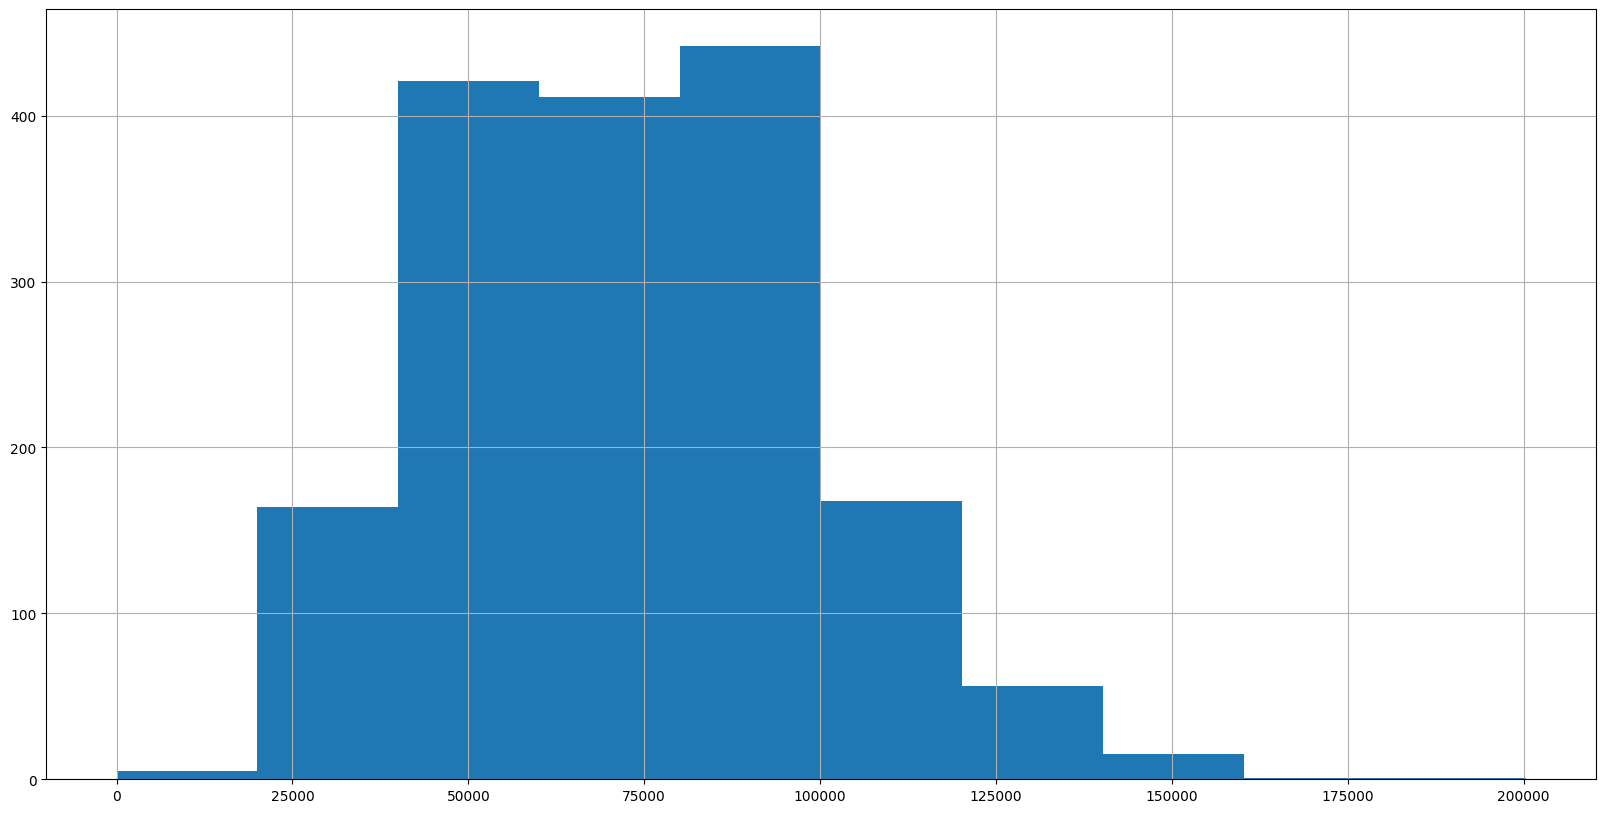

aggregated sales for city : Salinas
              sales
count   1684.000000
mean    6782.065245
std     4758.897552
min        0.000000
25%     4189.379003
50%     5785.175005
75%     7948.392485
max    39140.266900


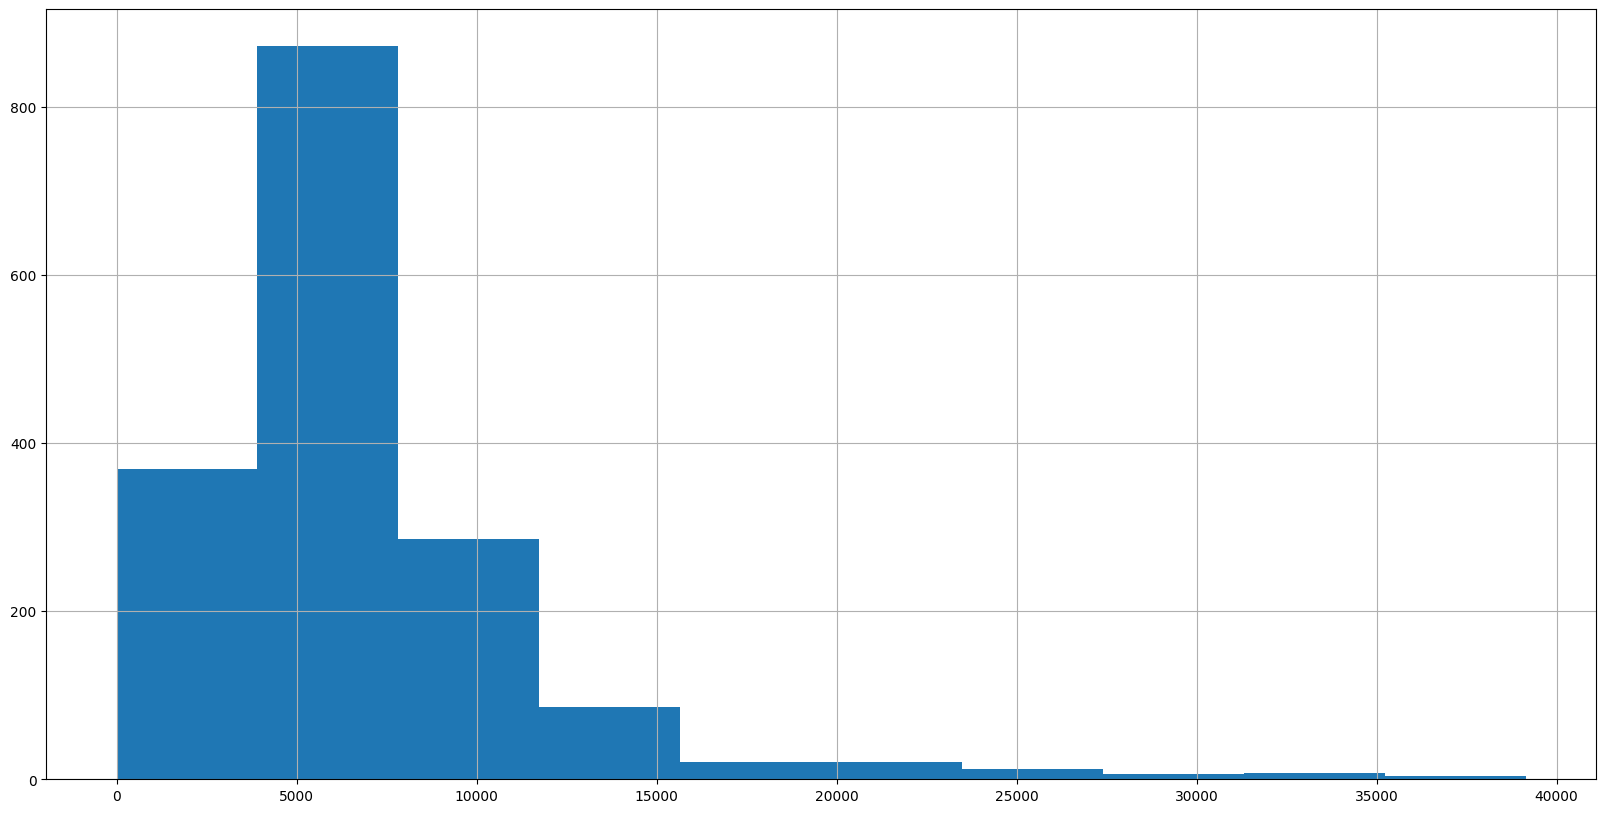

aggregated sales for city : Daule
              sales
count   1684.000000
mean   11394.311984
std     4704.777363
min        0.000000
25%     7635.370000
50%    11141.273500
75%    14180.842250
max    40102.023010


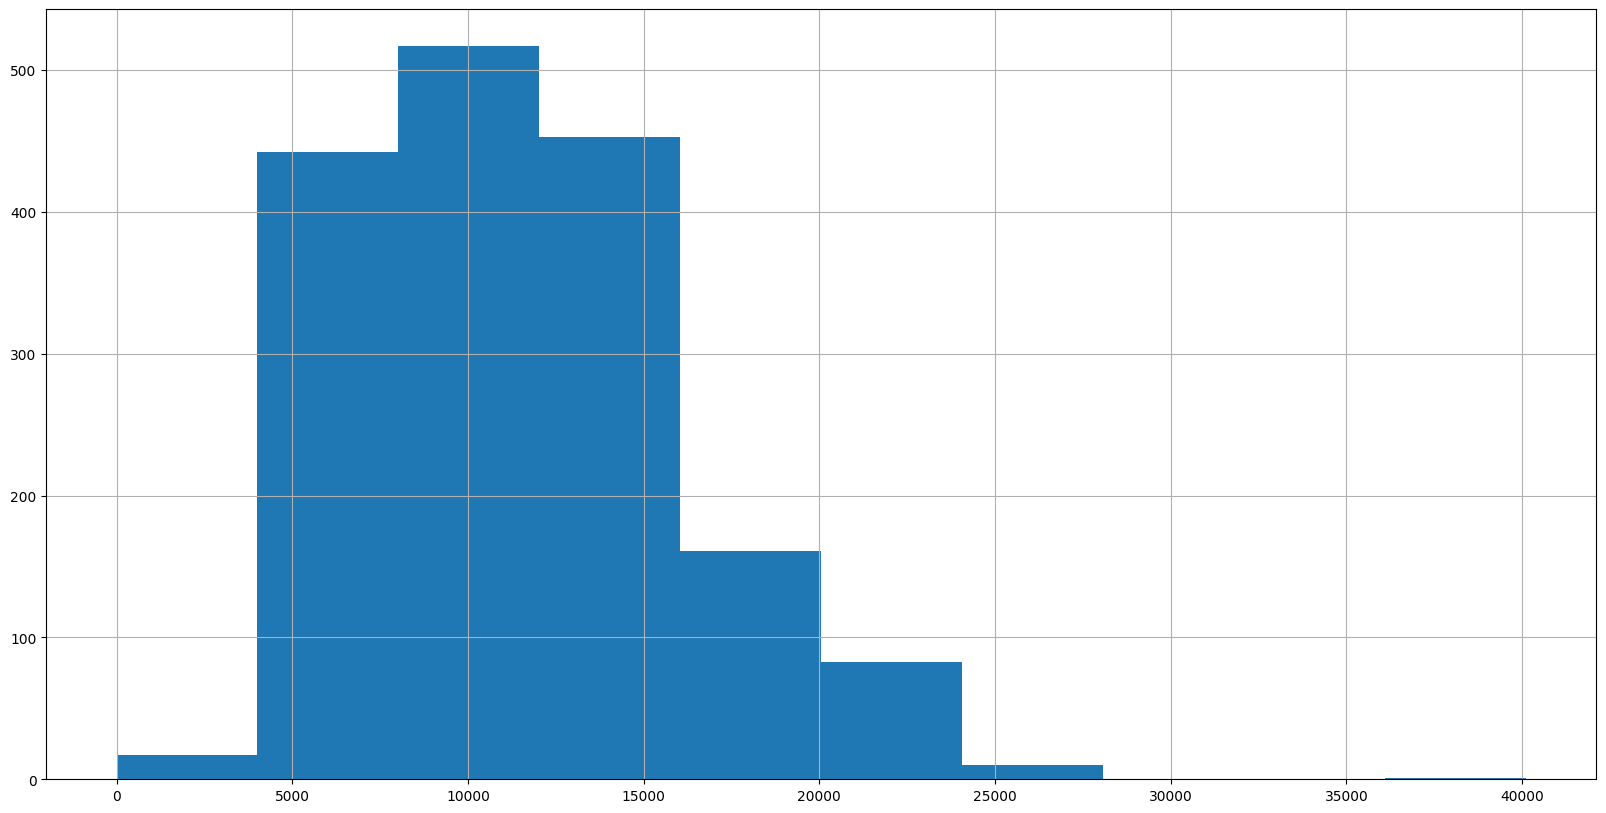

aggregated sales for city : Babahoyo
              sales
count   1684.000000
mean   10538.522982
std     4265.052706
min        0.000000
25%     7445.564250
50%    10040.744503
75%    12797.051000
max    52419.514000


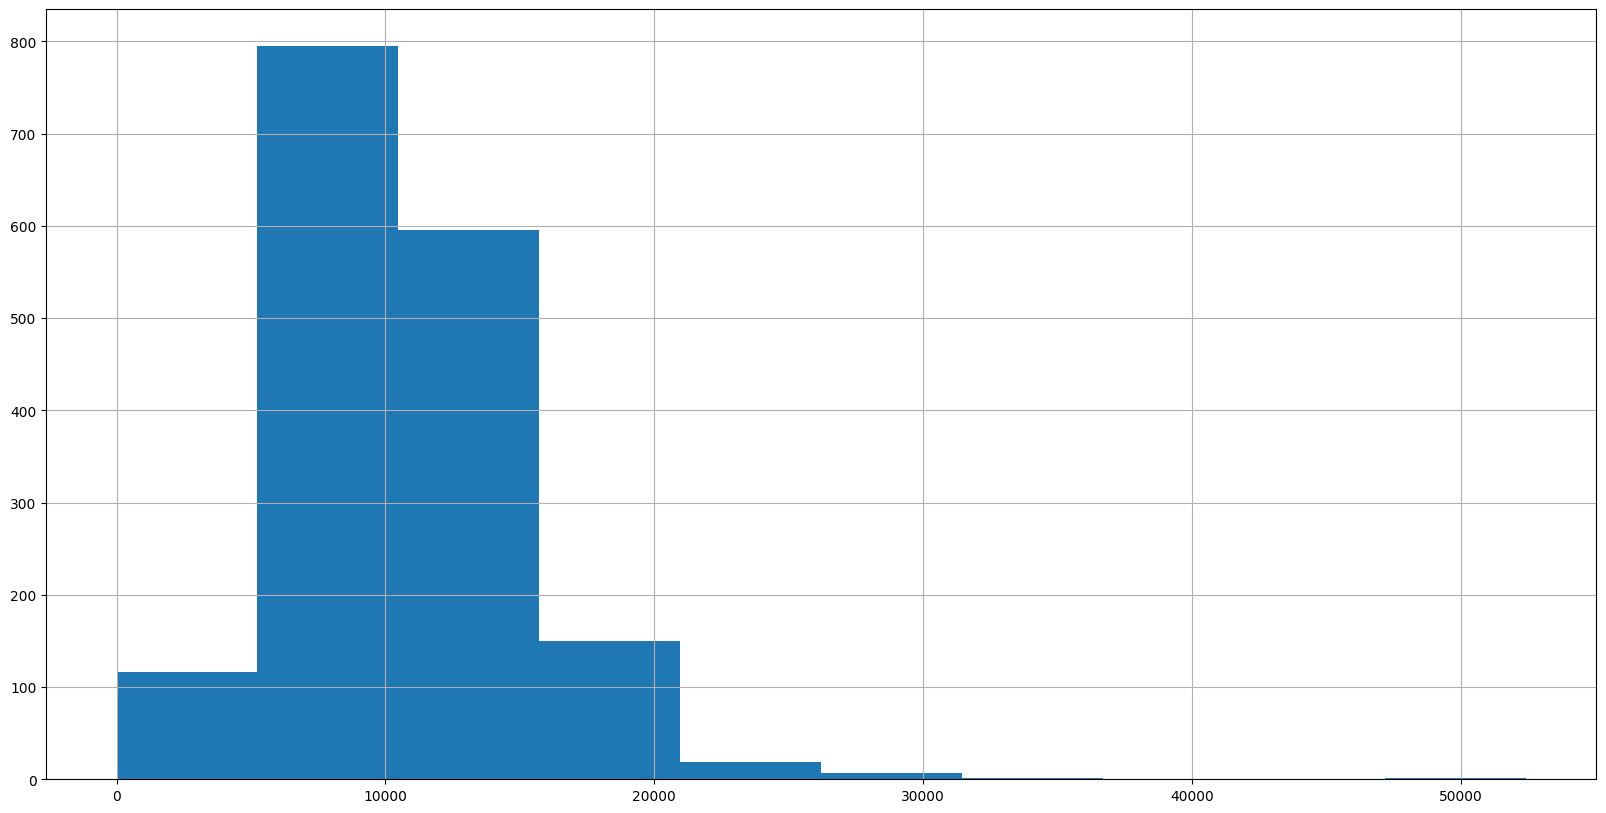

aggregated sales for city : Quevedo
              sales
count   1684.000000
mean    8419.537585
std     2859.220862
min        0.000000
25%     6330.449250
50%     8037.705000
75%    10220.768015
max    22169.688980


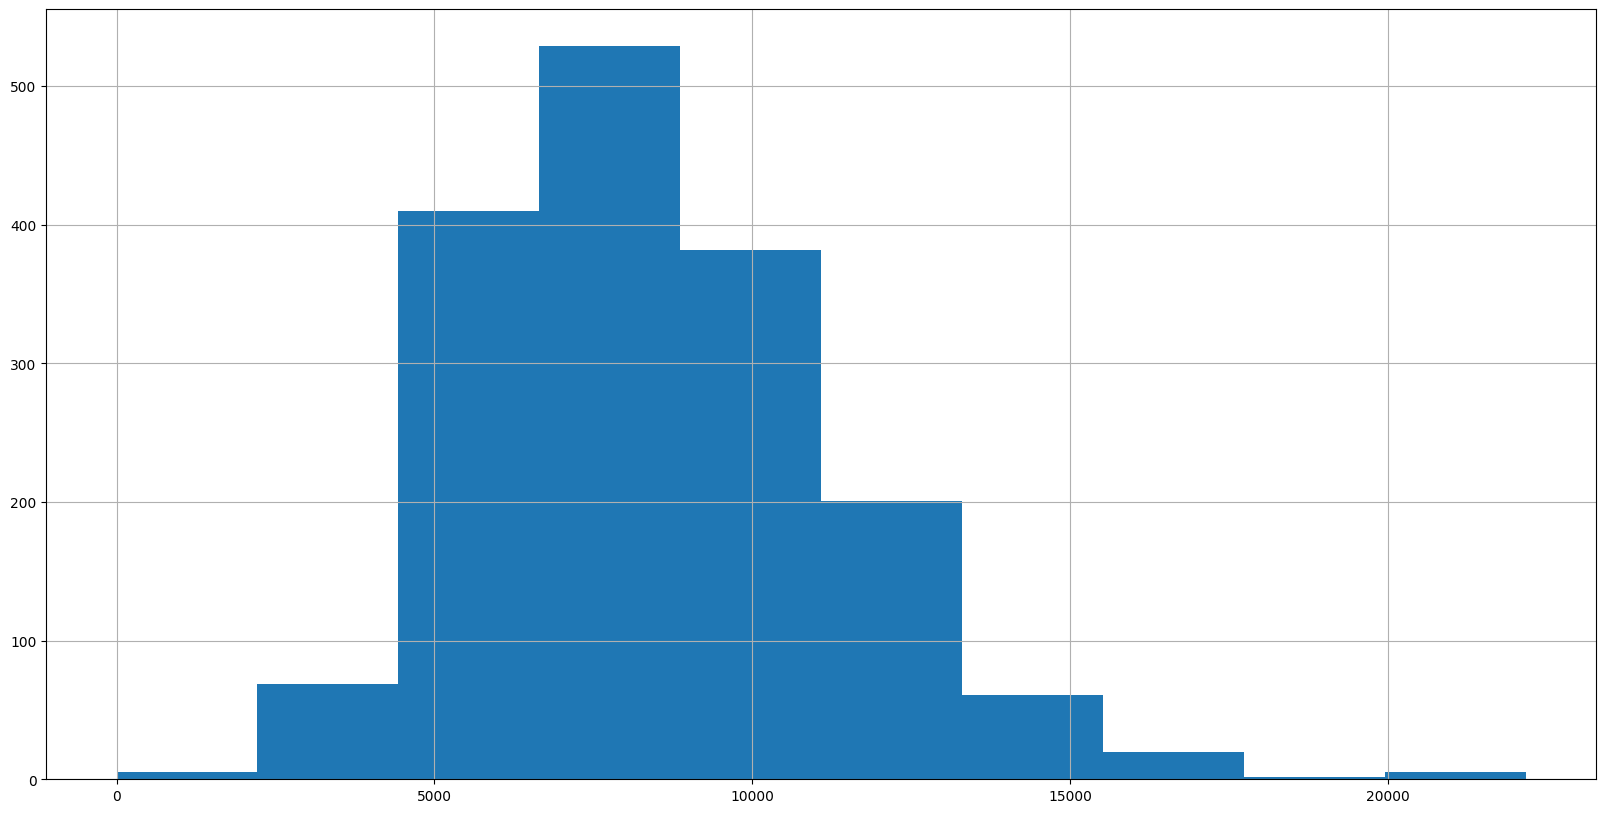

aggregated sales for city : Playas
              sales
count   1684.000000
mean    4558.598231
std     2353.910190
min        0.000000
25%     3224.003500
50%     4416.036000
75%     5573.414002
max    50977.860990


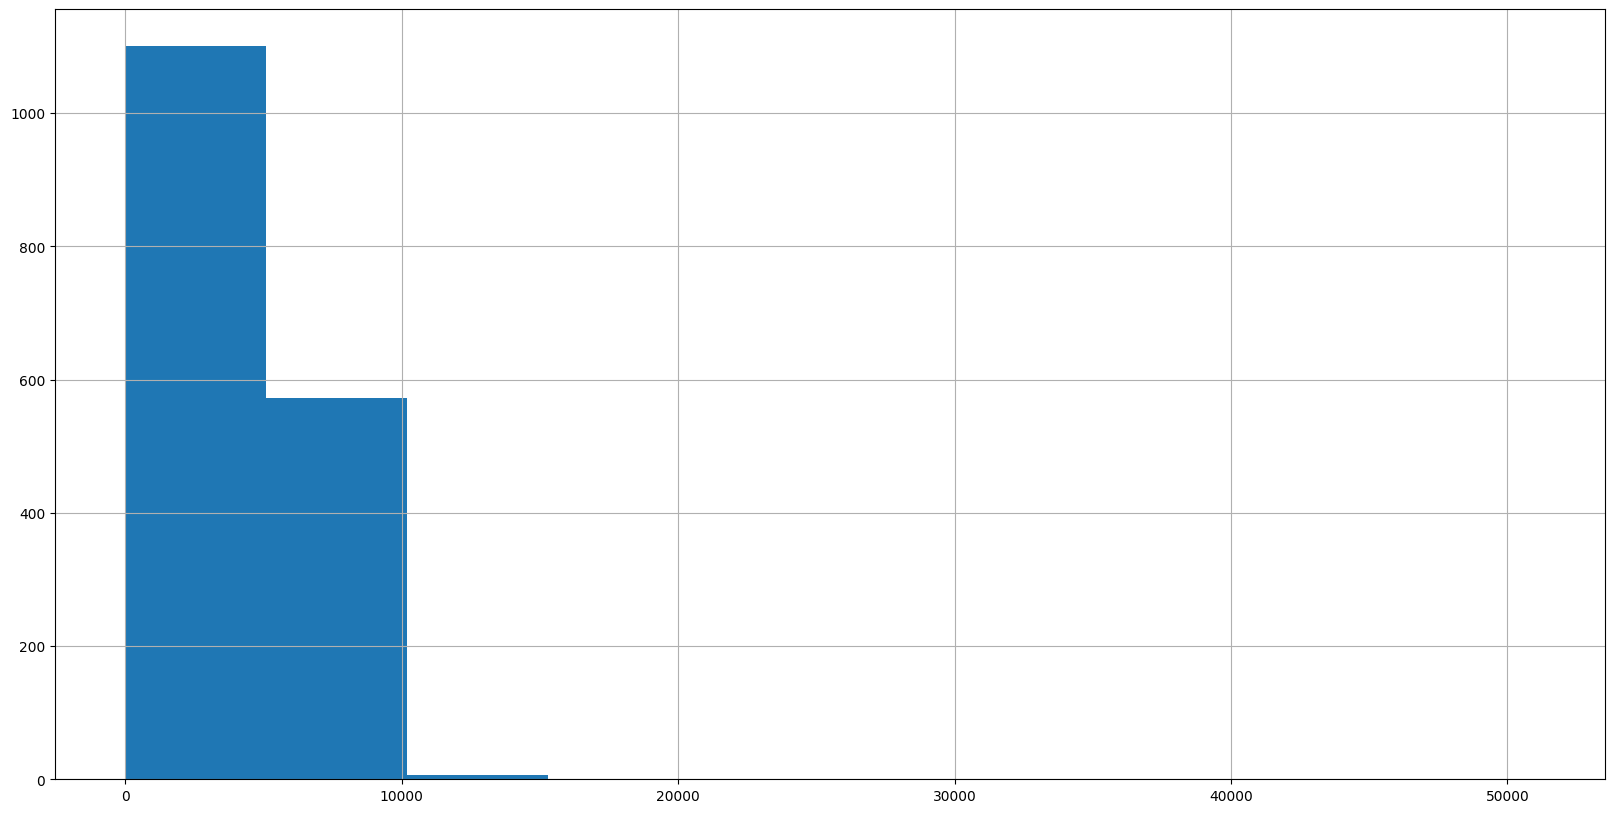

aggregated sales for city : Libertad
              sales
count   1684.000000
mean    9098.830817
std     4350.956926
min        0.000000
25%     6412.622250
50%     9287.305500
75%    11968.019000
max    23629.436000


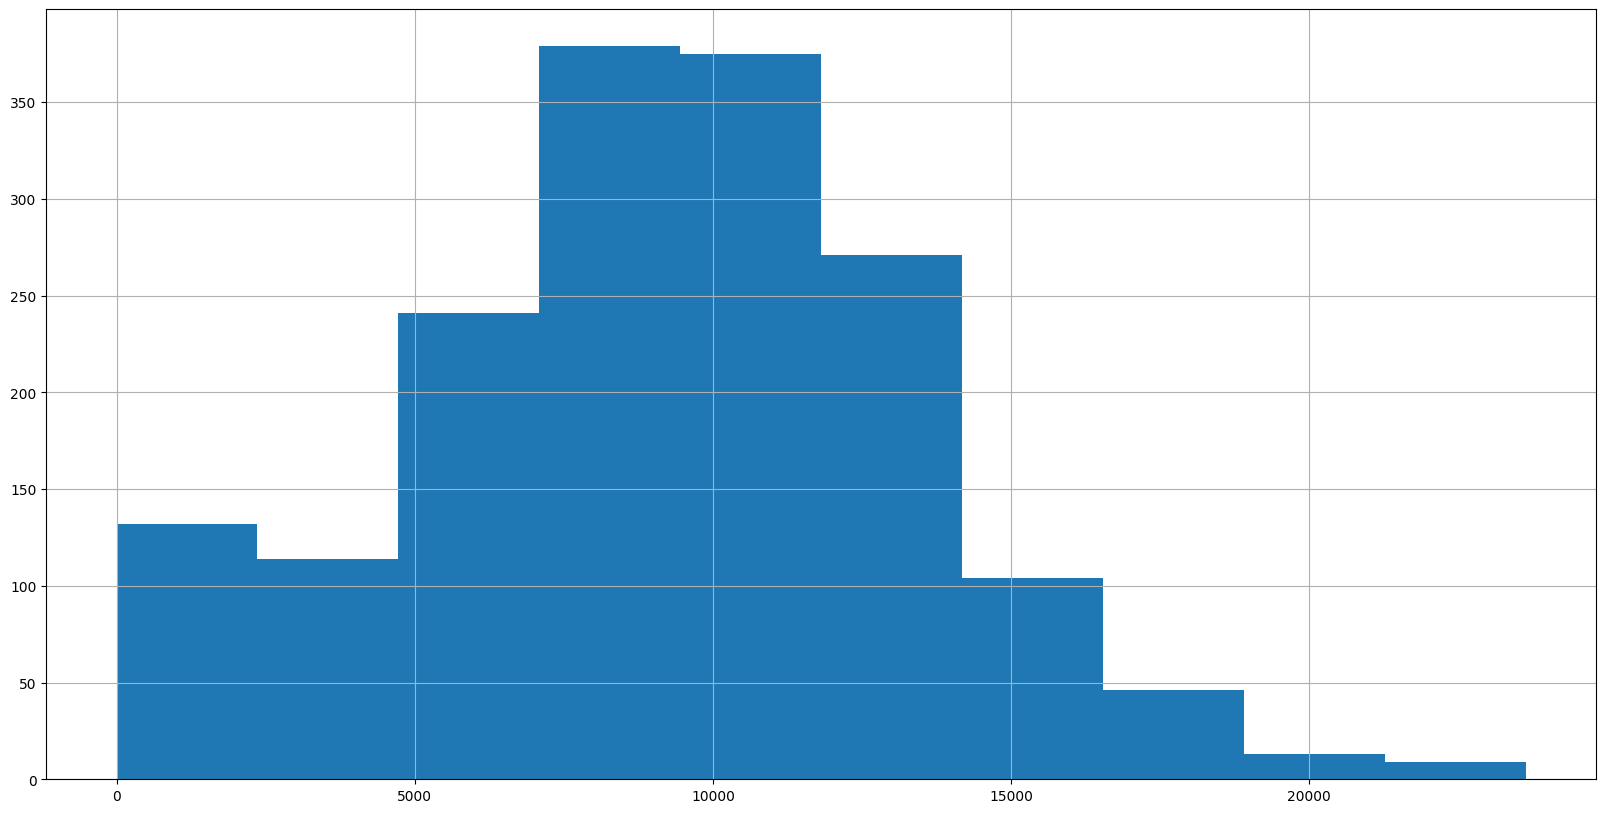

aggregated sales for city : Cuenca
               sales
count    1684.000000
mean    29197.503583
std     13028.406160
min         0.000000
25%     17360.542739
50%     27879.949490
75%     38715.756250
max    127710.460004


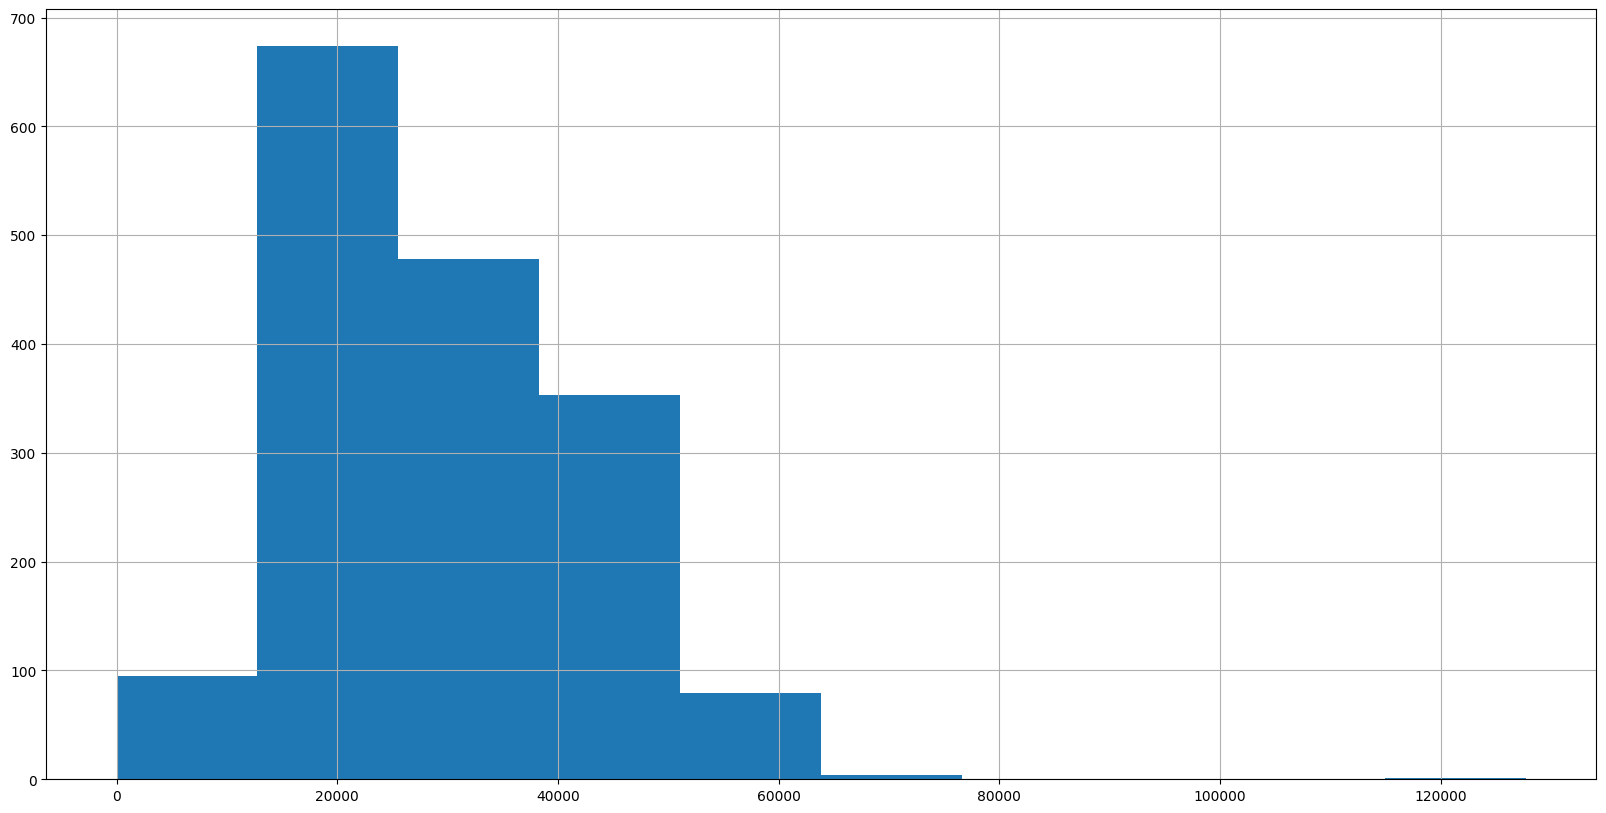

aggregated sales for city : Loja
              sales
count   1684.000000
mean   11199.524502
std     4129.172021
min        0.000000
25%     8013.337000
50%    10576.697000
75%    13568.780501
max    26825.178000


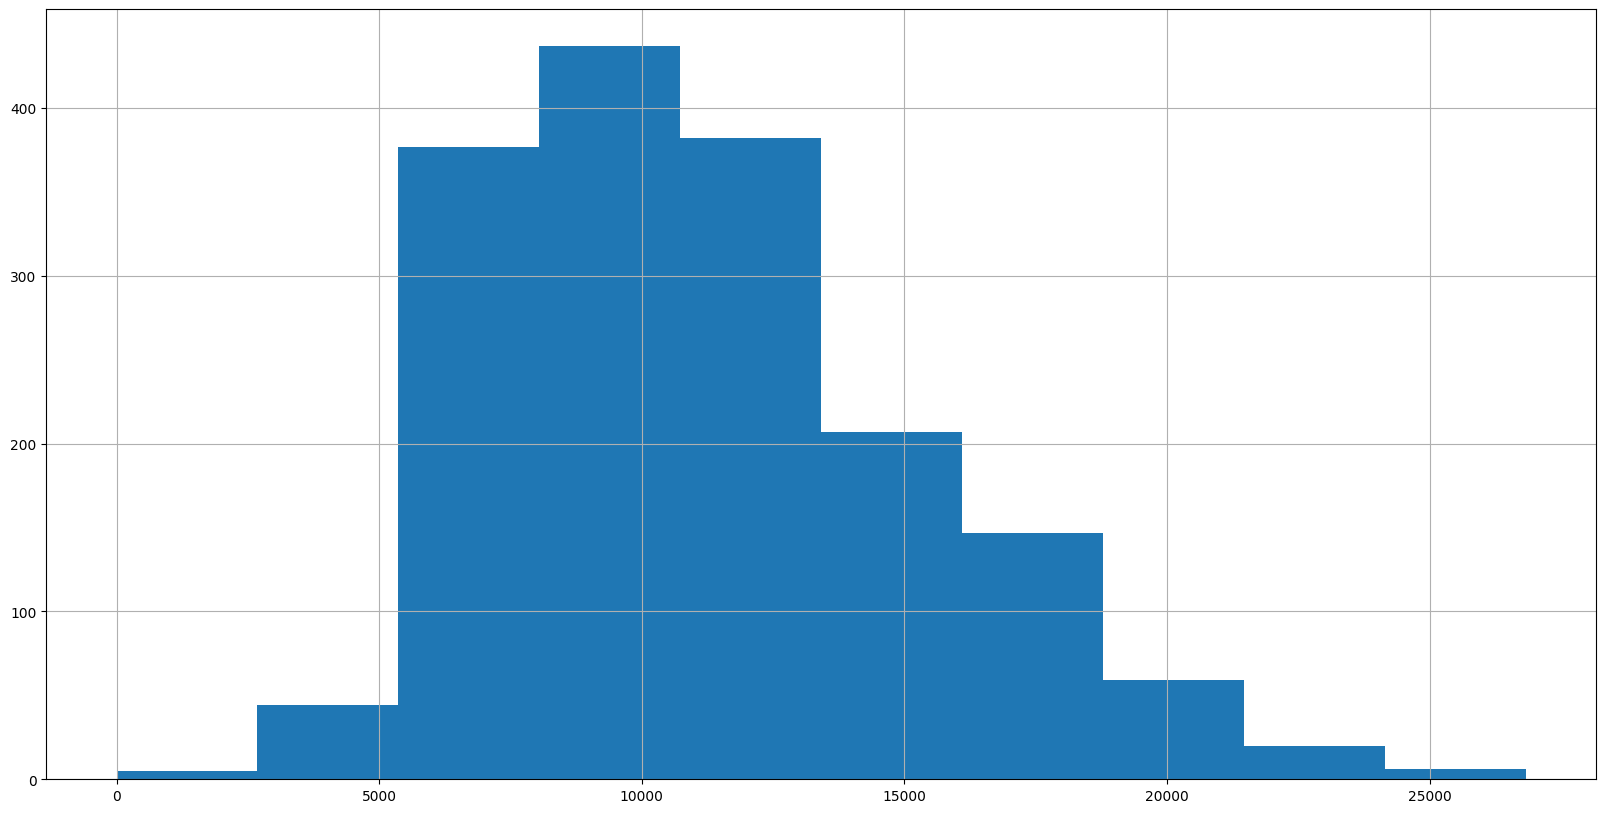

aggregated sales for city : Machala
              sales
count   1684.000000
mean   19825.888684
std     7977.217682
min        0.000000
25%    13380.344751
50%    19799.866990
75%    25693.692759
max    45076.845000


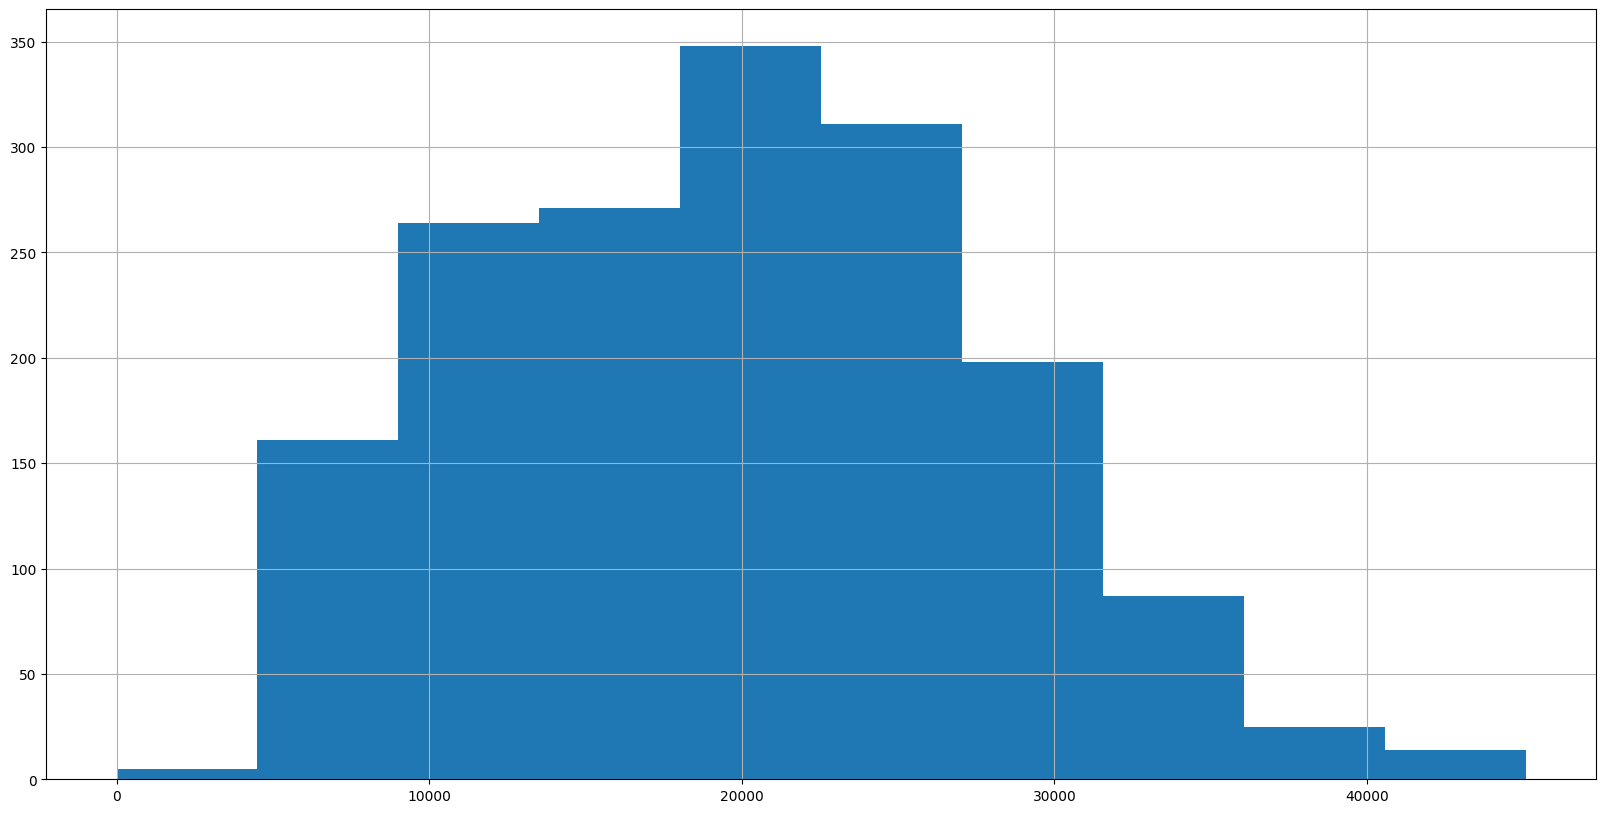

aggregated sales for city : Esmeraldas
              sales
count   1684.000000
mean    9733.783974
std     3696.194946
min        0.000000
25%     7105.976750
50%     9295.174000
75%    11864.966250
max    25715.442000


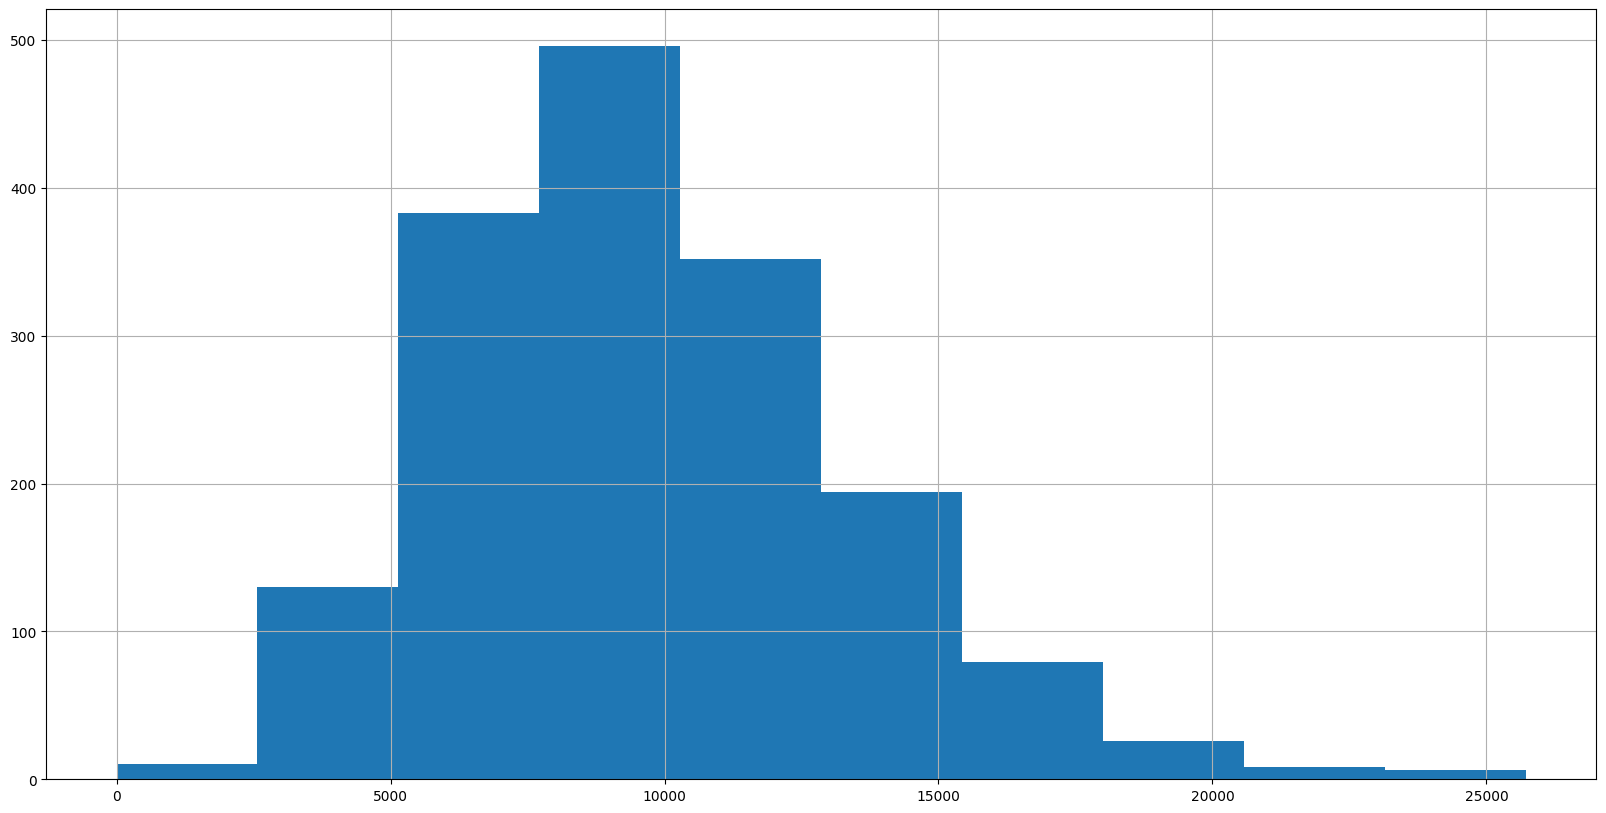

aggregated sales for city : Manta
              sales
count   1684.000000
mean    8261.482789
std     9389.661751
min        0.000000
25%        0.000000
50%     6319.150010
75%    10895.812925
max    52071.472970


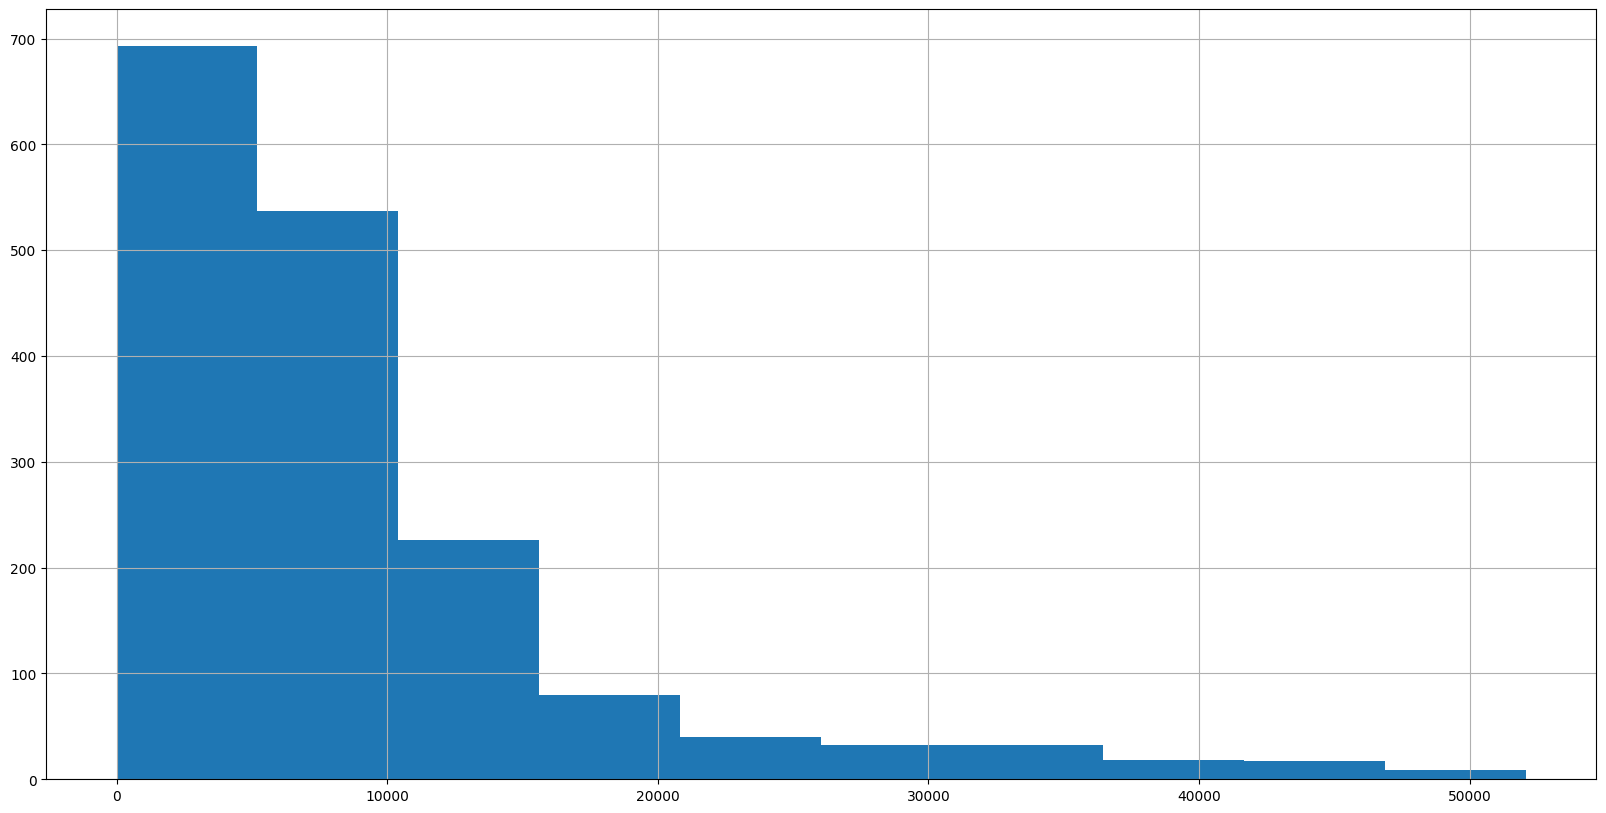

aggregated sales for city : El Carmen
              sales
count   1684.000000
mean    6566.201376
std     2785.023706
min        0.000000
25%     4492.768251
50%     6154.038014
75%     8023.517000
max    25723.128000


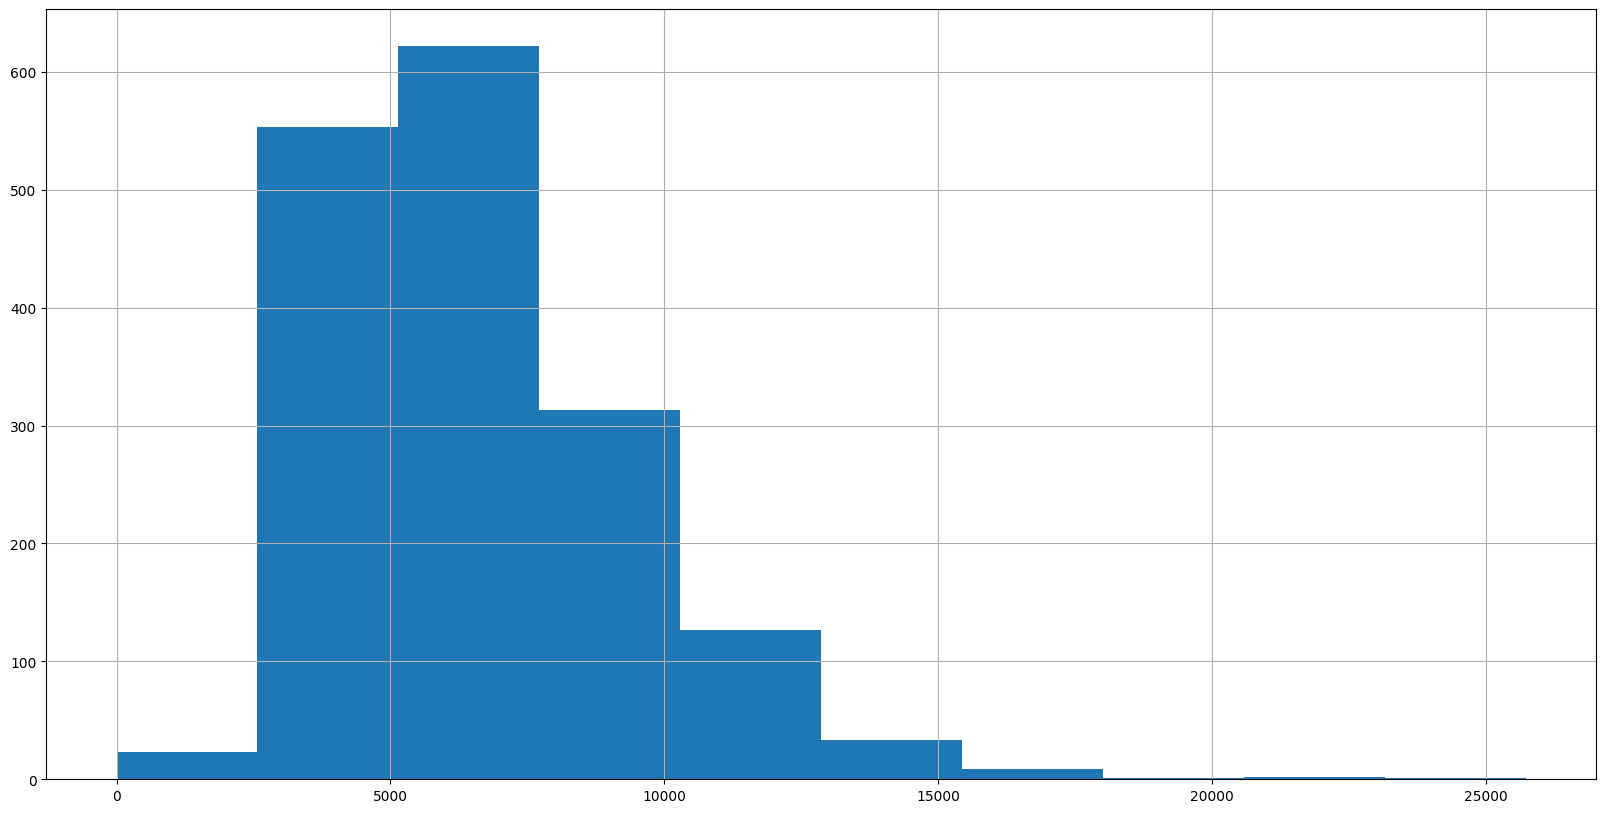

In [85]:
get_city_wise_stats(cities)

In [86]:
new_test = pd.merge(test, stores, on='store_nbr')

In [87]:
new_test.head()

id        date  store_nbr      family  onpromotion   city      state  \
0  3000888  2017-08-16          1  AUTOMOTIVE            0  Quito  Pichincha   
1  3000889  2017-08-16          1   BABY CARE            0  Quito  Pichincha   
2  3000890  2017-08-16          1      BEAUTY            2  Quito  Pichincha   
3  3000891  2017-08-16          1   BEVERAGES           20  Quito  Pichincha   
4  3000892  2017-08-16          1       BOOKS            0  Quito  Pichincha   

  type  cluster  
0    D       13  
1    D       13  
2    D       13  
3    D       13  
4    D       13

In [88]:
new_test.date = pd.to_datetime(new_test.date)

In [89]:
# extracting features from date
new_test['Weekday'] = new_test.date.dt.weekday
new_test['year'] = new_test.date.dt.year
new_test['month'] = new_test.date.dt.month
new_test['day'] = new_test.date.dt.day

In [90]:
new_test.head()

id       date  store_nbr      family  onpromotion   city      state  \
0  3000888 2017-08-16          1  AUTOMOTIVE            0  Quito  Pichincha   
1  3000889 2017-08-16          1   BABY CARE            0  Quito  Pichincha   
2  3000890 2017-08-16          1      BEAUTY            2  Quito  Pichincha   
3  3000891 2017-08-16          1   BEVERAGES           20  Quito  Pichincha   
4  3000892 2017-08-16          1       BOOKS            0  Quito  Pichincha   

  type  cluster  Weekday  year  month  day  
0    D       13        2  2017      8   16  
1    D       13        2  2017      8   16  
2    D       13        2  2017      8   16  
3    D       13        2  2017      8   16  
4    D       13        2  2017      8   16

In [91]:
train_df = df.copy()

In [92]:
train_df.date = pd.to_datetime(train_df.date)

In [93]:
# extracting features from date
train_df['Weekday'] = train_df.date.dt.weekday
train_df['year'] = train_df.date.dt.year
train_df['month'] = train_df.date.dt.month
train_df['day'] = train_df.date.dt.day

In [94]:
train_df['isWeekend'] = train_df.Weekday.apply(lambda x: x == 1)

In [95]:
train_df['isWeekend'] = train_df.Weekday.apply(lambda x: 1 if (x == 6 or x == 5) else 0)

In [96]:
# checking whether the Weekend feature is correct or not 
train_df[(train_df.Weekday != 5) & (train_df.Weekday != 6)]['isWeekend'].sum()

0

In [97]:
test_df = new_test.copy()

In [98]:
test_df.head()

id       date  store_nbr      family  onpromotion   city      state  \
0  3000888 2017-08-16          1  AUTOMOTIVE            0  Quito  Pichincha   
1  3000889 2017-08-16          1   BABY CARE            0  Quito  Pichincha   
2  3000890 2017-08-16          1      BEAUTY            2  Quito  Pichincha   
3  3000891 2017-08-16          1   BEVERAGES           20  Quito  Pichincha   
4  3000892 2017-08-16          1       BOOKS            0  Quito  Pichincha   

  type  cluster  Weekday  year  month  day  
0    D       13        2  2017      8   16  
1    D       13        2  2017      8   16  
2    D       13        2  2017      8   16  
3    D       13        2  2017      8   16  
4    D       13        2  2017      8   16

In [99]:
# checking type of products 
train_df.head()

id       date  store_nbr      family  sales  onpromotion   city      state  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Quito  Pichincha   
1   1 2013-01-01          1   BABY CARE    0.0            0  Quito  Pichincha   
2   2 2013-01-01          1      BEAUTY    0.0            0  Quito  Pichincha   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Quito  Pichincha   
4   4 2013-01-01          1       BOOKS    0.0            0  Quito  Pichincha   

  type  cluster  Weekday  year  month  day  isWeekend  
0    D       13        1  2013      1    1          0  
1    D       13        1  2013      1    1          0  
2    D       13        1  2013      1    1          0  
3    D       13        1  2013      1    1          0  
4    D       13        1  2013      1    1          0

In [100]:
train_df['family'].describe()

count        3000888
unique            33
top       AUTOMOTIVE
freq           90936
Name: family, dtype: object

In [101]:
train_df['family'].value_counts()

family
AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION          

In [102]:
family_prod_df = train_df.groupby(['date', 'family']).agg({
    'sales':'sum',
})

             sales
count  1684.000000
mean    200.649050
std     100.410387
min       2.000000
25%     122.750000
50%     183.000000
75%     248.000000
max     792.000000
mean sales    200.64905
dtype: float64


<Axes: xlabel='date'>

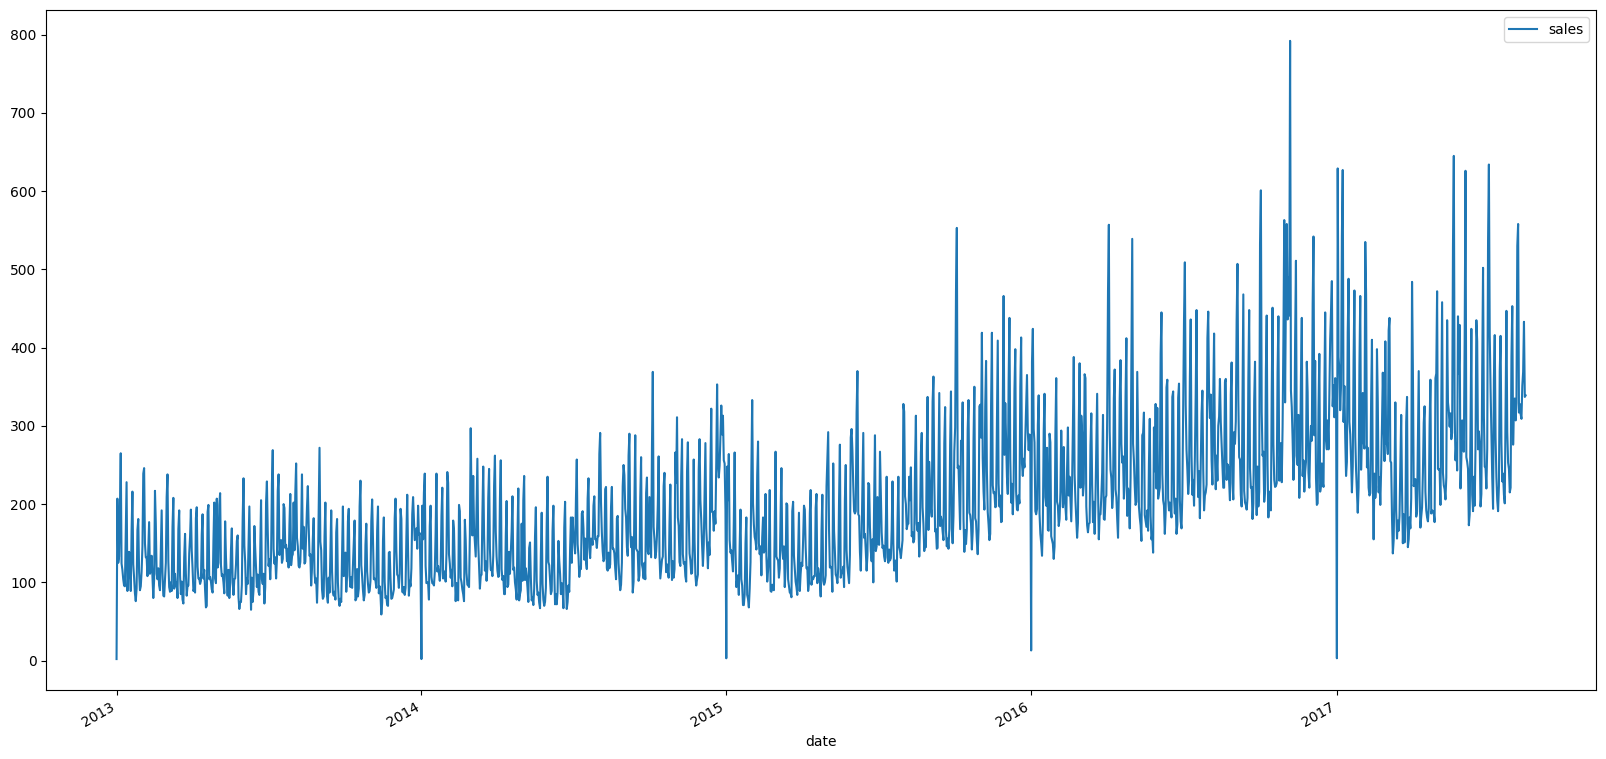

In [103]:
print(train_df[train_df['family'] == 'BEAUTY'].groupby('date').agg({
    'sales':'sum'
}).describe())
print(f"mean {train_df[train_df['family'] == 'BEAUTY'].groupby('date').agg({'sales':'sum'}).mean()}")
train_df[train_df['family'] == 'BEAUTY'].groupby('date').agg({
    'sales':'sum'
}).plot()

In [104]:
family_prod_df.head(50)

sales
date       family                                   
2013-01-01 AUTOMOTIVE                       0.000000
           BABY CARE                        0.000000
           BEAUTY                           2.000000
           BEVERAGES                      810.000000
           BOOKS                            0.000000
           BREAD/BAKERY                   180.589000
           CELEBRATION                      0.000000
           CLEANING                       186.000000
           DAIRY                          143.000000
           DELI                            71.090000
           EGGS                            46.000000
           FROZEN FOODS                    29.654999
           GROCERY I                      700.000000
           GROCERY II                      15.000000
           HARDWARE                         0.000000
           HOME AND KITCHEN I               0.000000
           HOME AND KITCHEN II              0.000000
           HOME APPLIANCES                  0.000000
           HOME CARE                        0.000000
           LADIESWEAR                       0.000000
           LAWN AND GARDEN                  2.000000
           LINGERIE                         5.000000
           LIQUOR,WINE,BEER               105.000000
           MAGAZINES                        0.000000
           MEATS                          110.801000
           PERSONAL CARE                   25.000000
           PET SUPPLIES                     0.000000
           PLAYERS AND ELECTRONICS          0.000000
           POULTRY                         42.637000
           PREPARED FOODS                  37.847000
           PRODUCE                          0.000000
           SCHOOL AND OFFICE SUPPLIES       0.000000
           SEAFOOD                          0.000000
2013-01-02 AUTOMOTIVE                     255.000000
           BABY CARE                        0.000000
           BEAUTY                         207.000000
           BEVERAGES                    72092.000000
           BOOKS                            0.000000
           BREAD/BAKERY                 26246.319000
           CELEBRATION                      0.000000
           CLEANING                     74629.000000
           DAIRY                        23381.000000
           DELI                         15754.500000
           EGGS                         10932.000000
           FROZEN FOODS                  7115.388000
           GROCERY I                   202020.000000
           GROCERY II                    1476.000000
           HARDWARE                        46.000000
           HOME AND KITCHEN I               0.000000
           HOME AND KITCHEN II              0.000000

In [105]:
prod_families = train_df.family.unique()

analysis for family AUTOMOTIVE
             sales
count  1684.000000
mean    329.466746
std     108.627015
min       0.000000
25%     252.000000
50%     310.000000
75%     388.000000
max     759.000000
mean sales    329.466746
dtype: float64


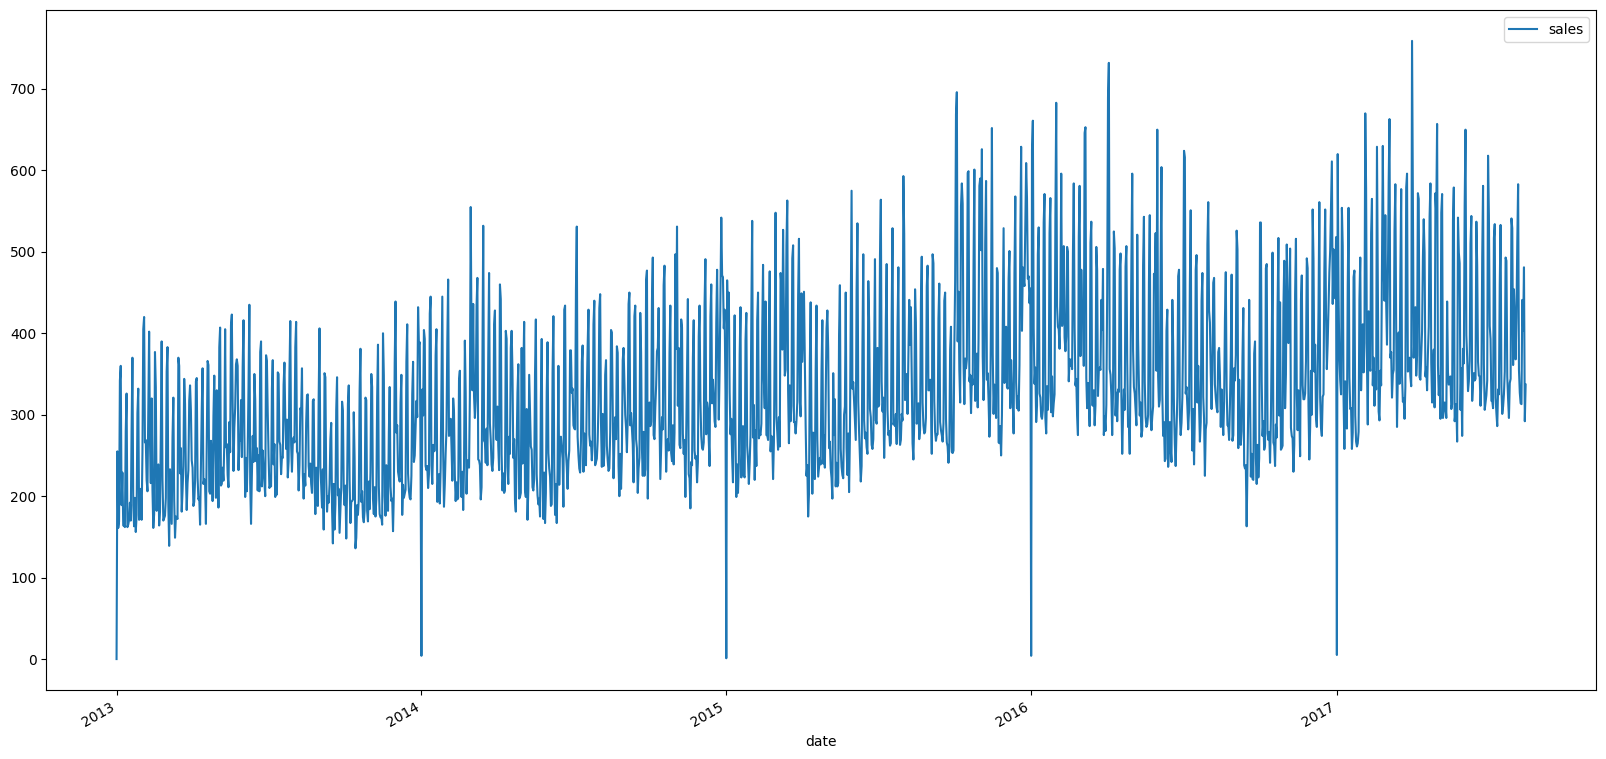

analysis for family BABY CARE
             sales
count  1684.000000
mean      5.968527
std       7.947142
min       0.000000
25%       0.000000
50%       2.000000
75%      11.000000
max     125.000000
mean sales    5.968527
dtype: float64


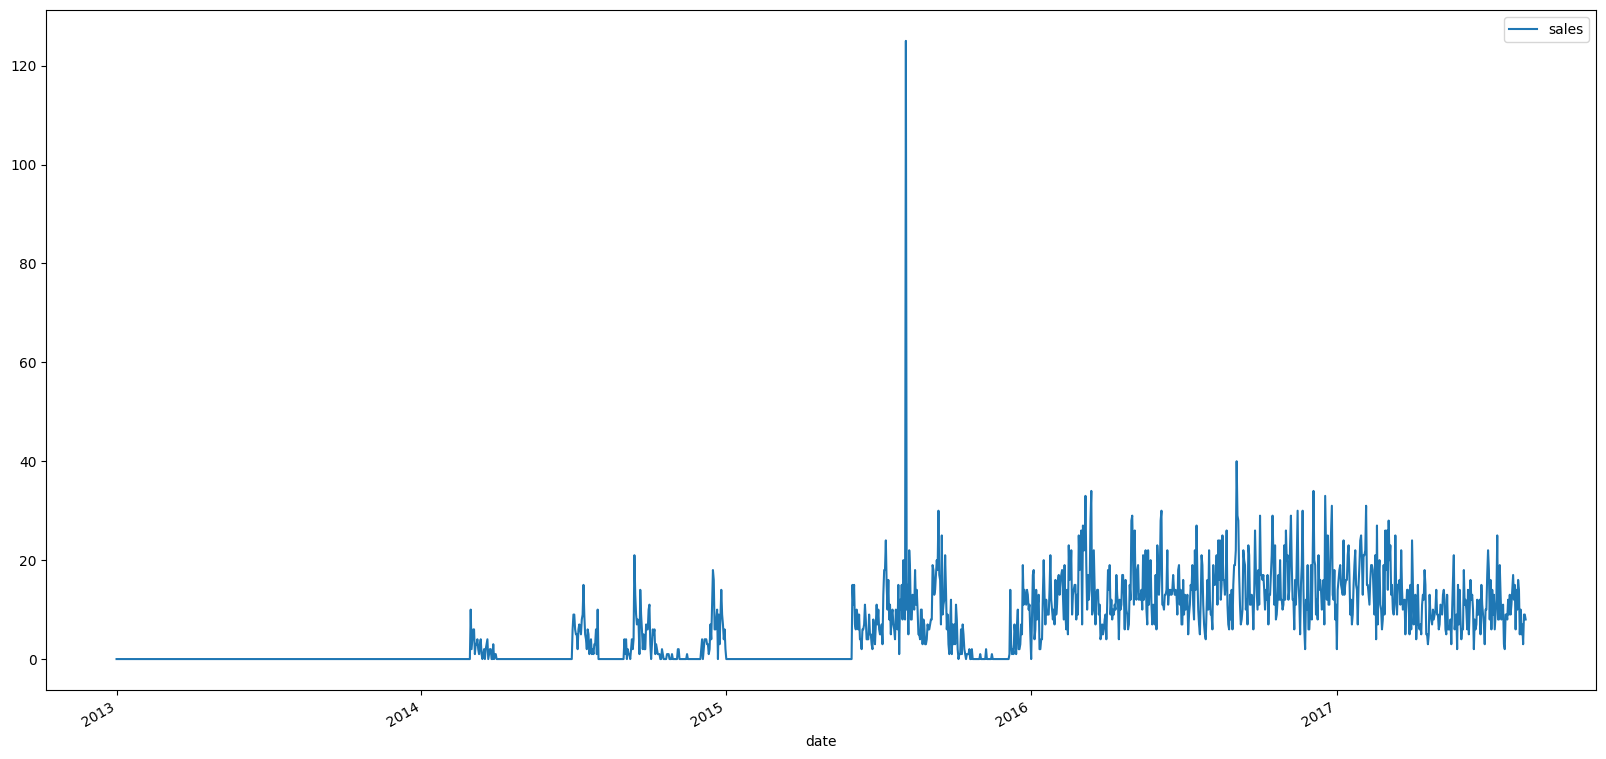

analysis for family BEAUTY
             sales
count  1684.000000
mean    200.649050
std     100.410387
min       2.000000
25%     122.750000
50%     183.000000
75%     248.000000
max     792.000000
mean sales    200.64905
dtype: float64


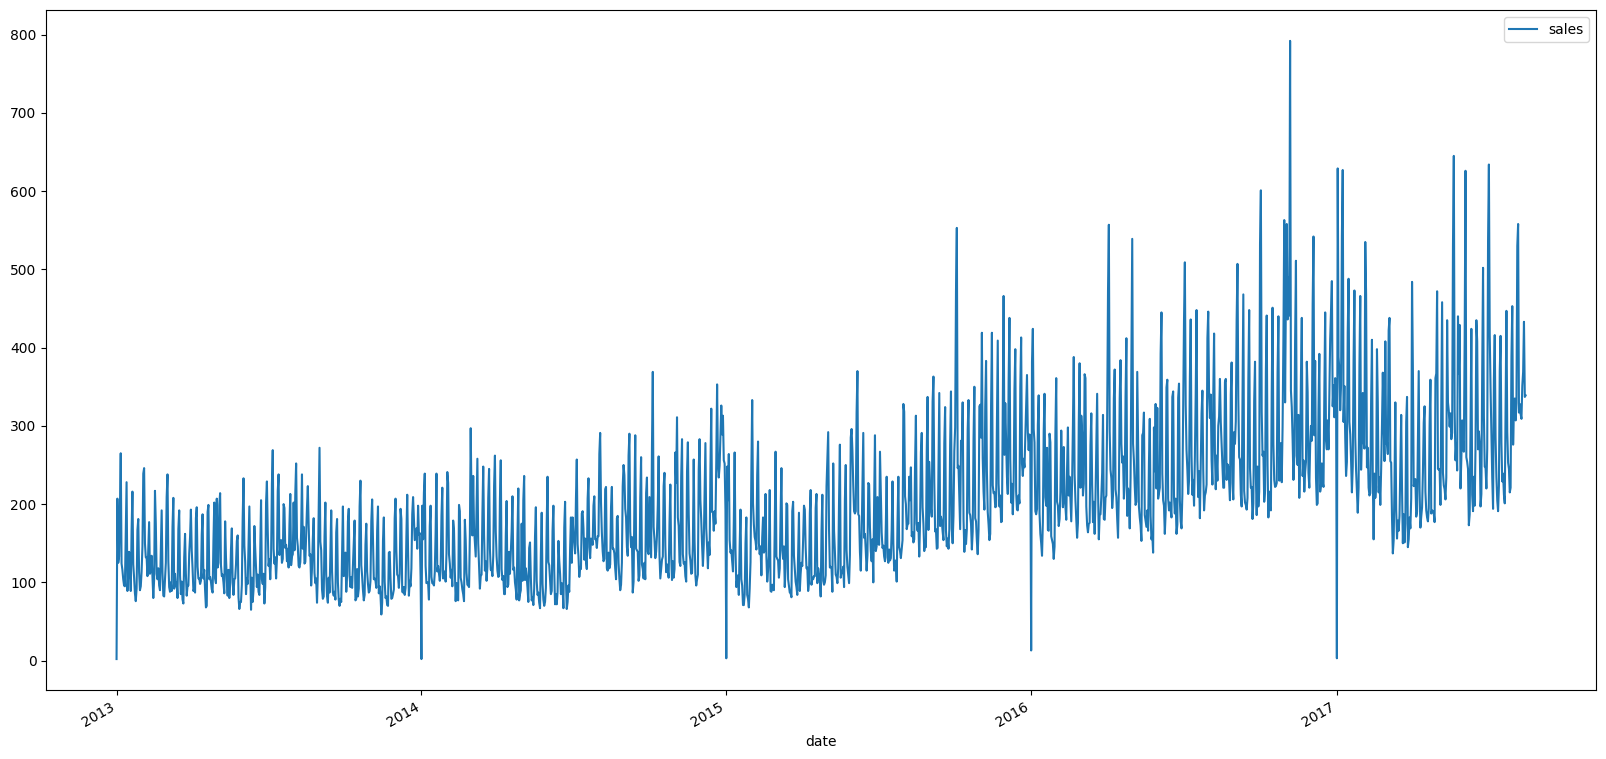

analysis for family BEVERAGES
               sales
count    1684.000000
mean   128832.830166
std     63121.645563
min       810.000000
25%     69815.750000
50%    128207.500000
75%    170349.500000
max    339352.000000
mean sales    128832.830166
dtype: float64


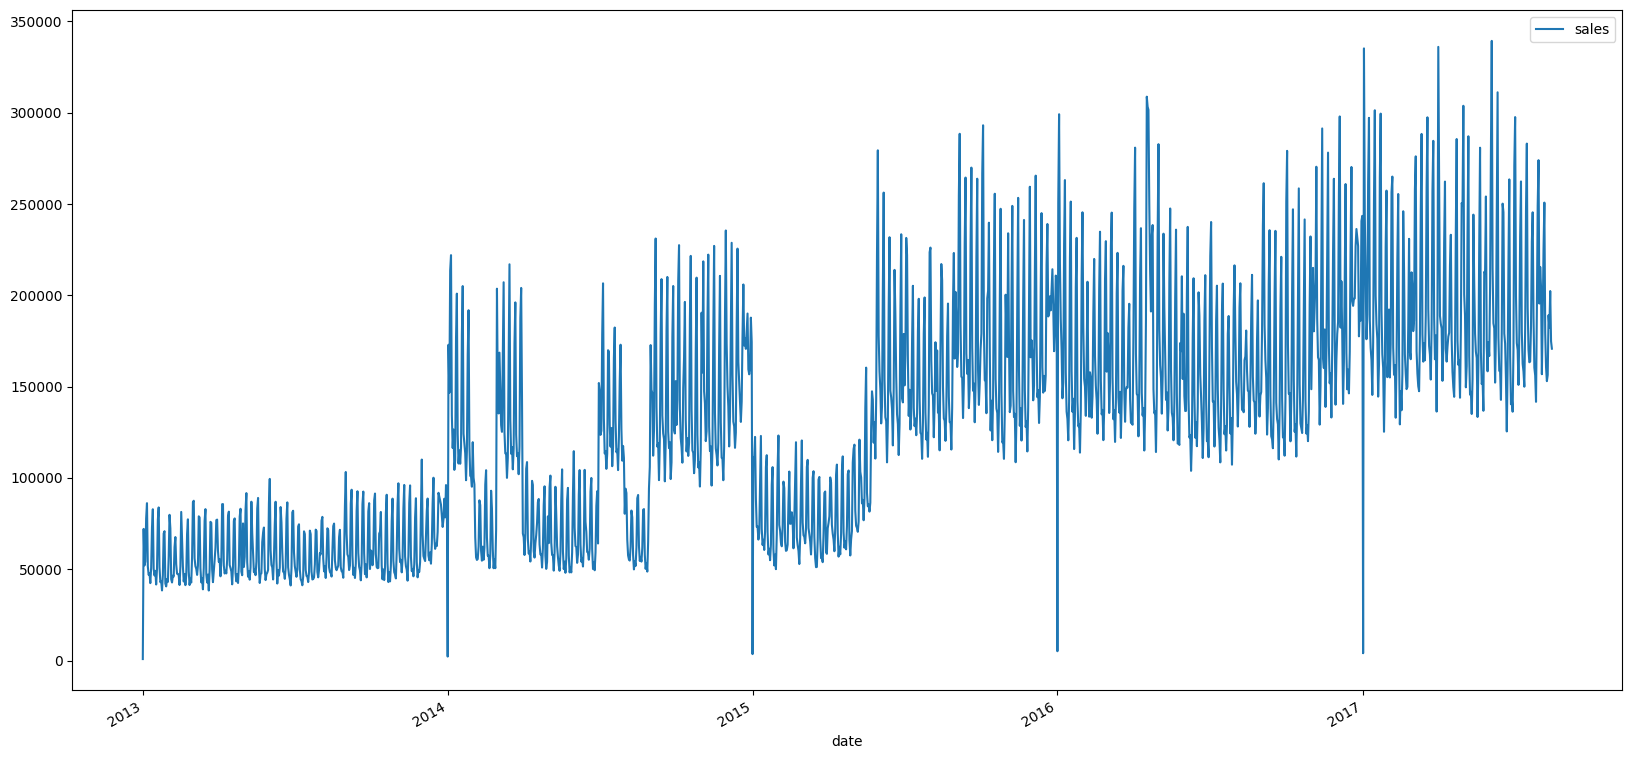

analysis for family BOOKS
             sales
count  1684.000000
mean      3.823040
std      12.968935
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max     127.000000
mean sales    3.82304
dtype: float64


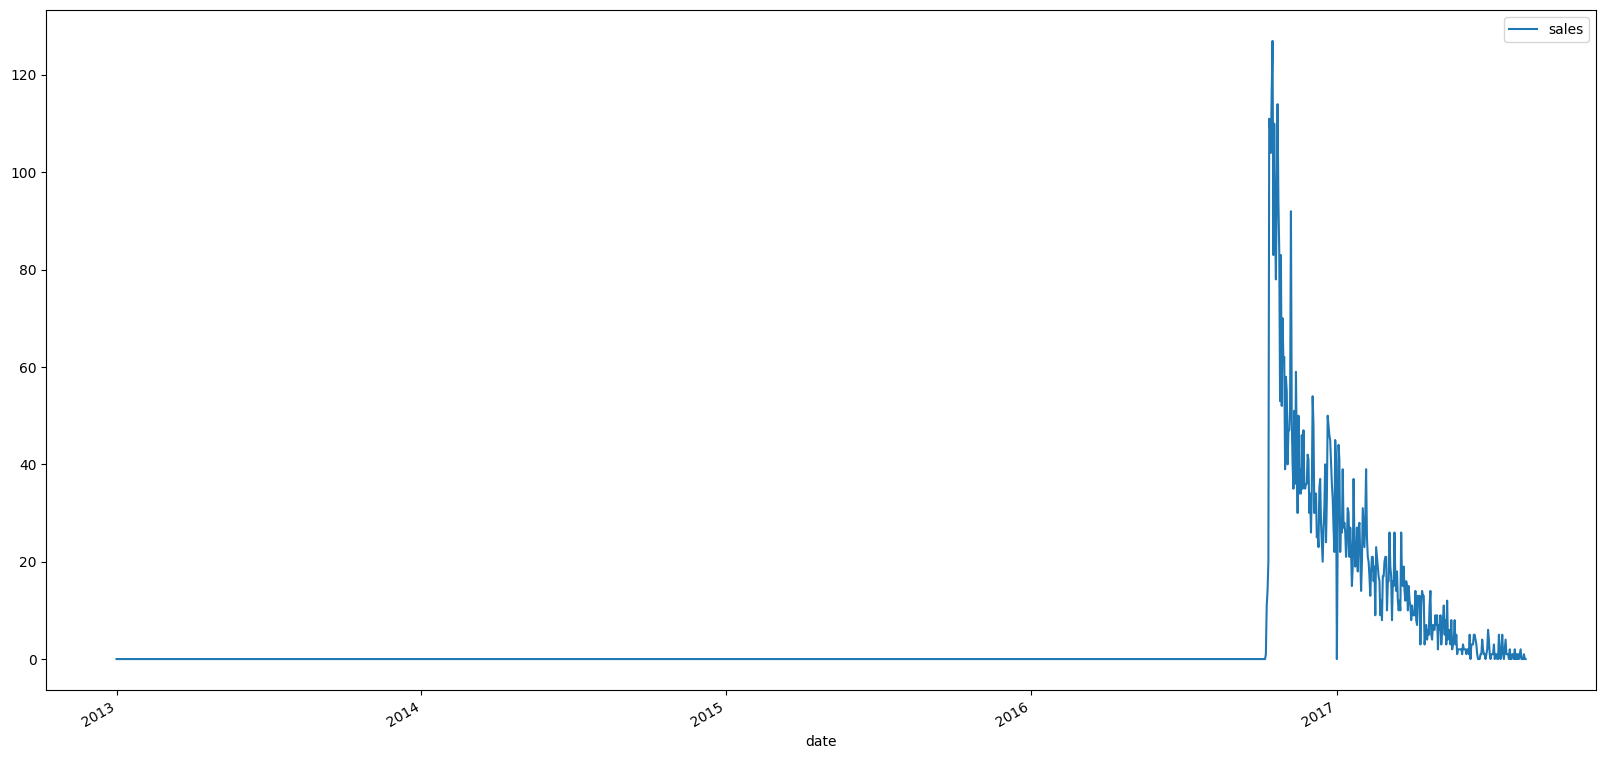

analysis for family BREAD/BAKERY
              sales
count   1684.000000
mean   25020.157706
std     6511.795916
min      180.589000
25%    20579.002738
50%    24415.176025
75%    28394.706500
max    46445.716980
mean sales    25020.157706
dtype: float64


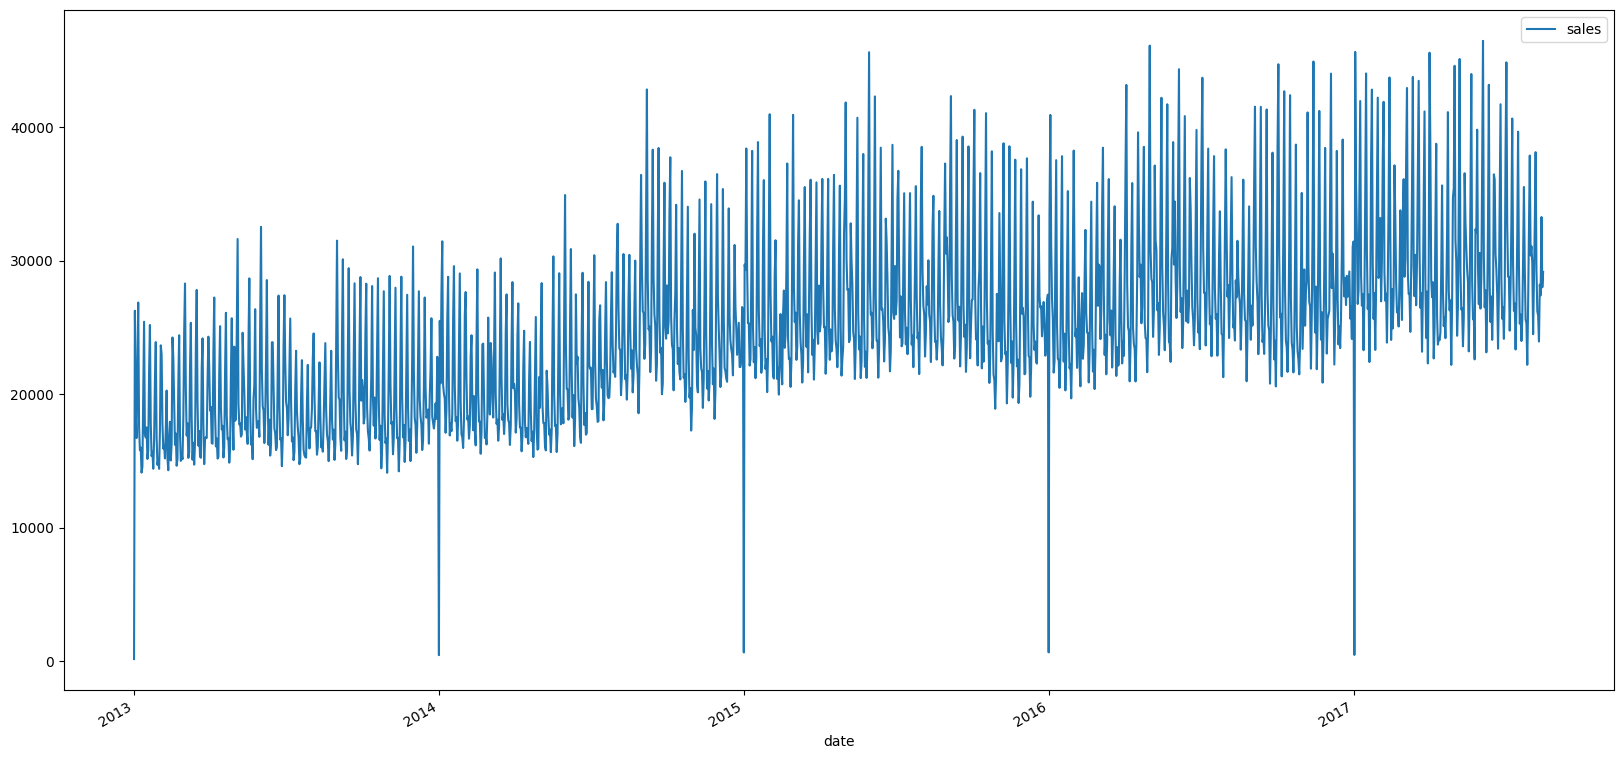

analysis for family CELEBRATION
             sales
count  1684.000000
mean    452.005344
std     408.812745
min       0.000000
25%       0.000000
50%     549.500000
75%     725.000000
max    2436.000000
mean sales    452.005344
dtype: float64


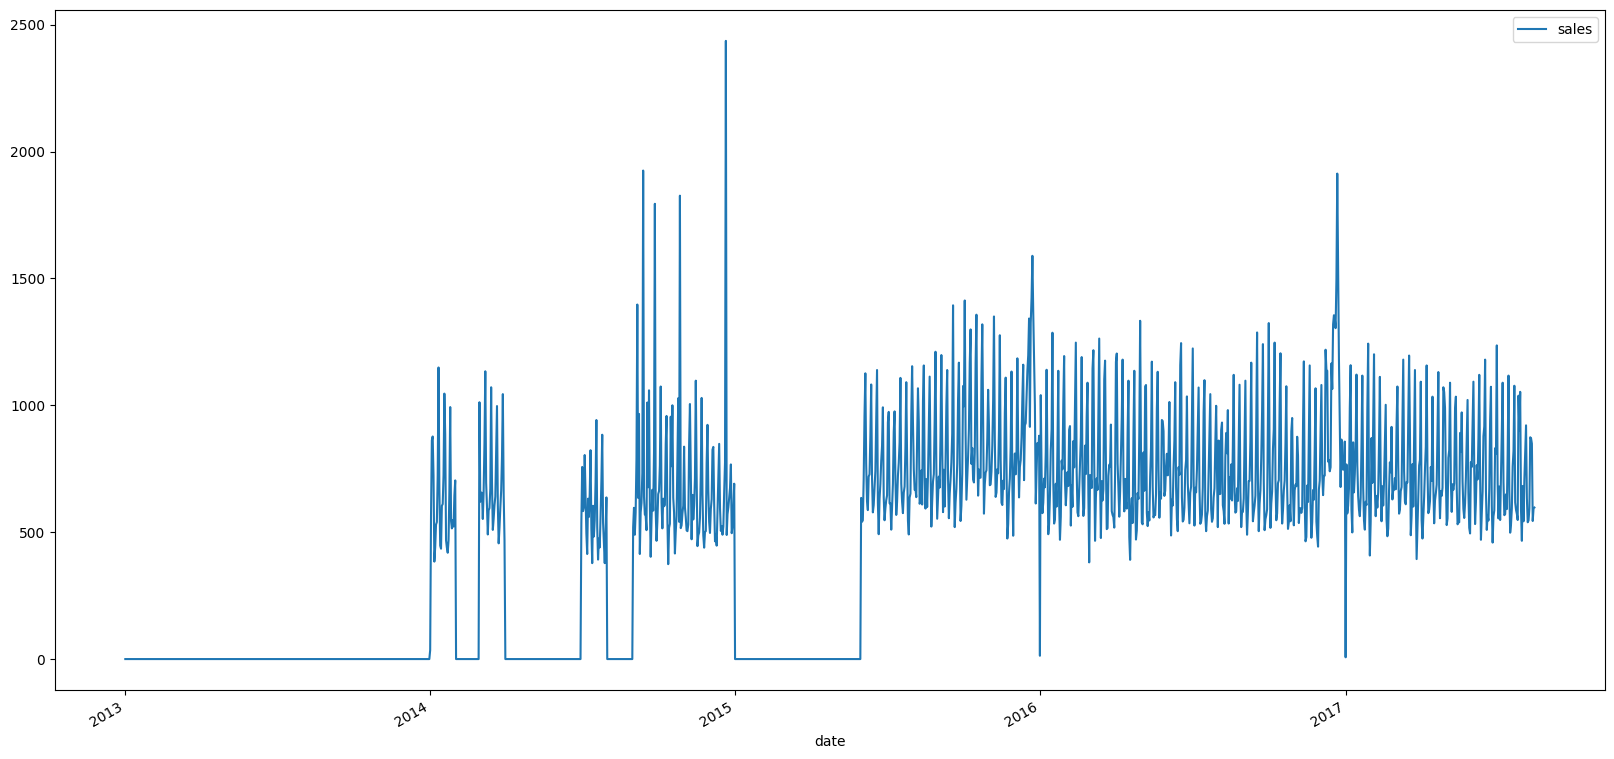

analysis for family CLEANING
               sales
count    1684.000000
mean    57910.504157
std     15211.880756
min       186.000000
25%     46786.250000
50%     55234.500000
75%     67640.500000
max    120902.000000
mean sales    57910.504157
dtype: float64


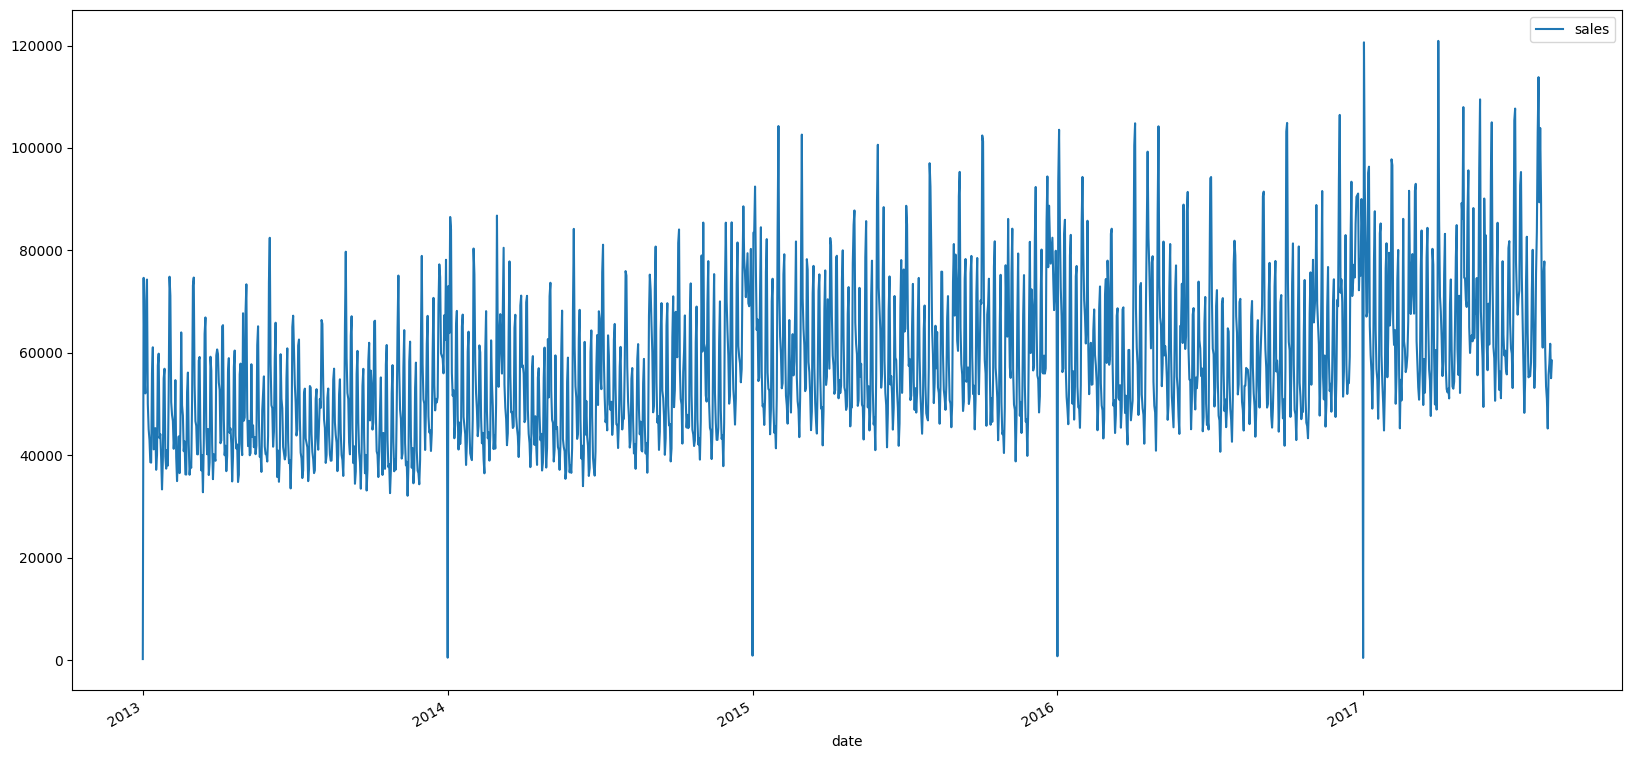

analysis for family DAIRY
              sales
count   1684.000000
mean   38294.364014
std    13725.805476
min      143.000000
25%    30014.750000
50%    37896.000000
75%    46652.750000
max    85897.000000
mean sales    38294.364014
dtype: float64


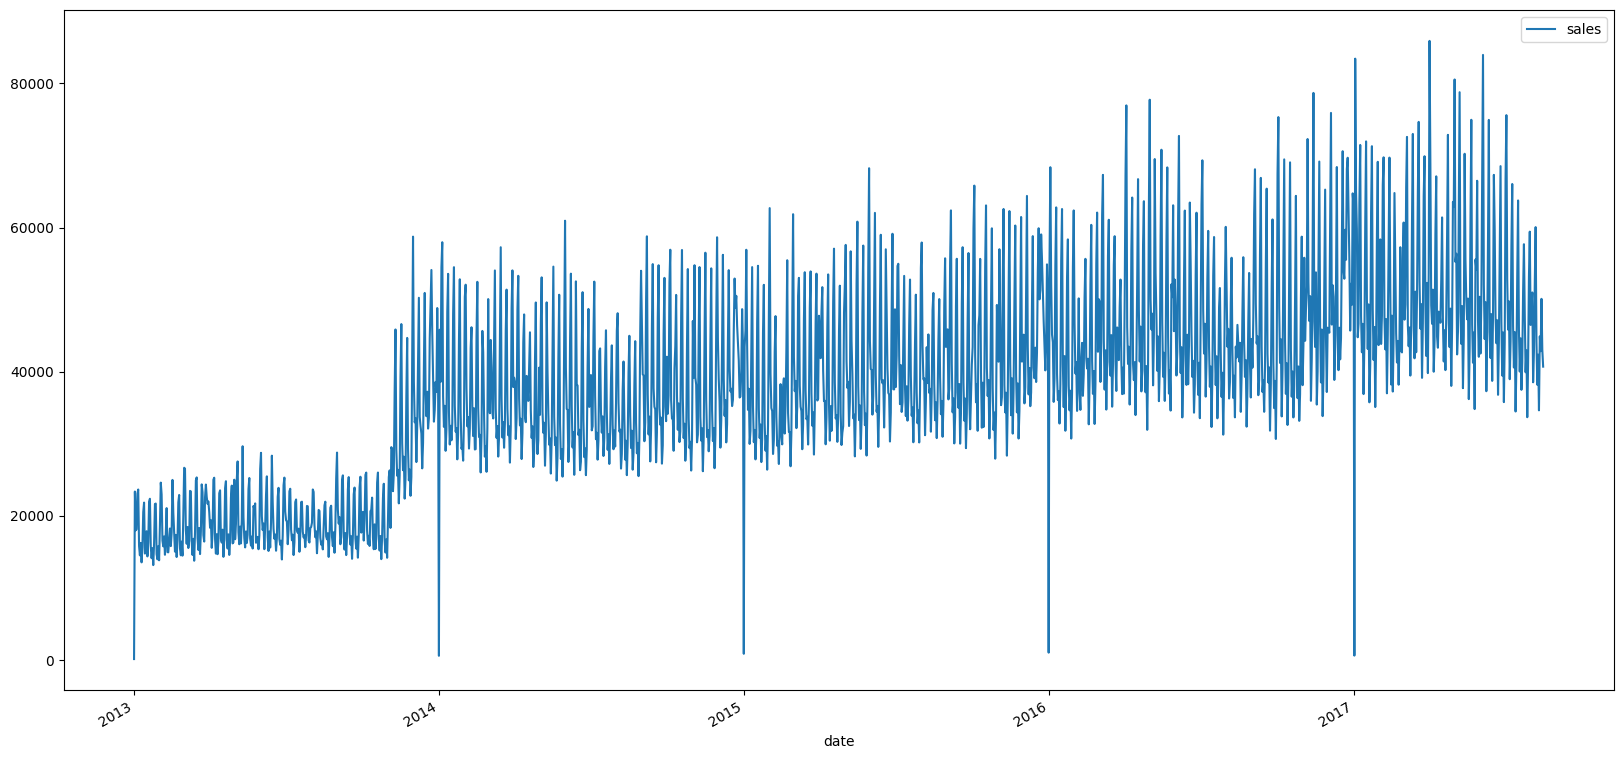

analysis for family DELI
              sales
count   1684.000000
mean   14317.293628
std     4171.725802
min       71.090000
25%    11216.932000
50%    13875.057000
75%    16747.036243
max    29189.300000
mean sales    14317.293628
dtype: float64


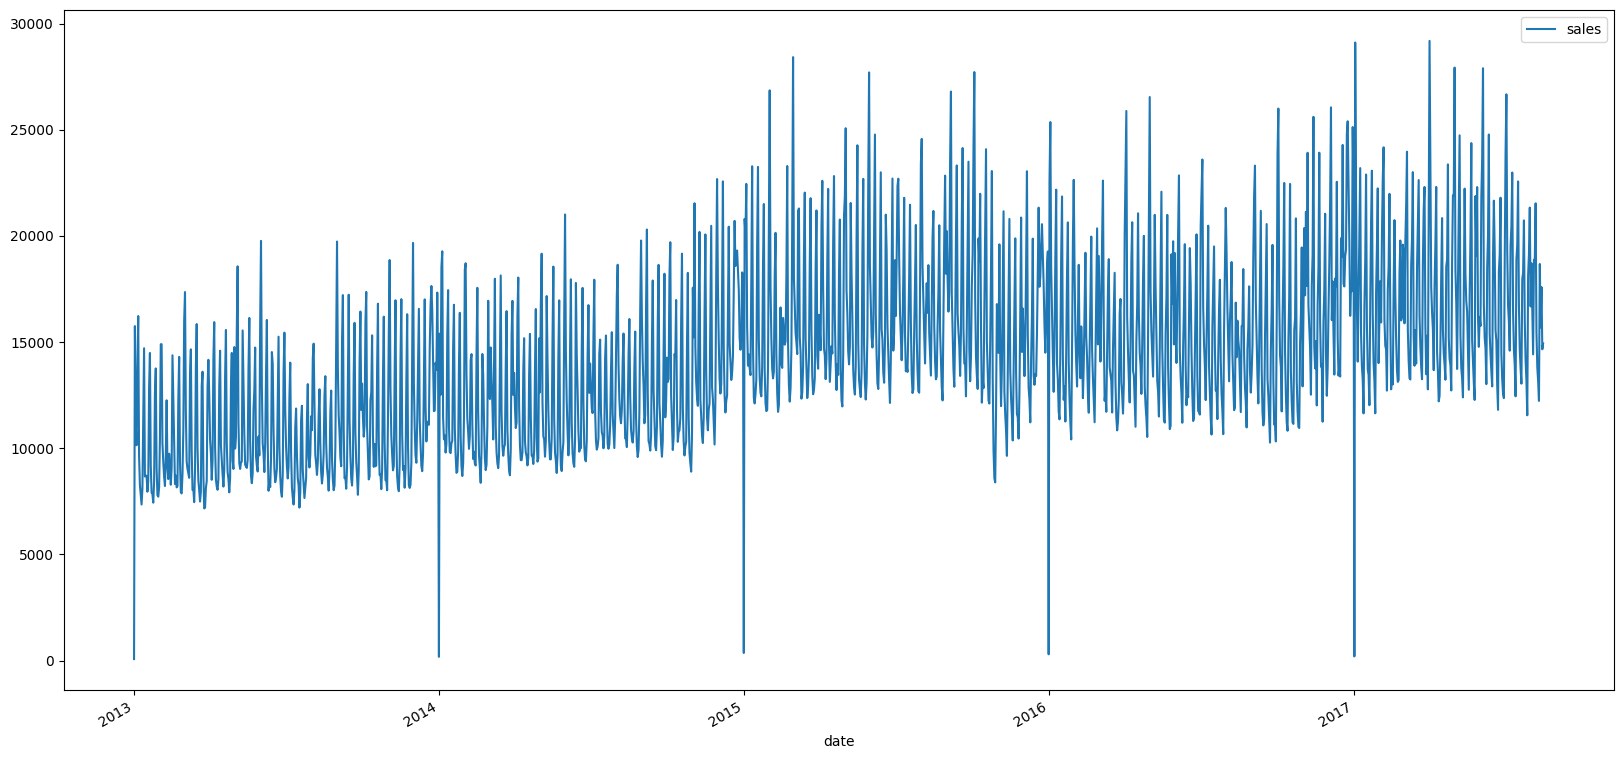

analysis for family EGGS
              sales
count   1684.000000
mean    9256.707838
std     2554.068512
min       46.000000
25%     7535.000000
50%     8871.000000
75%    10718.000000
max    22878.000000
mean sales    9256.707838
dtype: float64


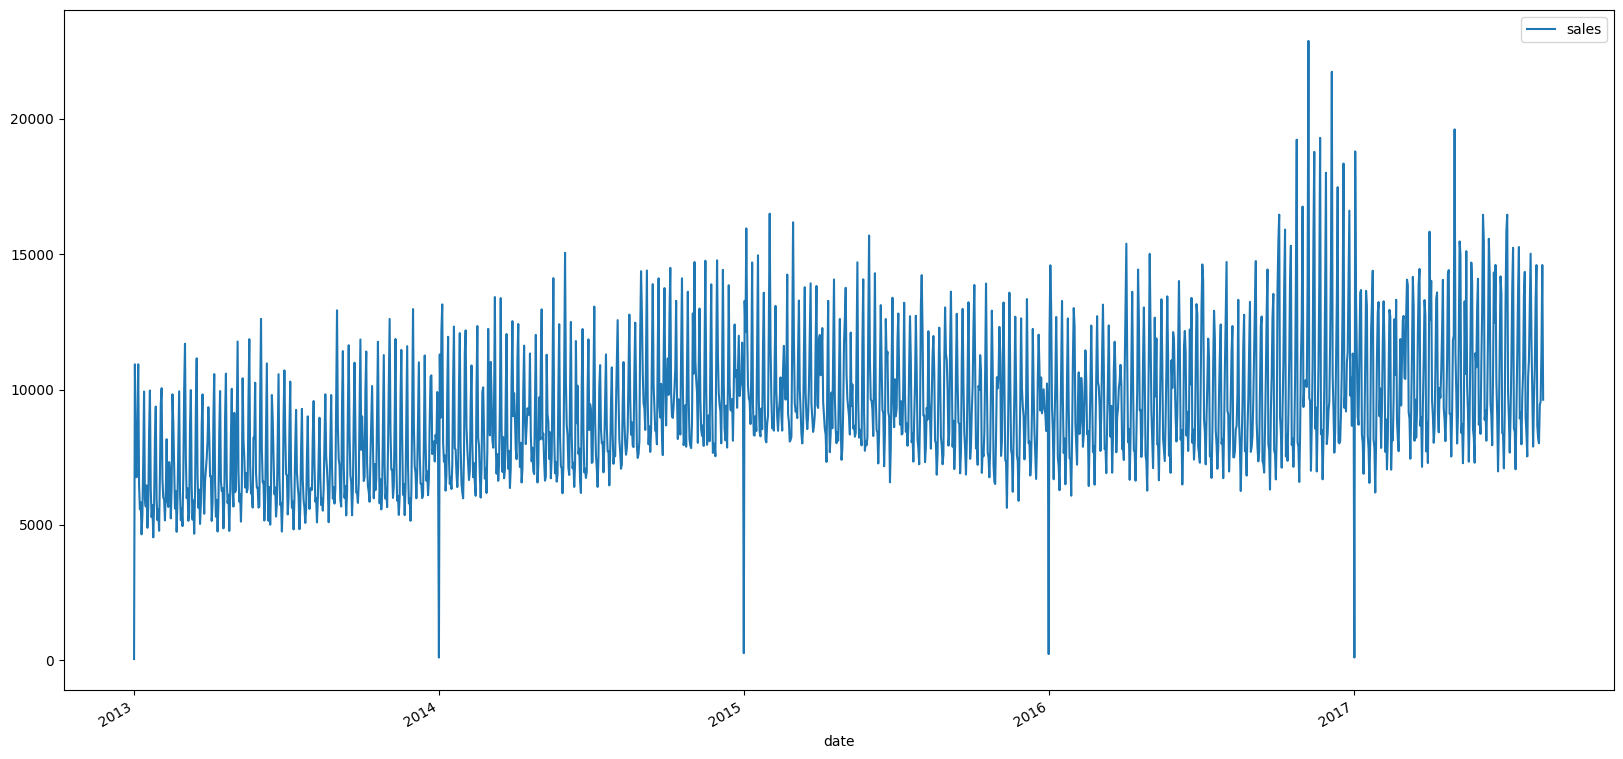

analysis for family FROZEN FOODS
               sales
count    1684.000000
mean     8357.415511
std     10318.131263
min        29.654999
25%      5027.727016
50%      5998.138995
75%      8125.963990
max    122042.915620
mean sales    8357.415511
dtype: float64


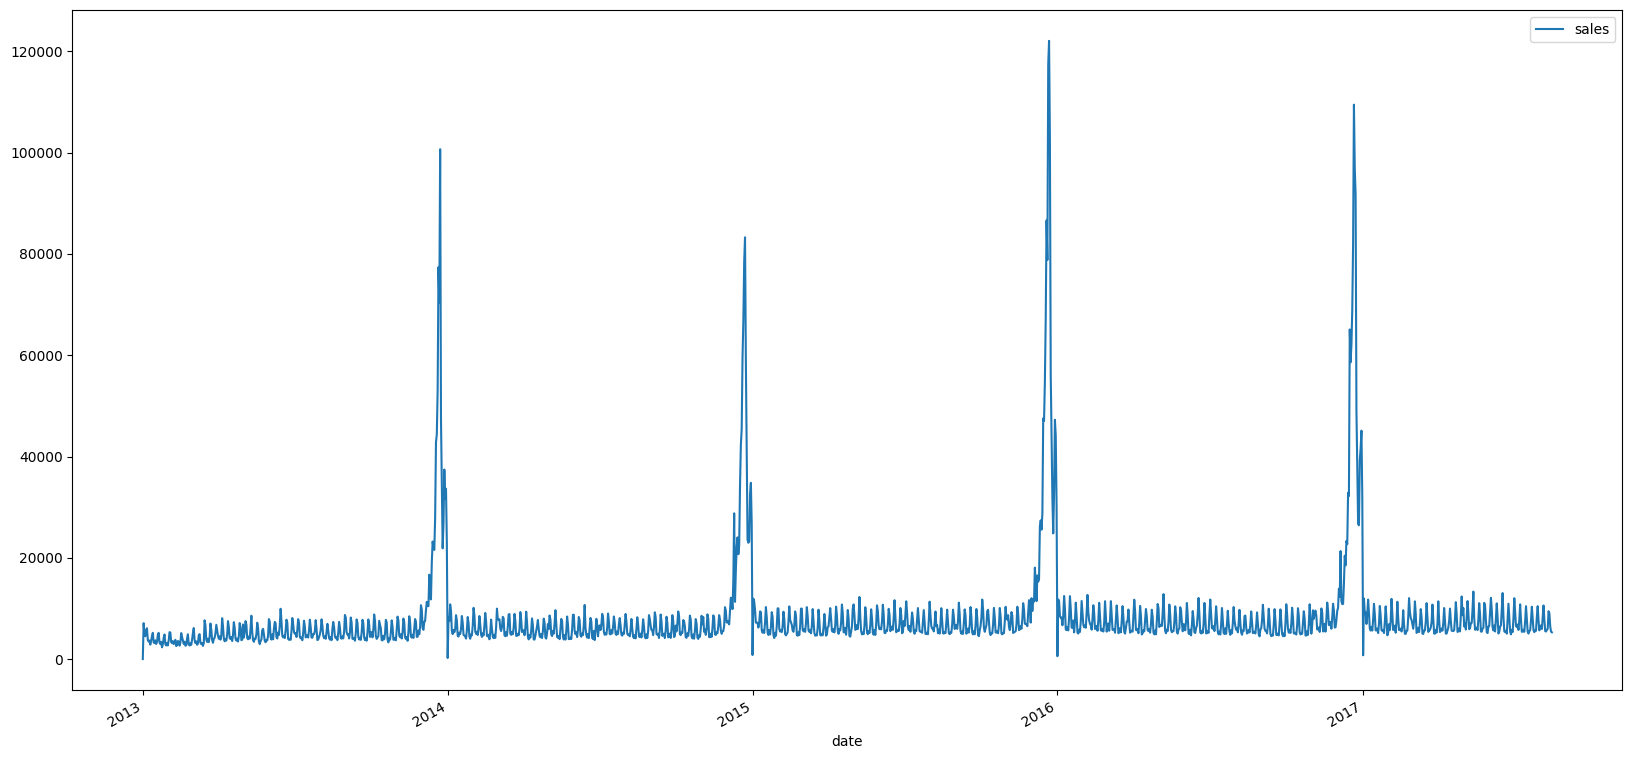

analysis for family GROCERY I
               sales
count    1684.000000
mean   203956.493400
std     61832.884741
min       700.000000
25%    157759.750000
50%    194681.310000
75%    239845.256250
max    583222.480000
mean sales    203956.4934
dtype: float64


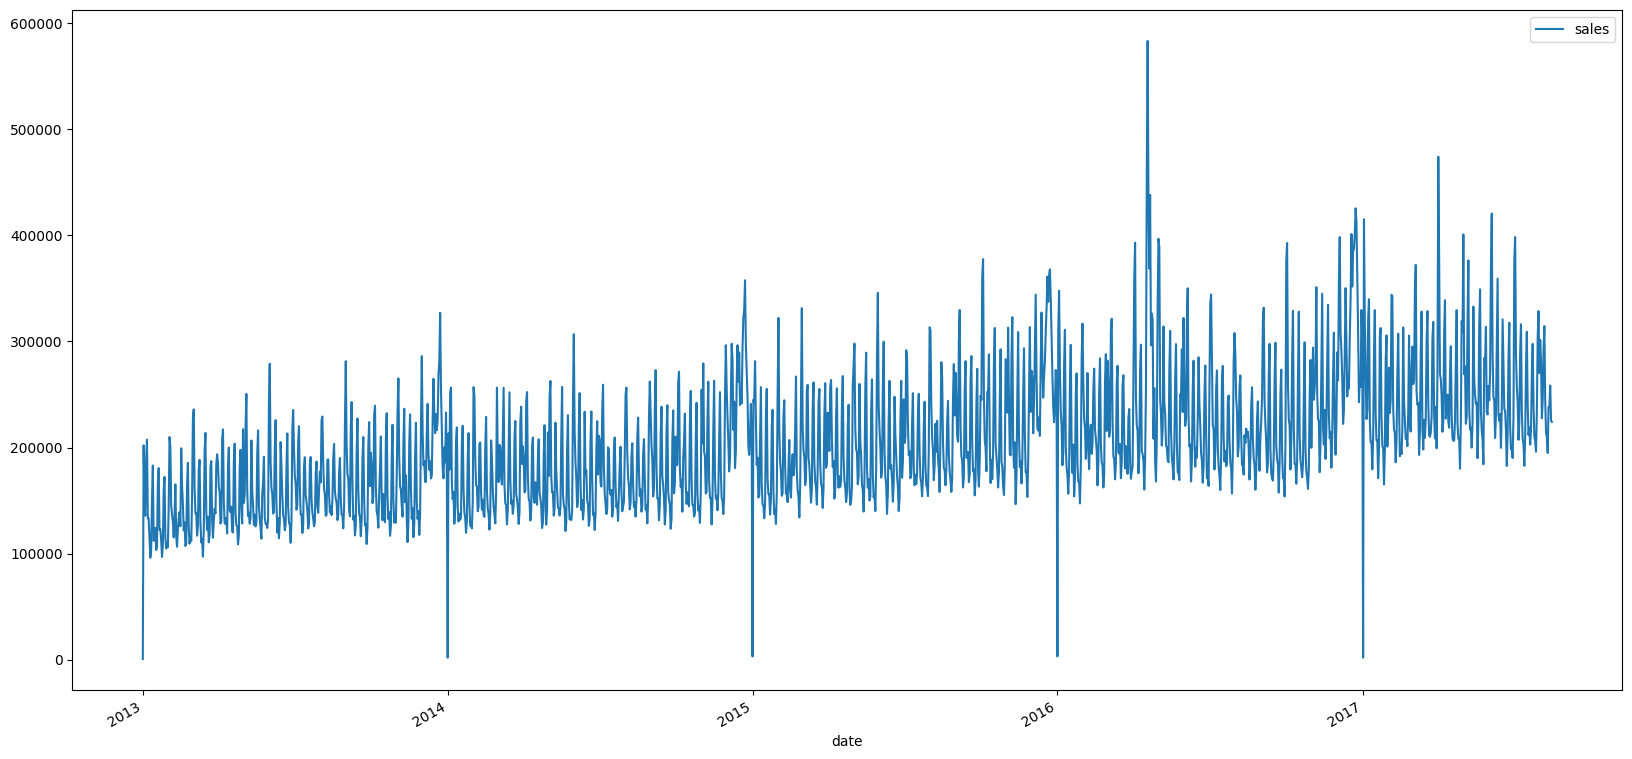

analysis for family GROCERY II
             sales
count  1684.000000
mean   1165.538599
std     426.209939
min       5.000000
25%     925.750000
50%    1072.000000
75%    1299.250000
max    4488.000000
mean sales    1165.538599
dtype: float64


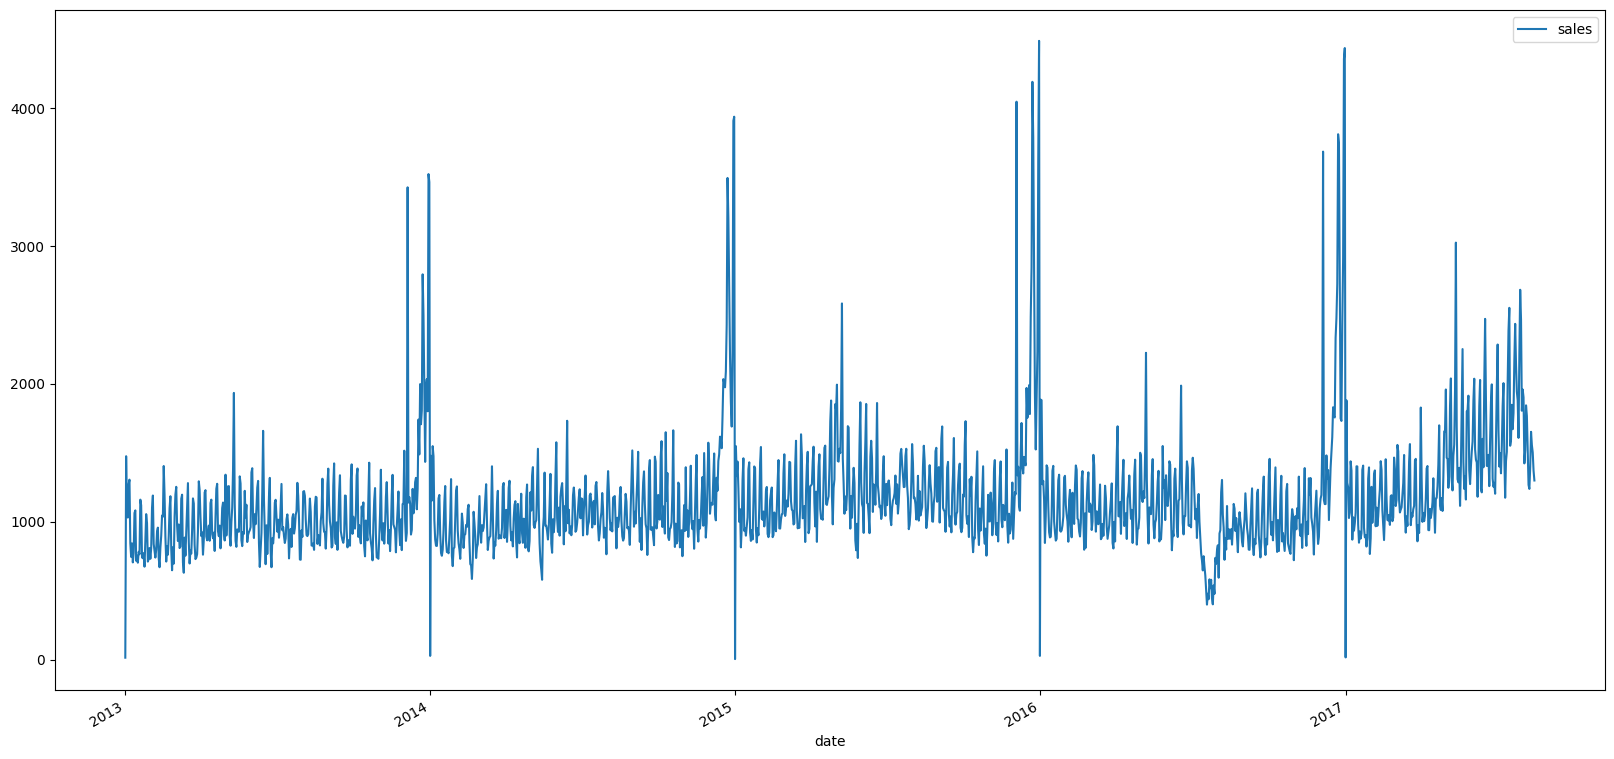

analysis for family HARDWARE
             sales
count  1684.000000
mean     61.442993
std      20.085461
min       0.000000
25%      47.000000
50%      60.000000
75%      73.000000
max     149.000000
mean sales    61.442993
dtype: float64


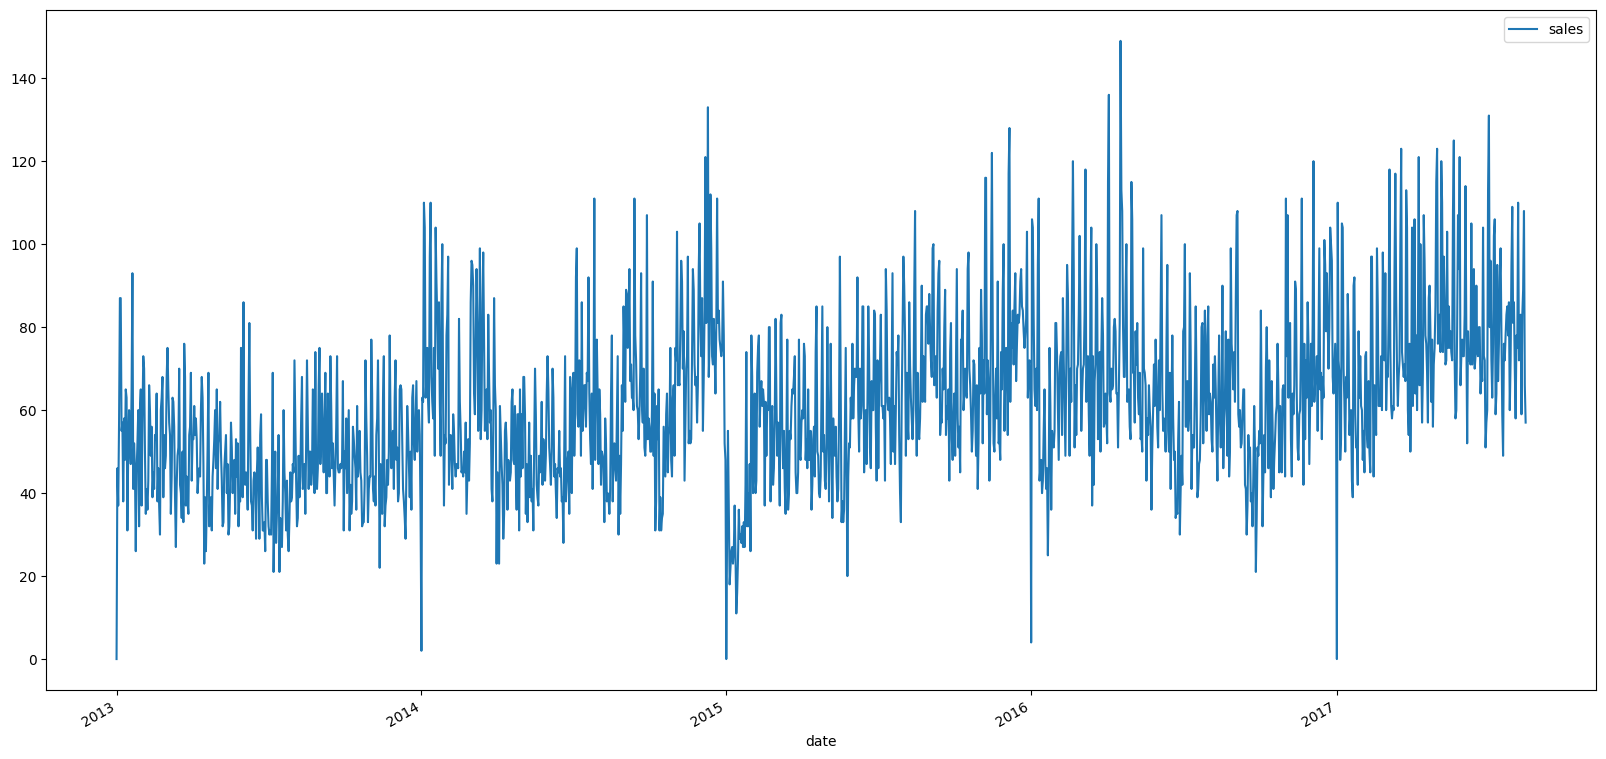

analysis for family HOME AND KITCHEN I
             sales
count  1684.000000
mean   1105.398456
std     878.358350
min       0.000000
25%       0.000000
50%    1258.000000
75%    1630.000000
max    5485.000000
mean sales    1105.398456
dtype: float64


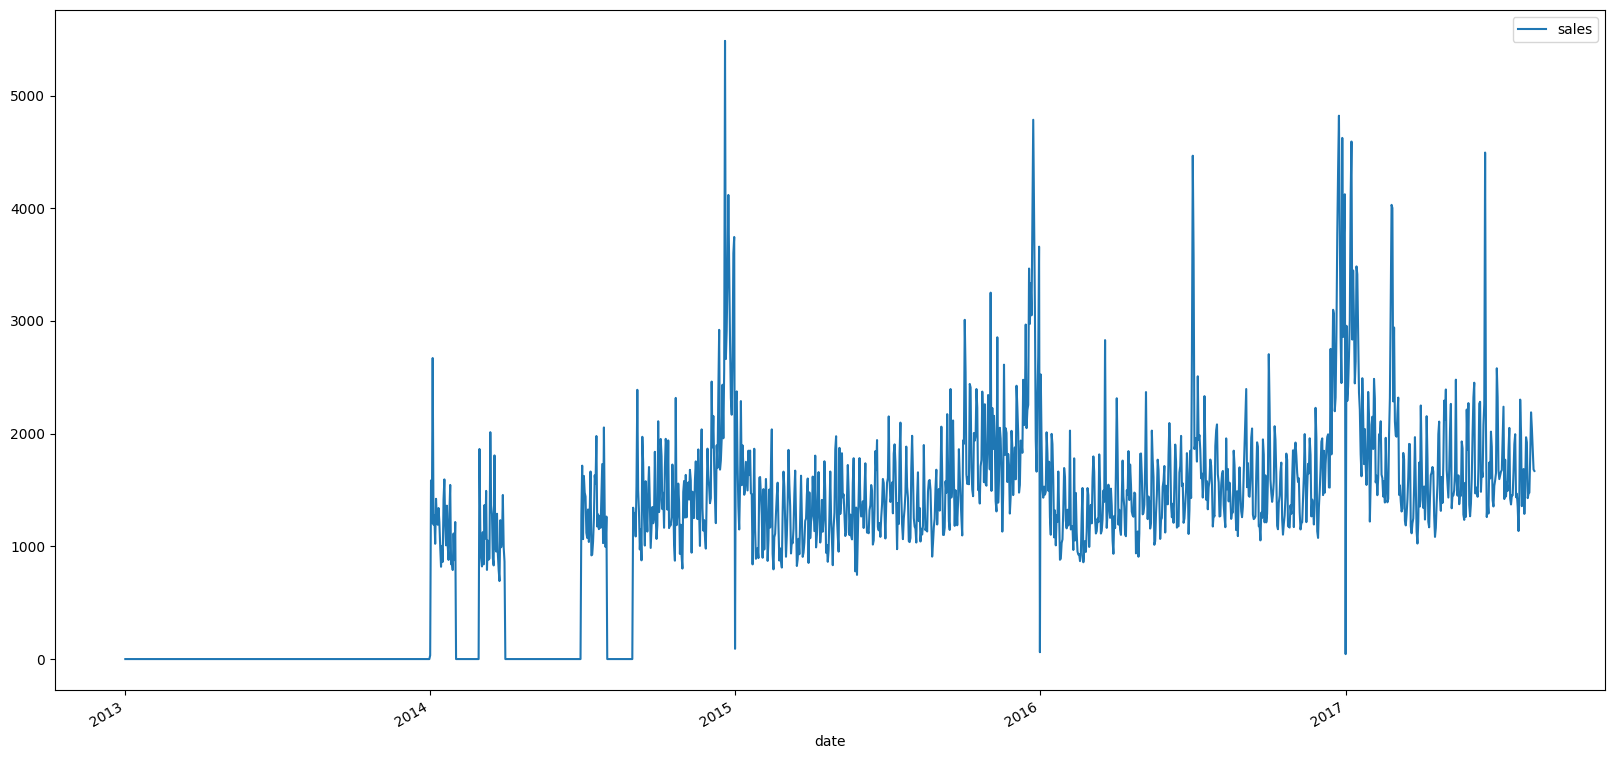

analysis for family HOME AND KITCHEN II
             sales
count  1684.000000
mean    903.010689
std     788.764847
min       0.000000
25%       0.000000
50%     947.500000
75%    1408.250000
max    6020.000000
mean sales    903.010689
dtype: float64


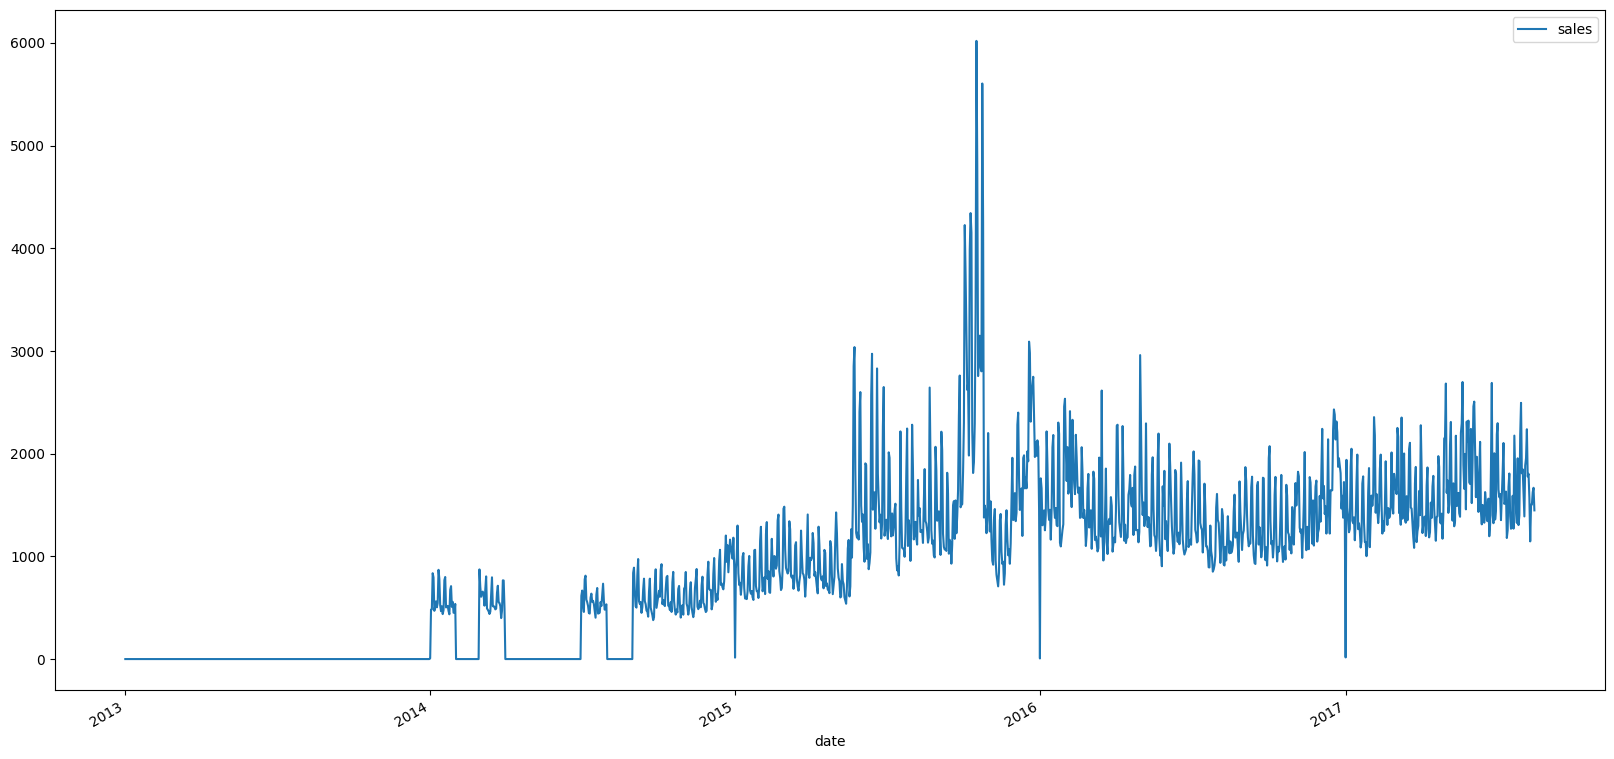

analysis for family HOME APPLIANCES
             sales
count  1684.000000
mean     24.703682
std      13.932038
min       0.000000
25%      14.000000
50%      25.000000
75%      33.000000
max      76.000000
mean sales    24.703682
dtype: float64


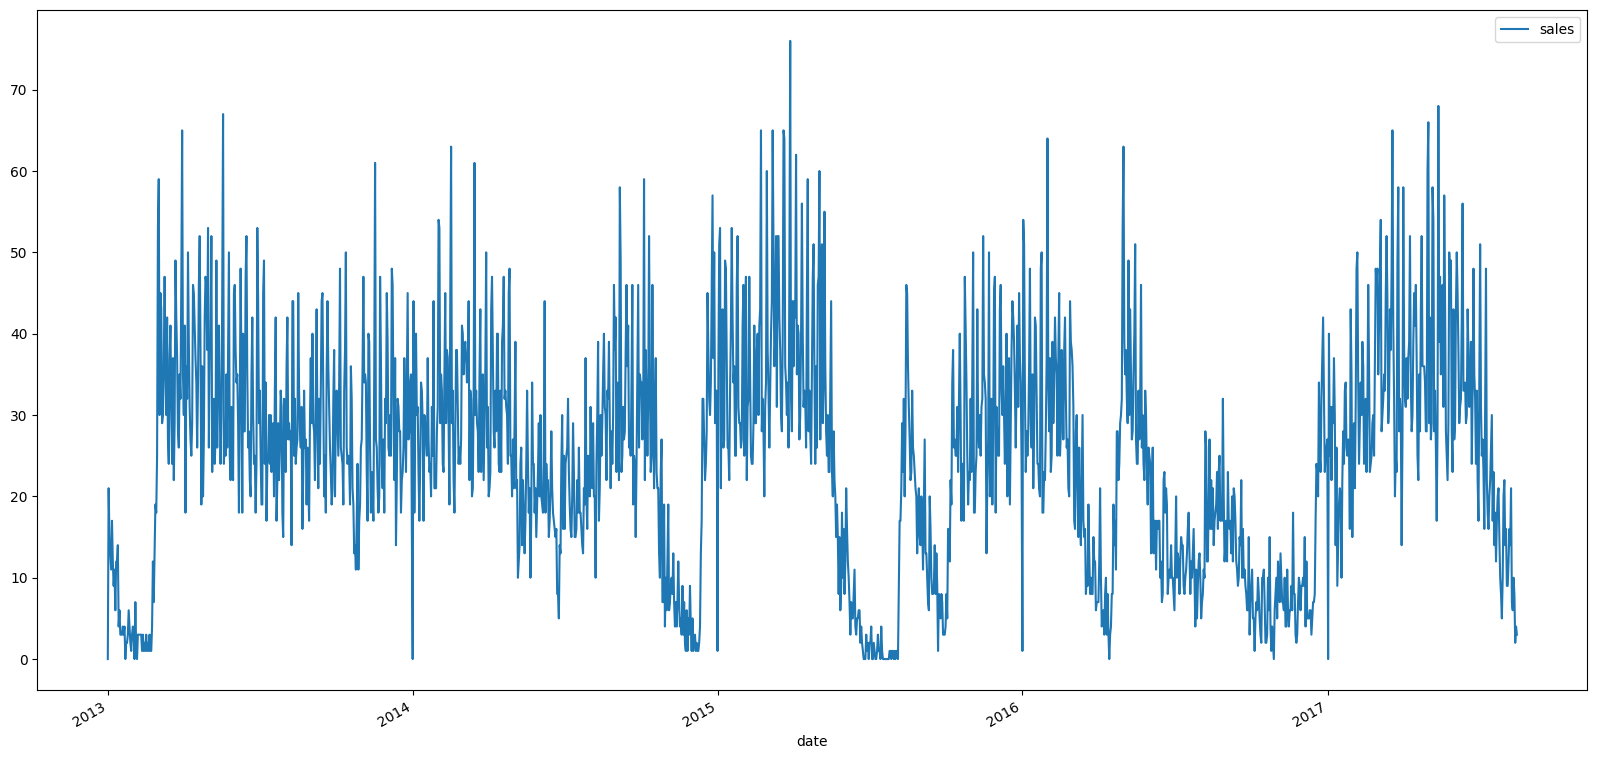

analysis for family HOME CARE
              sales
count   1684.000000
mean    9514.693587
std     8182.376277
min        0.000000
25%        0.000000
50%    11567.500000
75%    15487.750000
max    37252.000000
mean sales    9514.693587
dtype: float64


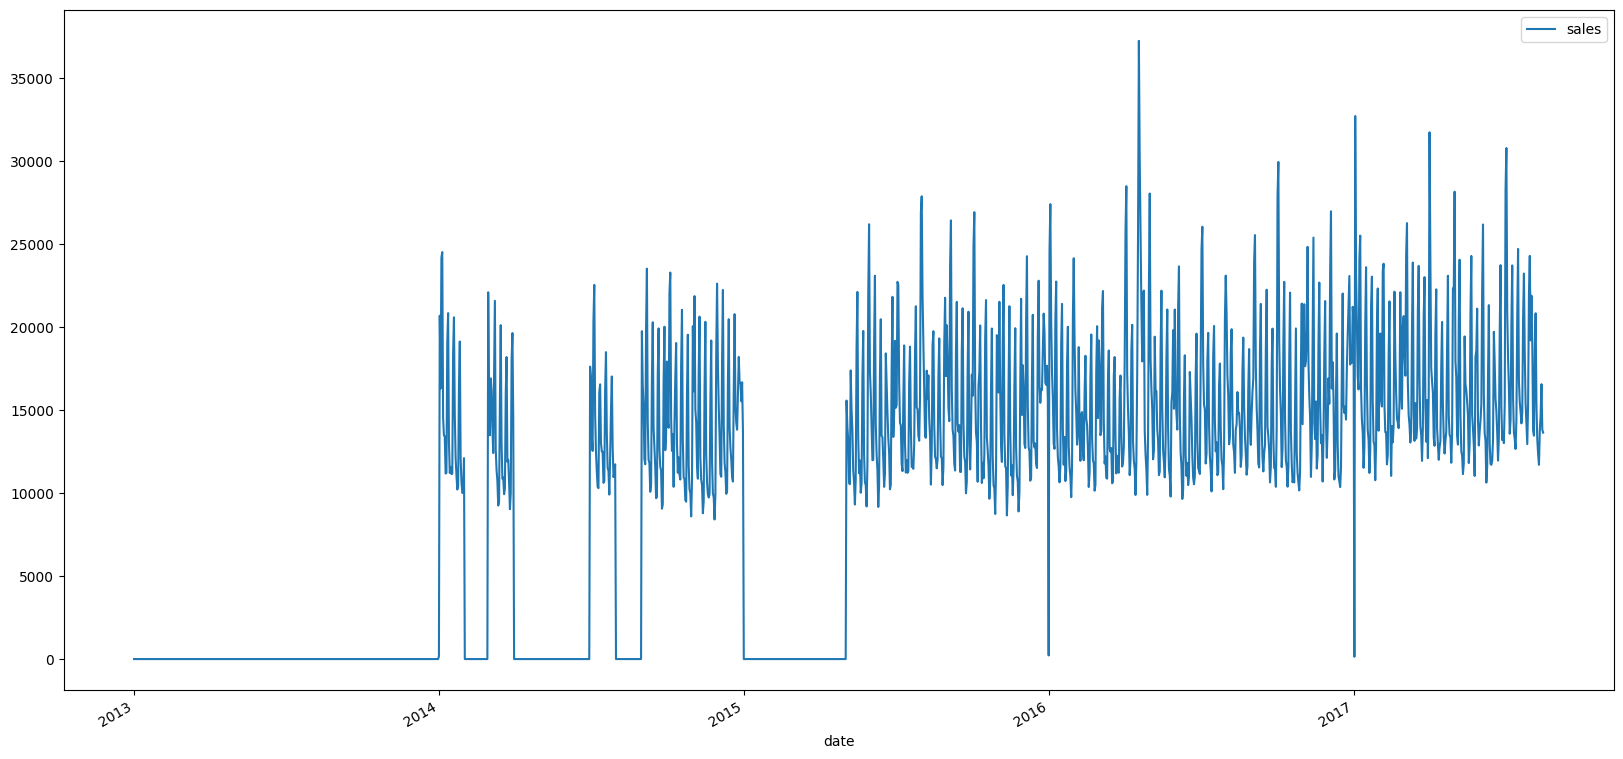

analysis for family LADIESWEAR
             sales
count  1684.000000
mean    386.673990
std     380.890911
min       0.000000
25%       0.000000
50%     428.000000
75%     555.000000
max    1553.000000
mean sales    386.67399
dtype: float64


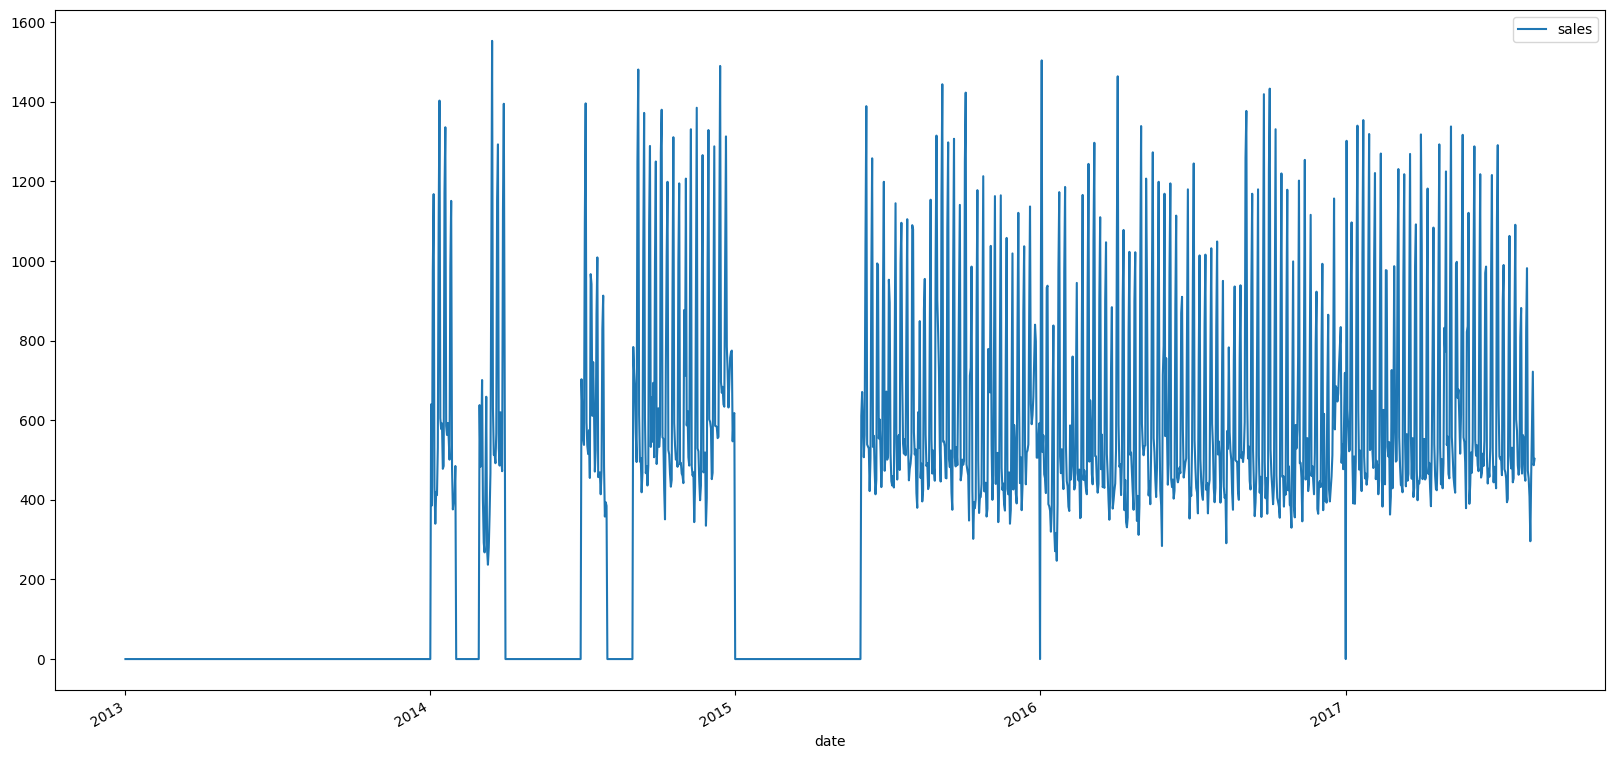

analysis for family LAWN AND GARDEN
             sales
count  1684.000000
mean    325.915677
std     340.509496
min       2.000000
25%     165.000000
50%     235.000000
75%     332.000000
max    6963.000000
mean sales    325.915677
dtype: float64


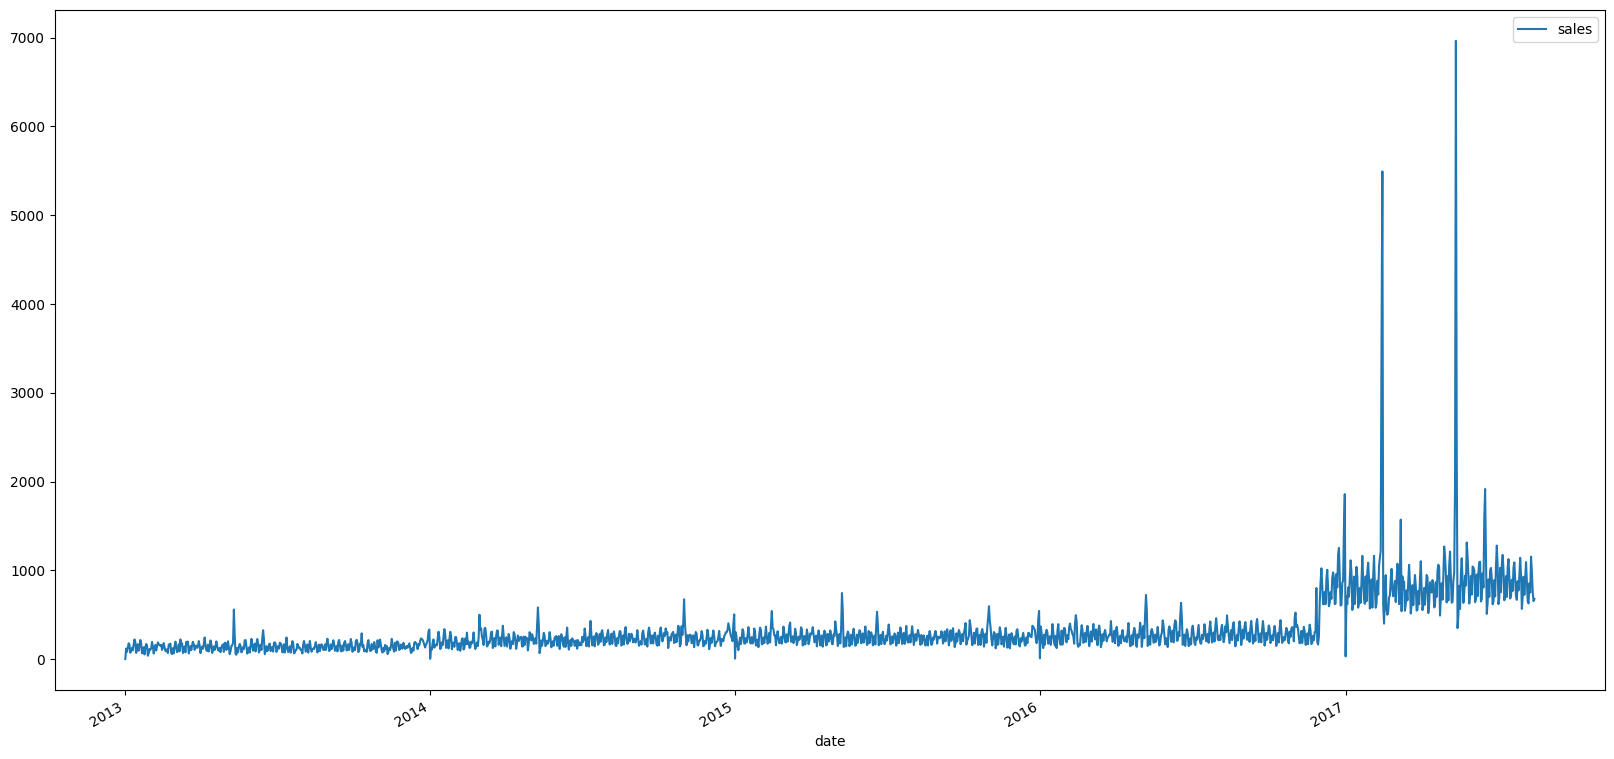

analysis for family LINGERIE
             sales
count  1684.000000
mean    387.834917
std     116.183456
min       3.000000
25%     312.000000
50%     370.000000
75%     445.000000
max    1313.000000
mean sales    387.834917
dtype: float64


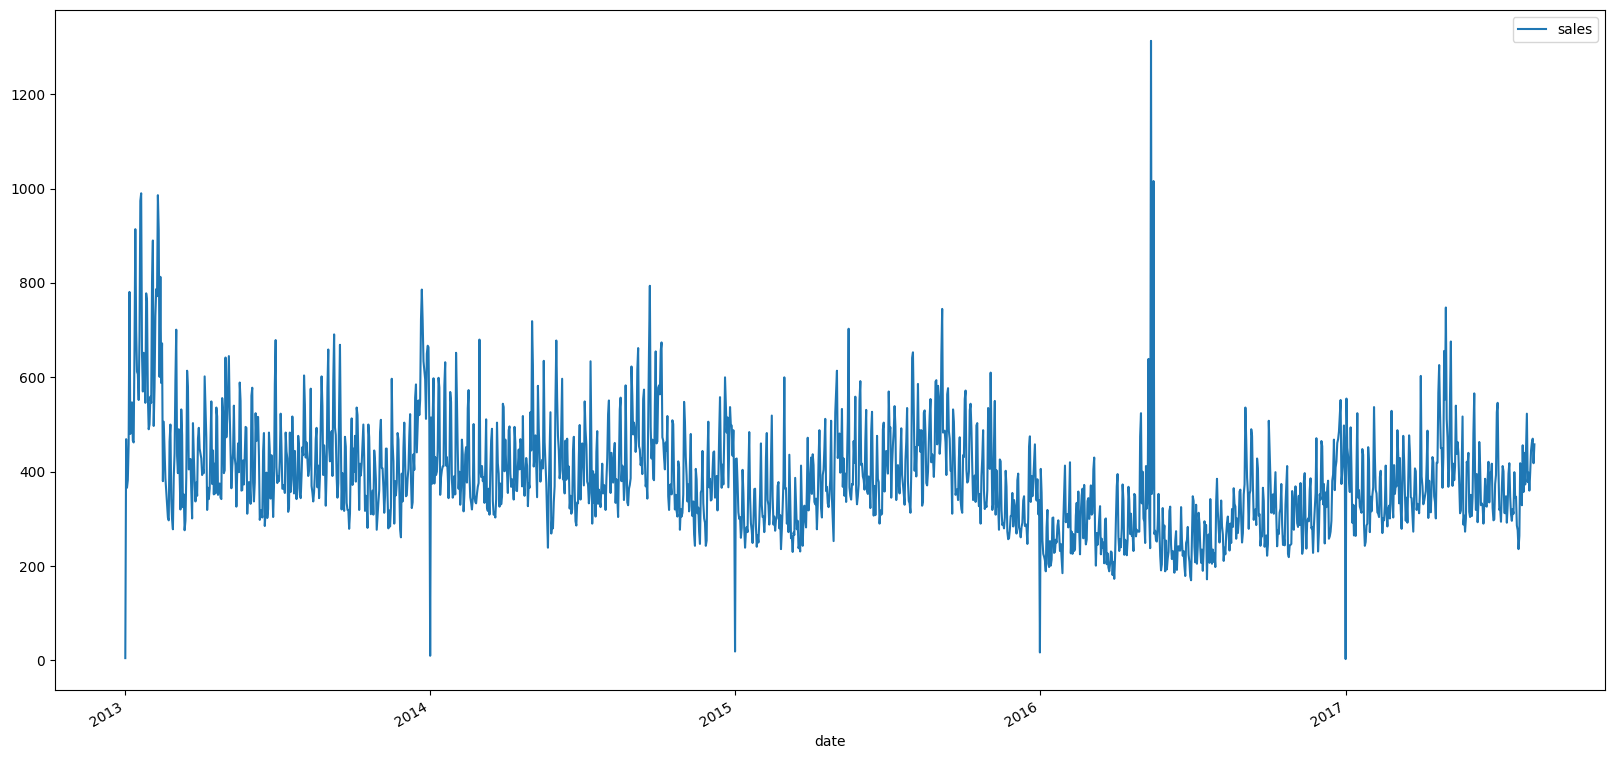

analysis for family LIQUOR,WINE,BEER
              sales
count   1684.000000
mean    4600.142518
std     3691.574564
min        0.000000
25%     2435.250000
50%     3391.500000
75%     6562.000000
max    32791.000000
mean sales    4600.142518
dtype: float64


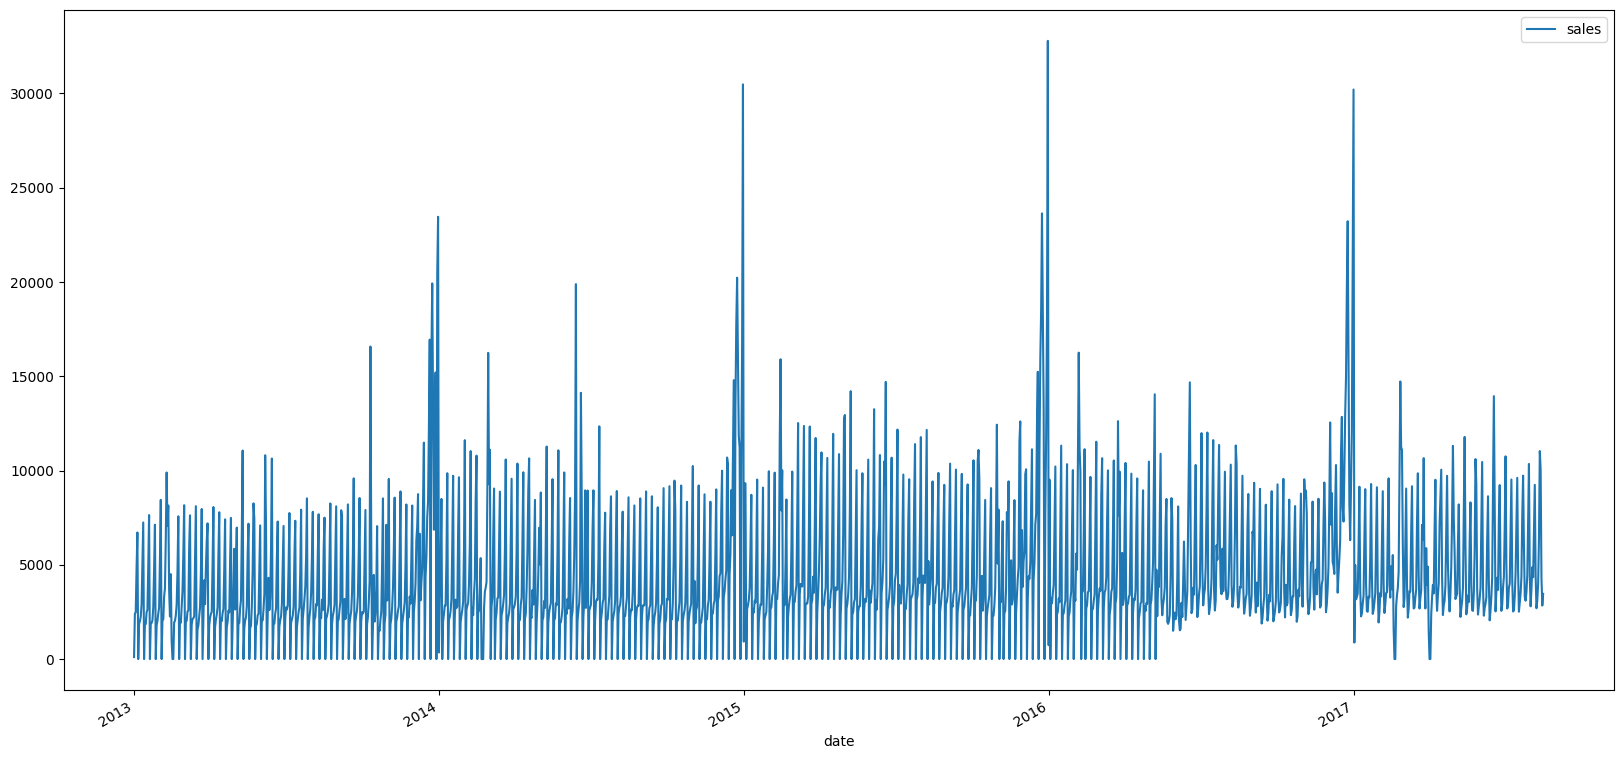

analysis for family MAGAZINES
             sales
count  1684.000000
mean    158.170428
std     179.184971
min       0.000000
25%       0.000000
50%      79.000000
75%     292.000000
max     953.000000
mean sales    158.170428
dtype: float64


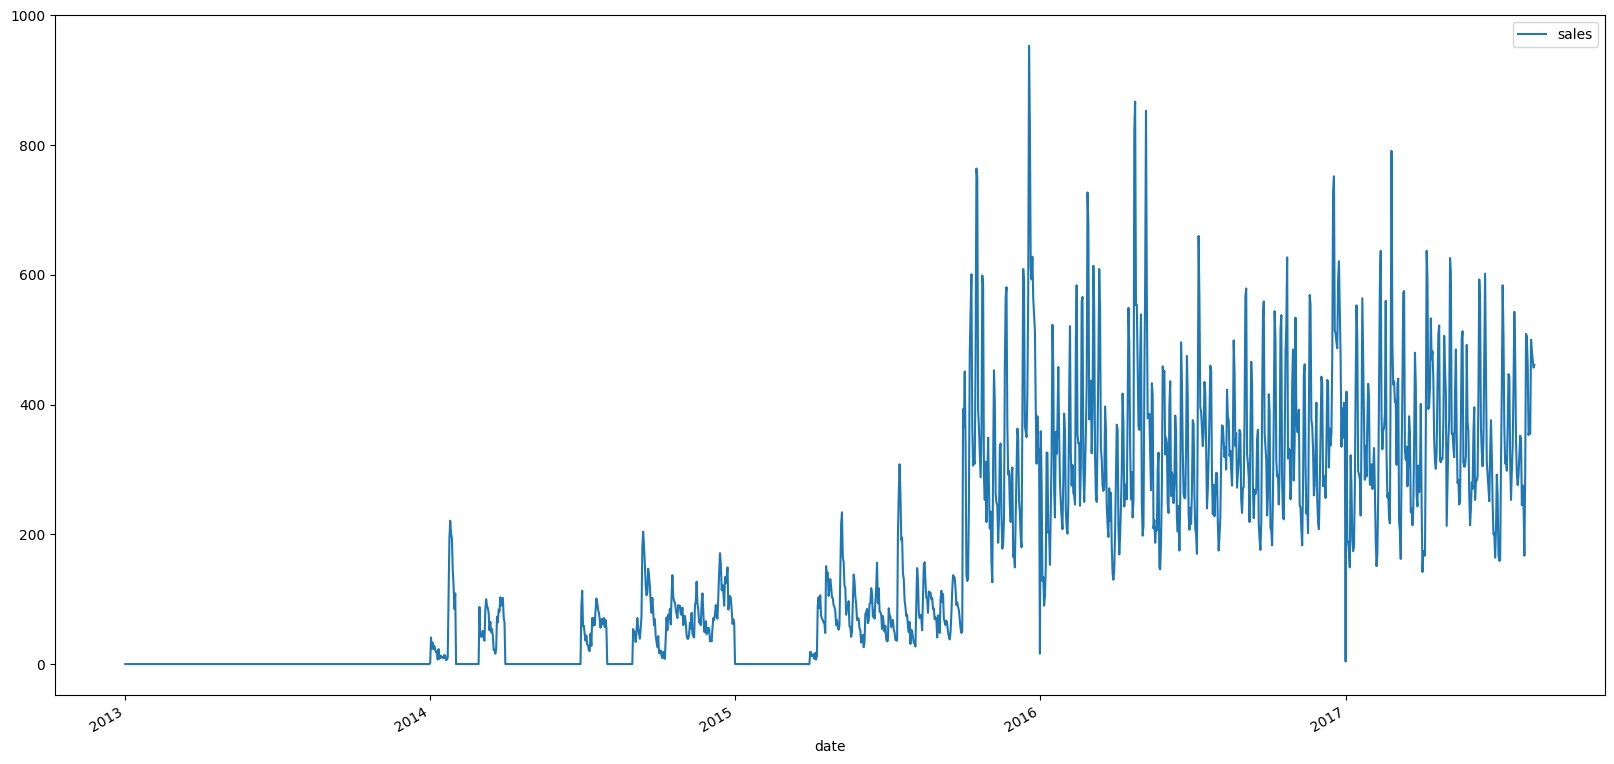

analysis for family MEATS
               sales
count    1684.000000
mean    18459.898102
std      4334.042954
min       110.801000
25%     15743.462730
50%     17752.996433
75%     20577.087314
max    114430.285038
mean sales    18459.898102
dtype: float64


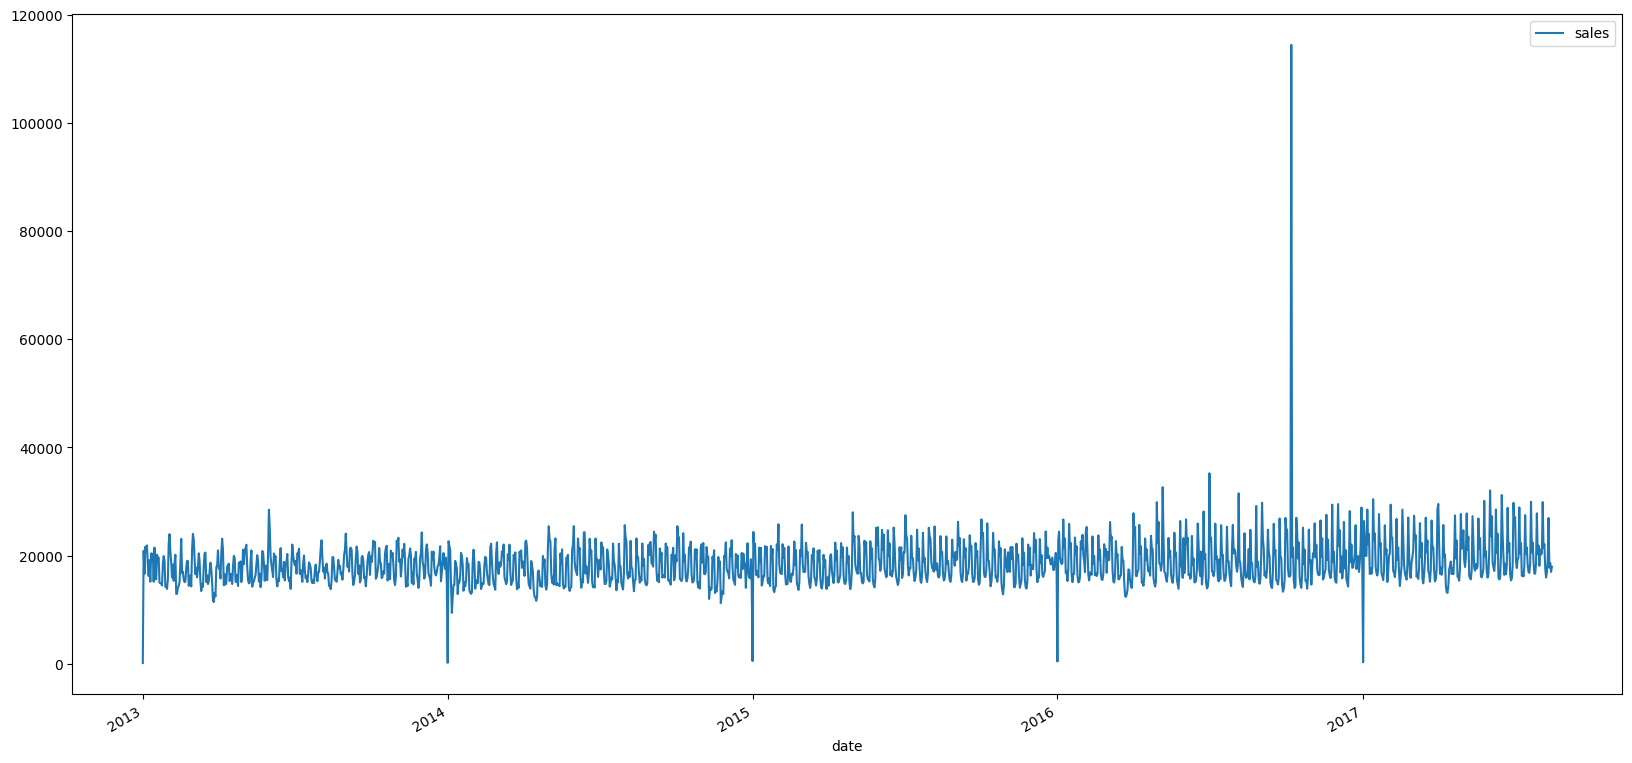

analysis for family PERSONAL CARE
              sales
count   1684.000000
mean   14603.355701
std     5361.252413
min       25.000000
25%    10850.000000
50%    13518.000000
75%    17770.250000
max    39291.000000
mean sales    14603.355701
dtype: float64


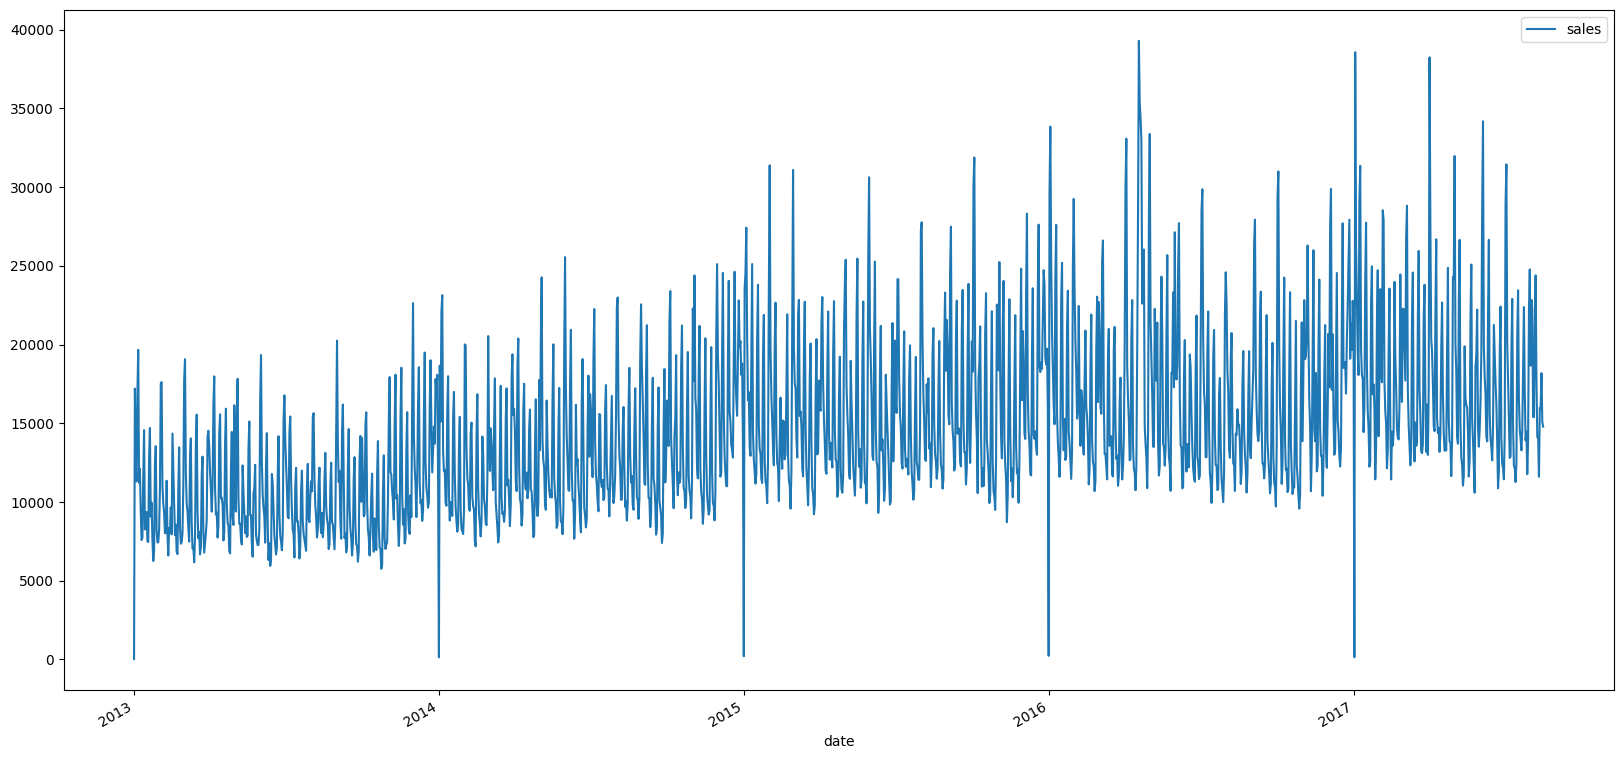

analysis for family PET SUPPLIES
             sales
count  1684.000000
mean    211.748219
std     197.066718
min       0.000000
25%       0.000000
50%     235.000000
75%     357.000000
max     896.000000
mean sales    211.748219
dtype: float64


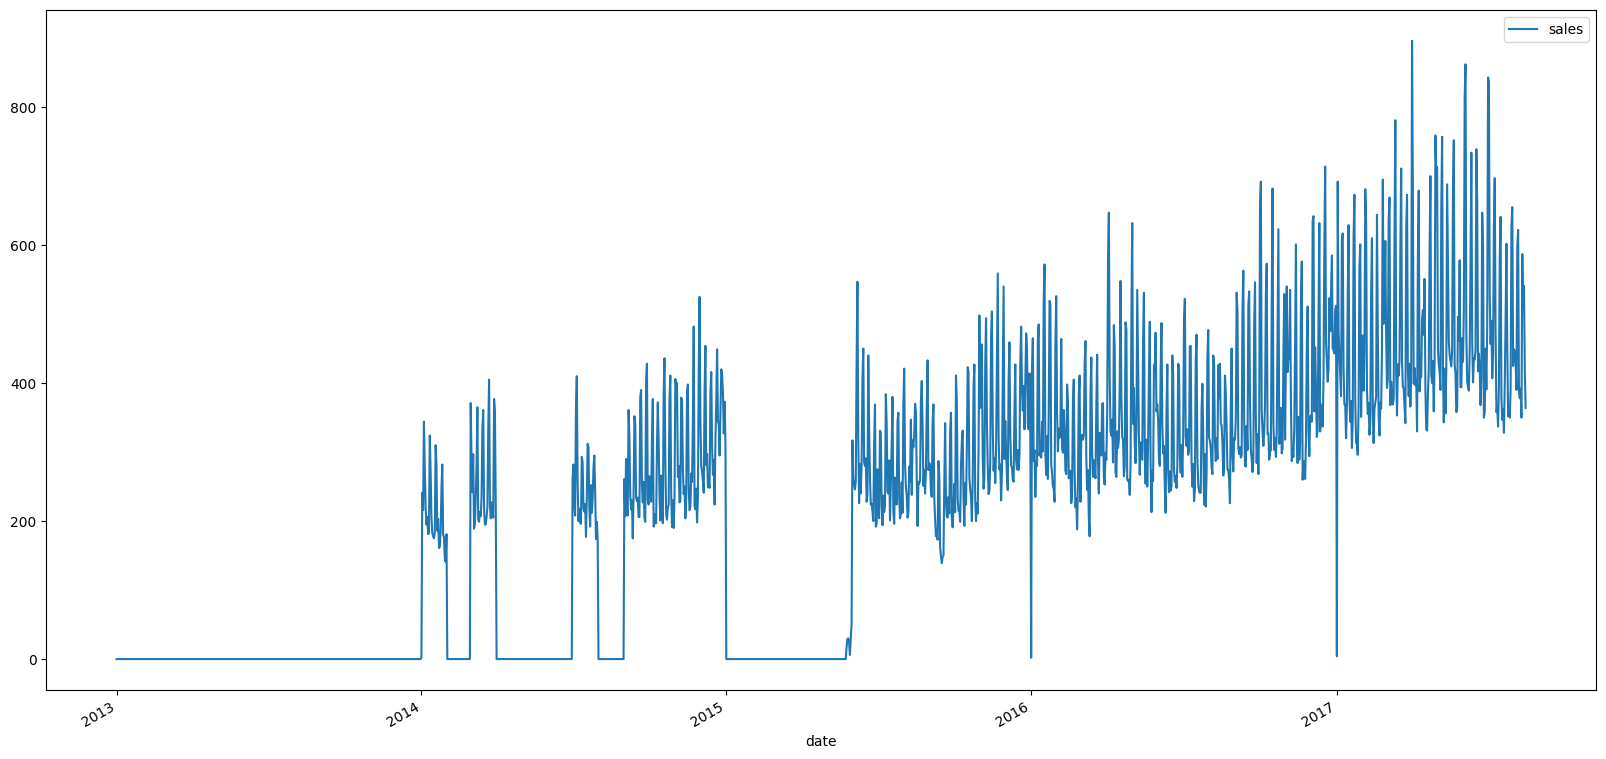

analysis for family PLAYERS AND ELECTRONICS
             sales
count  1684.000000
mean    334.090261
std     308.303838
min       0.000000
25%       0.000000
50%     391.000000
75%     544.000000
max    1977.000000
mean sales    334.090261
dtype: float64


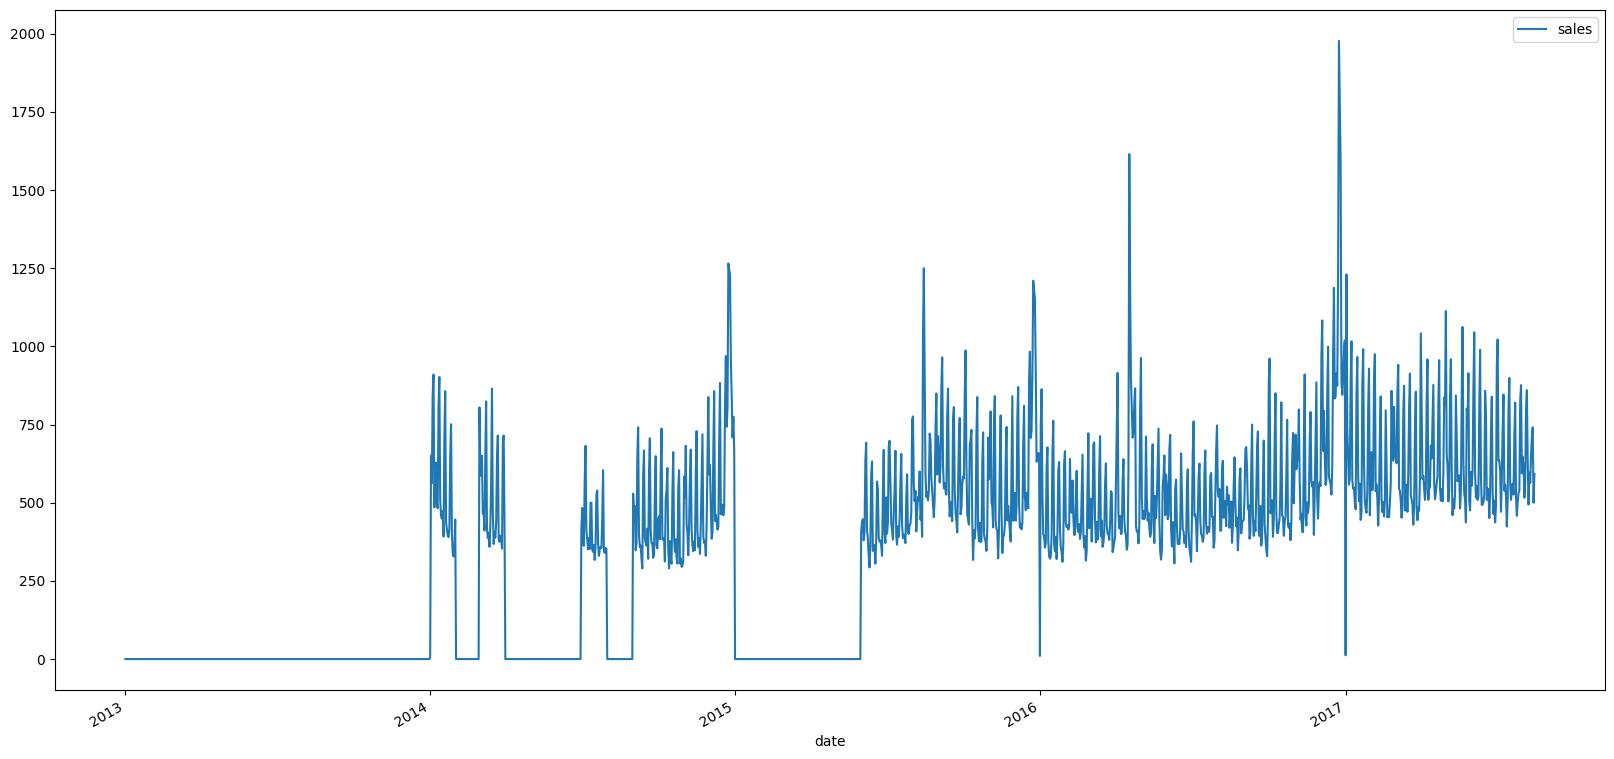

analysis for family POULTRY
              sales
count   1684.000000
mean   18928.743748
std     6078.421638
min       42.637000
25%    15394.091000
50%    18248.124513
75%    23488.720286
max    43734.450140
mean sales    18928.743748
dtype: float64


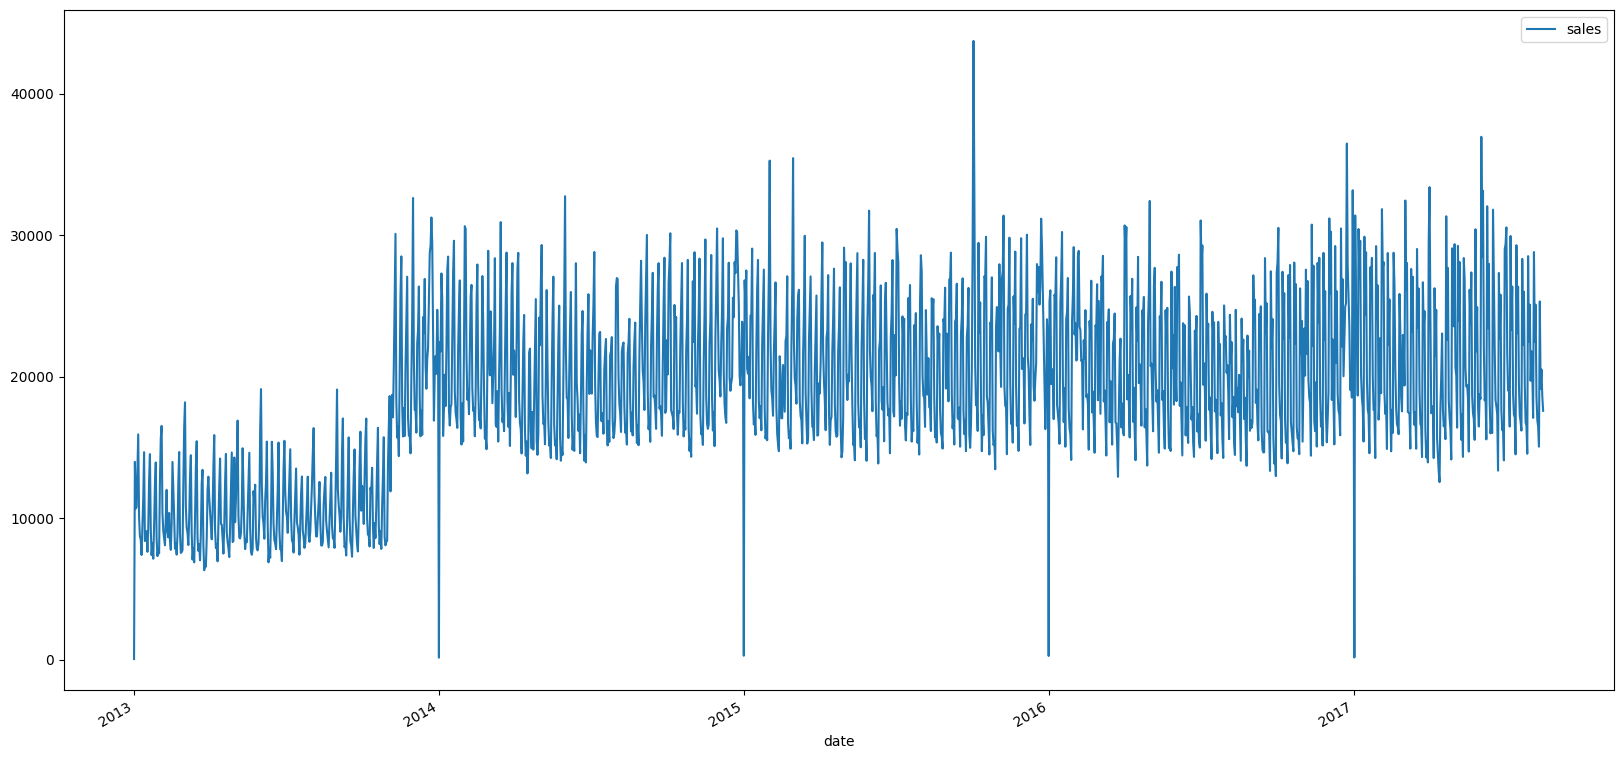

analysis for family PREPARED FOODS
              sales
count   1684.000000
mean    5225.590925
std     1102.344484
min       36.118000
25%     4398.355232
50%     5032.278014
75%     5987.304733
max    10096.194040
mean sales    5225.590925
dtype: float64


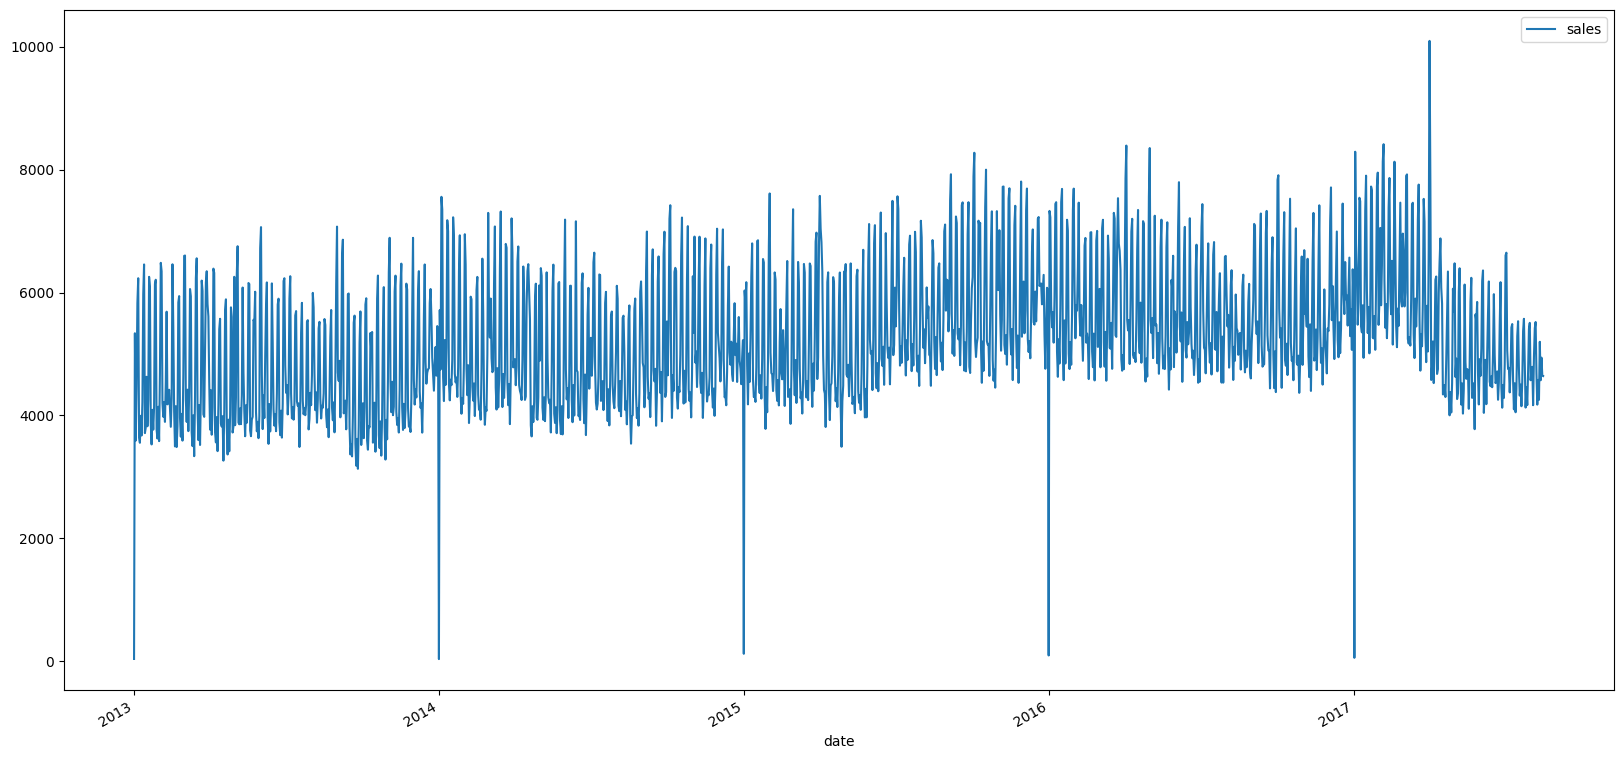

analysis for family PRODUCE
               sales
count    1684.000000
mean    72865.014653
std     61847.252856
min         0.000000
25%       291.750000
50%     96506.697605
75%    124166.774148
max    200580.759500
mean sales    72865.014653
dtype: float64


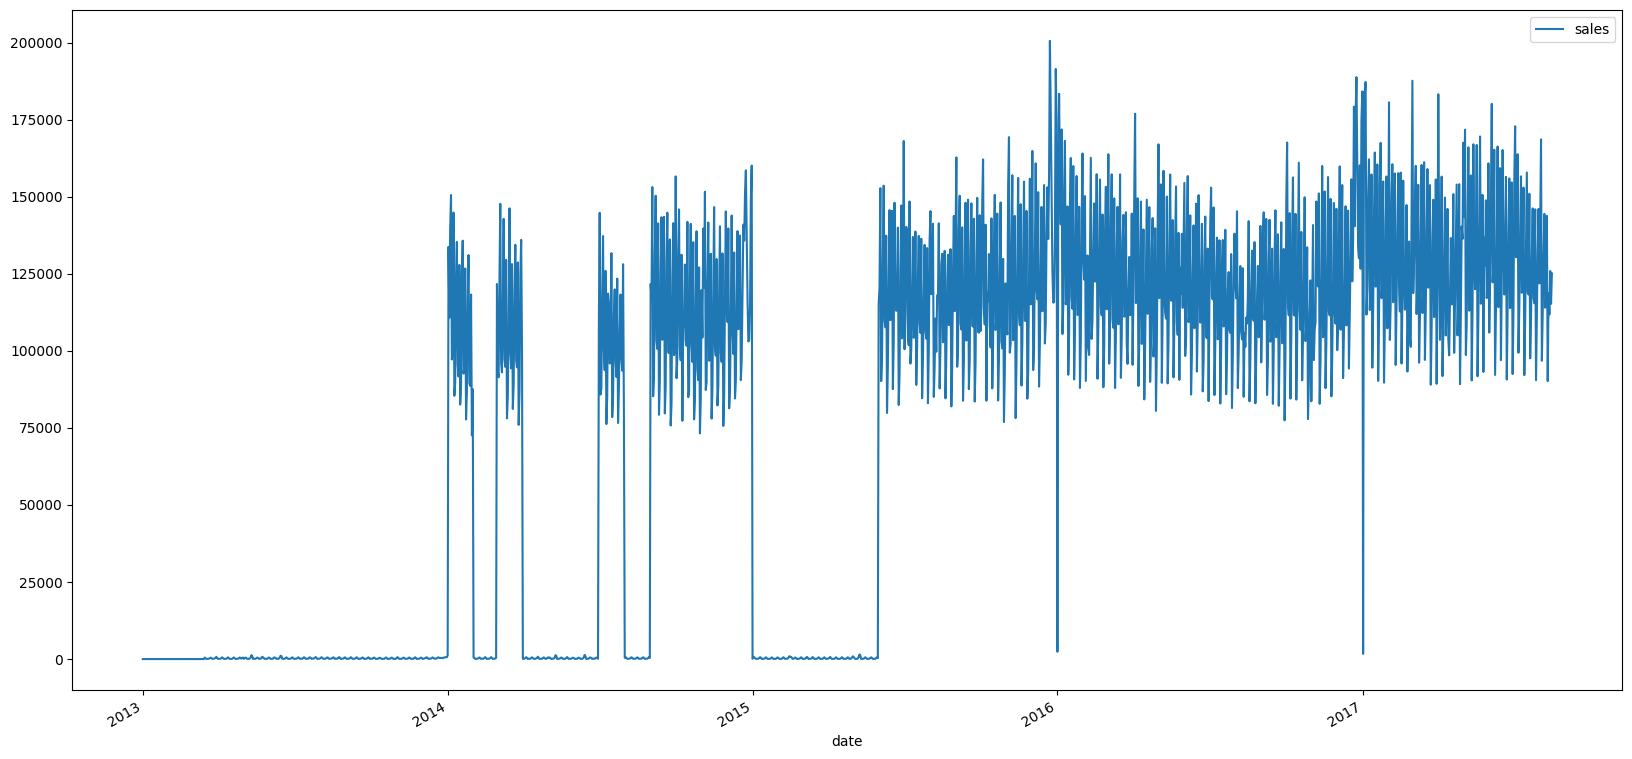

analysis for family SCHOOL AND OFFICE SUPPLIES
             sales
count  1684.000000
mean    159.926366
std     429.102006
min       0.000000
25%       0.000000
50%      54.000000
75%     101.000000
max    5415.000000
mean sales    159.926366
dtype: float64


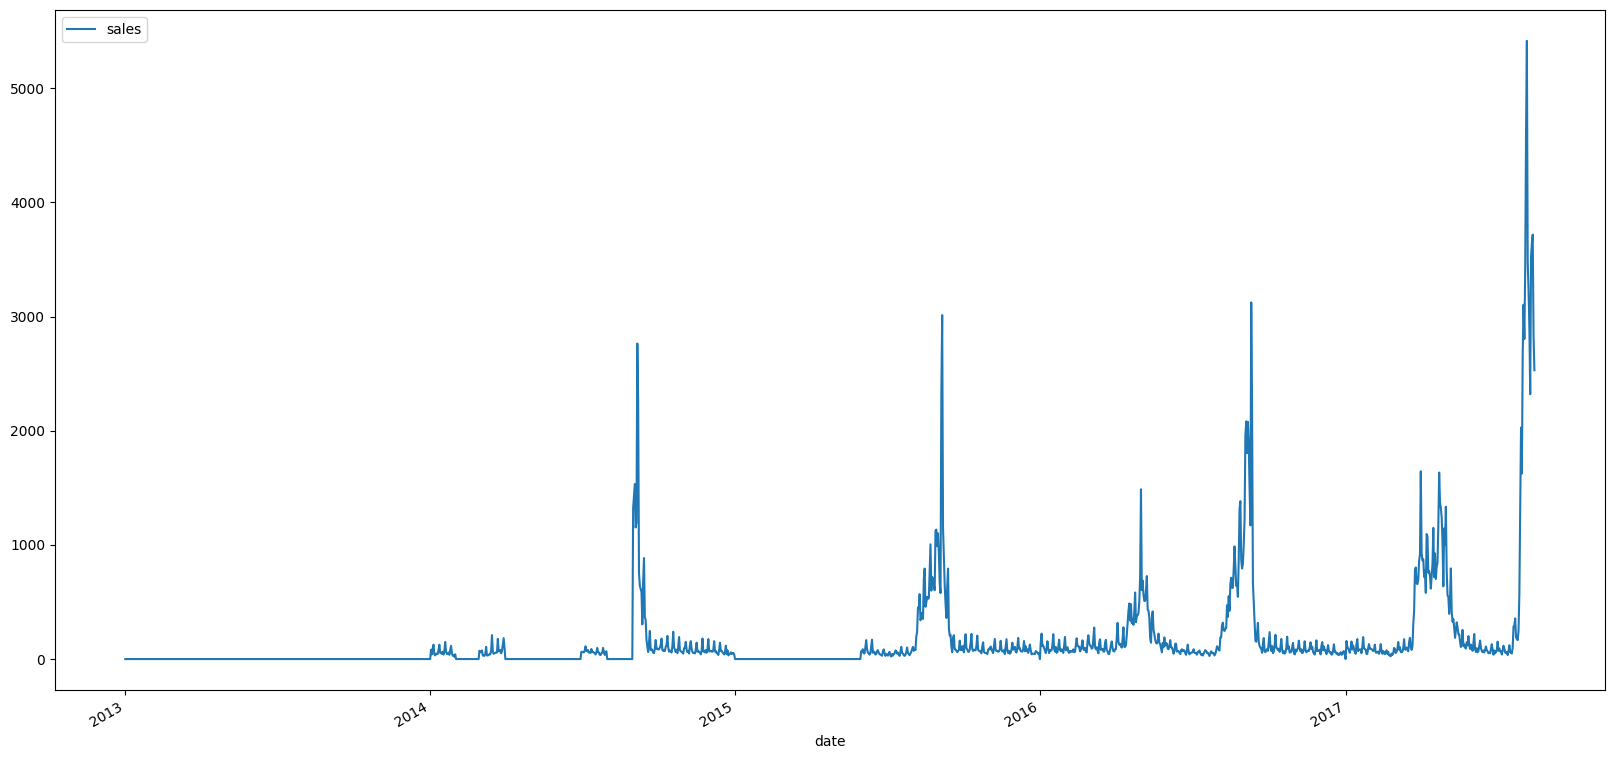

analysis for family SEAFOOD
             sales
count  1684.000000
mean   1196.812282
std     305.751569
min       0.000000
25%     975.895251
50%    1152.089498
75%    1416.891754
max    2205.899000
mean sales    1196.812282
dtype: float64


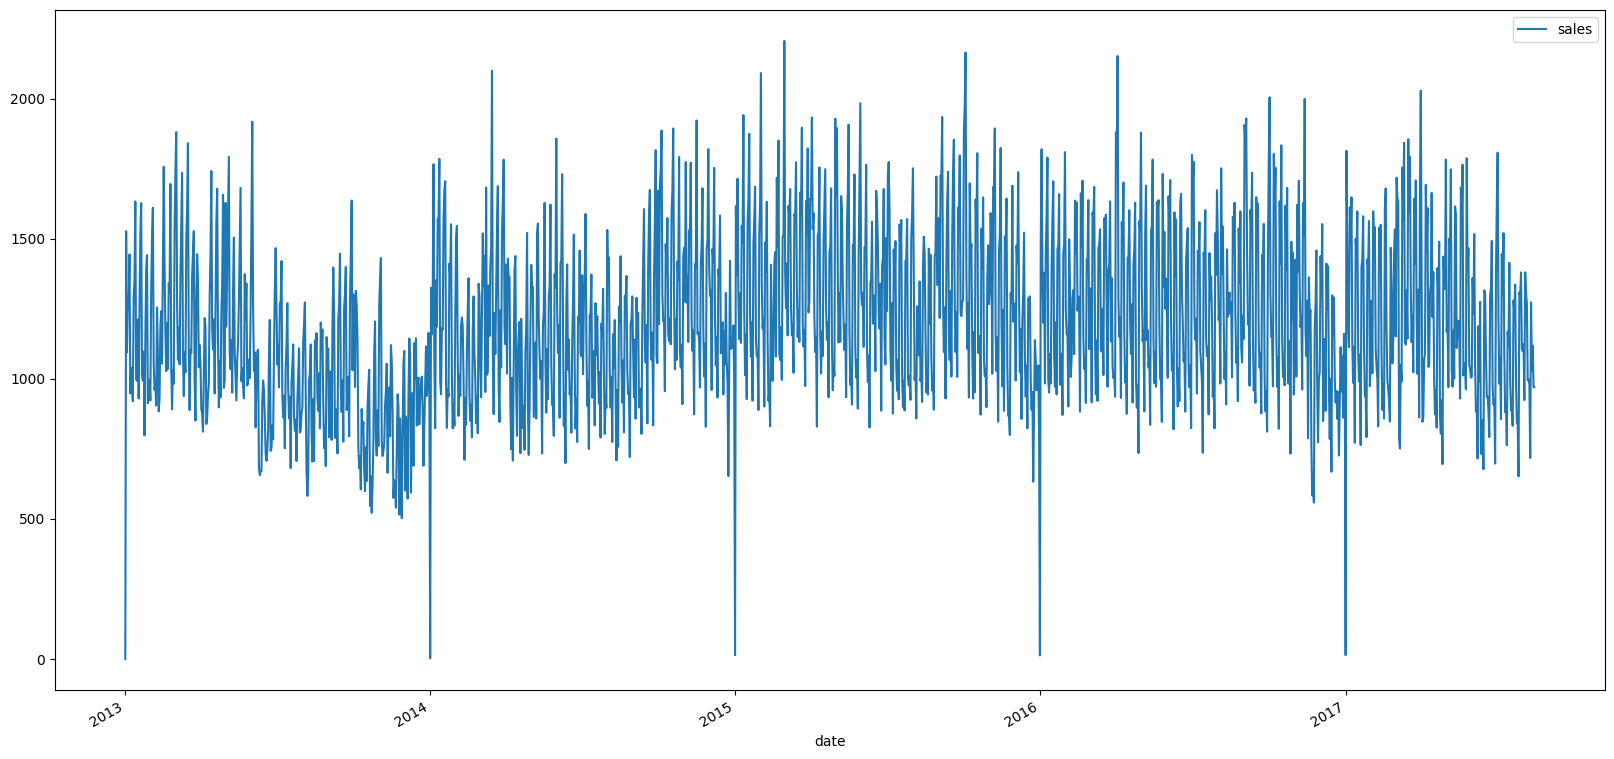

In [106]:
for family in prod_families:
    print(f"analysis for family {family}")
    temp = train_df[train_df['family'] == family].groupby('date').agg({
        'sales':'sum'
    })
    print(temp.describe())
    print(f"mean {temp.mean()}")
    temp.plot()
    # fig = px.line(temp, x=temp.index, y='sales', labels={'x':'Date', 'y':'Sales'})
    # fig.update_xaxes(
    #     tickformat='%Y-%b-%d (%A)',  # Format: "2024-Feb-10 (Saturday)"
    #     title_text="Date (Year-Month-Day)"
    # )
    
    # fig.show()
    plt.show()
    print('===============================================================================================================================')

In [107]:
train_df.head()

id       date  store_nbr      family  sales  onpromotion   city      state  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Quito  Pichincha   
1   1 2013-01-01          1   BABY CARE    0.0            0  Quito  Pichincha   
2   2 2013-01-01          1      BEAUTY    0.0            0  Quito  Pichincha   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Quito  Pichincha   
4   4 2013-01-01          1       BOOKS    0.0            0  Quito  Pichincha   

  type  cluster  Weekday  year  month  day  isWeekend  
0    D       13        1  2013      1    1          0  
1    D       13        1  2013      1    1          0  
2    D       13        1  2013      1    1          0  
3    D       13        1  2013      1    1          0  
4    D       13        1  2013      1    1          0

In [108]:
train_df['cluster'].value_counts()

cluster
3     389004
10    333432
6     333432
15    277860
13    222288
14    222288
11    166716
4     166716
8     166716
1     166716
9     111144
2     111144
7     111144
16     55572
5      55572
12     55572
17     55572
Name: count, dtype: int64

In [109]:
train_df[train_df['cluster'] == 17]

id       date  store_nbr                      family     sales  \
1518        1518 2013-01-01         51                  AUTOMOTIVE     0.000   
1519        1519 2013-01-01         51                   BABY CARE     0.000   
1520        1520 2013-01-01         51                      BEAUTY     0.000   
1521        1521 2013-01-01         51                   BEVERAGES     0.000   
1522        1522 2013-01-01         51                       BOOKS     0.000   
...          ...        ...        ...                         ...       ...   
3000652  3000652 2017-08-15         51                     POULTRY   686.941   
3000653  3000653 2017-08-15         51              PREPARED FOODS    91.976   
3000654  3000654 2017-08-15         51                     PRODUCE  5031.190   
3000655  3000655 2017-08-15         51  SCHOOL AND OFFICE SUPPLIES     0.000   
3000656  3000656 2017-08-15         51                     SEAFOOD    52.876   

         onpromotion       city   state type  cluster  Weekday  year  month  \
1518               0  Guayaquil  Guayas    A       17        1  2013      1   
1519               0  Guayaquil  Guayas    A       17        1  2013      1   
1520               0  Guayaquil  Guayas    A       17        1  2013      1   
1521               0  Guayaquil  Guayas    A       17        1  2013      1   
1522               0  Guayaquil  Guayas    A       17        1  2013      1   
...              ...        ...     ...  ...      ...      ...   ...    ...   
3000652            0  Guayaquil  Guayas    A       17        1  2017      8   
3000653            0  Guayaquil  Guayas    A       17        1  2017      8   
3000654            8  Guayaquil  Guayas    A       17        1  2017      8   
3000655            0  Guayaquil  Guayas    A       17        1  2017      8   
3000656            0  Guayaquil  Guayas    A       17        1  2017      8   

         day  isWeekend  
1518       1          0  
1519       1          0  
1520       1          0  
1521       1          0  
1522       1          0  
...      ...        ...  
3000652   15          0  
3000653   15          0  
3000654   15          0  
3000655   15          0  
3000656   15          0  

[55572 rows x 15 columns]

In [110]:
(train_df[train_df['cluster'] == 17]['city'] == 'Guayaquil').sum()

55572